In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('data/conflicts_data/Africa_1997-2024_Oct04.csv')
df.describe()

year  time_precision            iso       latitude  \
count  388401.000000   388401.000000  388401.000000  388401.000000   
mean     2017.104964        1.131290     508.026612       6.898408   
std         6.601701        0.396535     251.684967      15.683666   
min      1997.000000        1.000000      12.000000     -34.706800   
25%      2014.000000        1.000000     231.000000       0.190400   
50%      2019.000000        1.000000     566.000000       6.540300   
75%      2022.000000        1.000000     710.000000      13.536800   
max      2024.000000        3.000000     894.000000      37.281500   

           longitude  geo_precision     fatalities     timestamp  
count  388401.000000  388401.000000  388401.000000  3.884010e+05  
mean       21.782547       1.276802       2.502416  1.665409e+09  
std        16.799286       0.494671      25.050307  4.829185e+07  
min       -25.163100       1.000000       0.000000  1.552576e+09  
25%         8.124200       1.000000       0.000000  1.621889e+09  
50%        27.899100       1.000000       0.000000  1.673291e+09  
75%        33.425500       2.000000       1.000000  1.710804e+09  
max        64.683200       3.000000    1350.000000  1.728335e+09

In [4]:
df['event_date'] = pd.to_datetime(df['event_date'])
df['month'] = df['event_date'].dt.to_period('M')

In [175]:
df_sudan = df[df['country']=='Sudan']
print(df_sudan.shape)
df_sudan.head(2)

(29812, 32)


event_id_cnty event_date  year  time_precision           disorder_type  \
94      SUD30468 2024-10-04  2024               1      Political violence   
95      SUD30469 2024-10-04  2024               1  Strategic developments   

                    event_type    sub_event_type  \
94  Explosions/Remote violence  Air/drone strike   
95      Strategic developments             Other   

                              actor1 assoc_actor_1        inter1  ...  \
94  Military Forces of Sudan (2019-)           NaN  State forces  ...   
95              Rapid Support Forces           NaN   Rebel group  ...   

   latitude longitude geo_precision                                  source  \
94  14.3983   33.5477             2  Al Mashhad Al Sudani; Alnilin; Twitter   
95  15.6360   32.5264             1                                 Twitter   

          source_scale                                              notes  \
94  New media-National  On 4 October 2024, SAF conducted airstrikes on...   
95           New media  Non-violent activity: On 4 October 2024, RSF o...   

   fatalities tags   timestamp    month  
94          1  NaN  1728335024  2024-10  
95          0  NaN  1728335024  2024-10  

[2 rows x 32 columns]

### Fig 1. - Fig 5. (`event_type`, `sub_event_type`, `interaction`, `civilian_targeting`, `location`)

In [6]:
labels = ['event_type', 'sub_event_type', 'interaction', 'civilian_targeting', 'location']
titles = ['Event Types', 'Sub-event Types', 'Interaction', 'Civilian Targeting', 'Location']

for label, title in zip(labels, titles):
    top_labels = df_sudan[label].value_counts().head().index.tolist()
    df_top_labels = df_sudan[df_sudan[label].isin(top_labels)].copy()

    grouped = df_top_labels.groupby(['month', label]).size().reset_index(name='counts')
    pivot_table = grouped.pivot(index='month', columns=label, values='counts').fillna(0)

    custom_colors = ['red', 'blue', 'black', 'orange', 'green']
    pivot_table.plot(kind='line', figsize=(14, 7), linewidth=0.8, color=custom_colors[:pivot_table.shape[1]])

    plt.xlabel('Month')
    plt.ylabel('Number of Events')
    plt.title(f'Number of Events per Month for Top 5 {title}')
    plt.legend(title=label)
    plt.tight_layout()
    # plt.show()
    filename = f'Monthly Conflicts by {title}.png'
    plt.savefig(f'plots/{filename}')
    plt.clf()

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

### Fig 6. (`fatalities`)

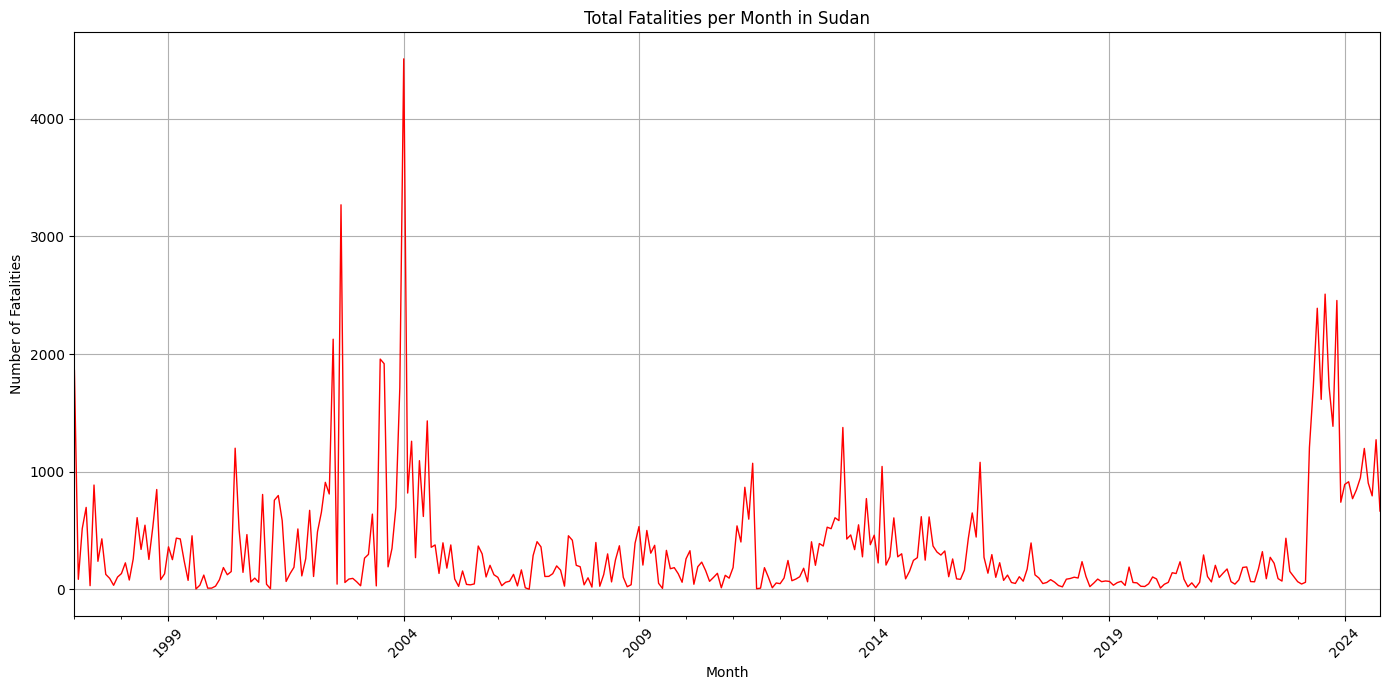

In [7]:
fatalities_trend_month = df_sudan.groupby('month')['fatalities'].sum()

plt.figure(figsize=(14, 7))
fatalities_trend_month.plot(kind='line', color='red', linewidth=1)
plt.title('Total Fatalities per Month in Sudan')
plt.xlabel('Month')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# plt.show()
plt.savefig('plots/Monthly Fatalities.png')

### Fig 7. (`actor1`, `actor2`)

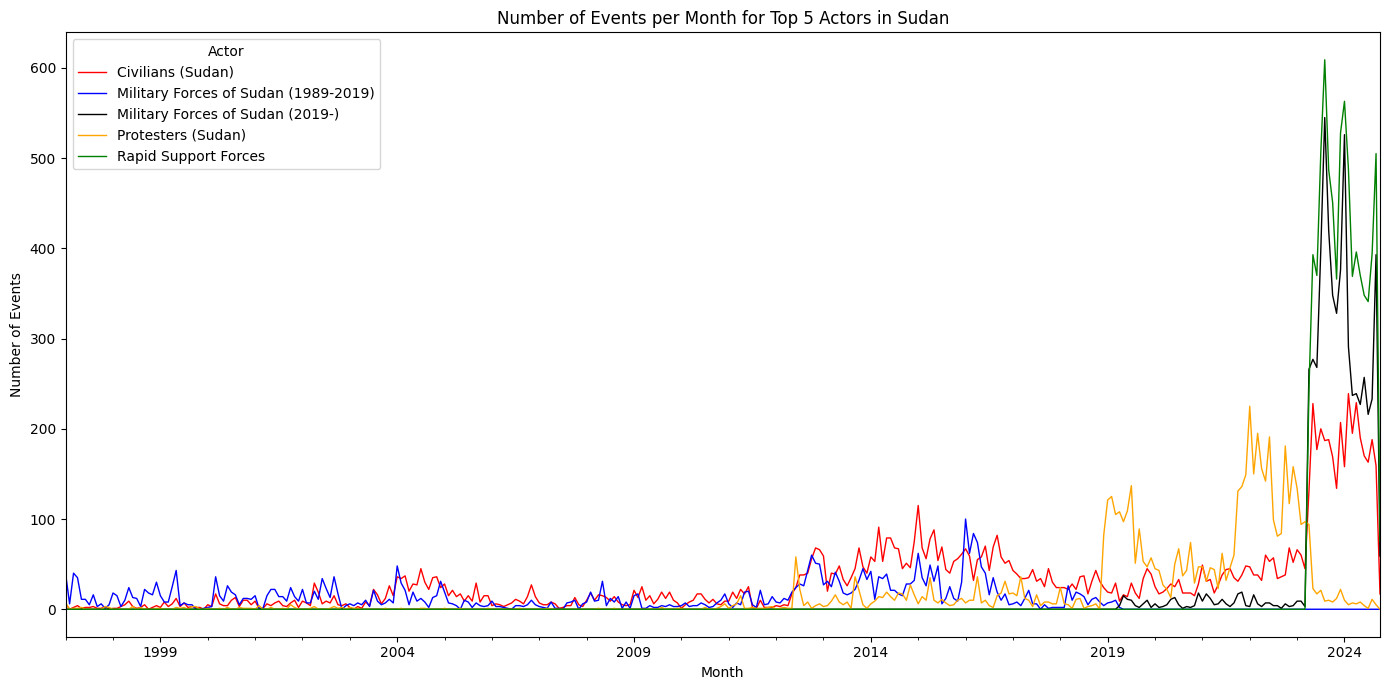

In [8]:
combined_actors = pd.concat([df_sudan['actor1'], df_sudan['actor2']]).value_counts().head(5).index
filtered_data_actors = df_sudan[df_sudan['actor1'].isin(combined_actors) | df_sudan['actor2'].isin(combined_actors)]

filtered_data_actors = pd.melt(filtered_data_actors, id_vars=['month'], value_vars=['actor1', 'actor2'], value_name='actor')
filtered_data_actors = filtered_data_actors[filtered_data_actors['actor'].isin(combined_actors)]
actor_event_trend = filtered_data_actors.groupby(['month', 'actor']).size().unstack().fillna(0)

custom_colors = ['red', 'blue', 'black', 'orange', 'green']
actor_event_trend.plot(kind='line', figsize=(14, 7), linewidth=1, color=custom_colors[:pivot_table.shape[1]])
plt.title('Number of Events per Month for Top 5 Actors in Sudan')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.legend(title='Actor')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Monthly Conflicts by Actors.png')

### Fig 8. (`inter1`, `inter2`)

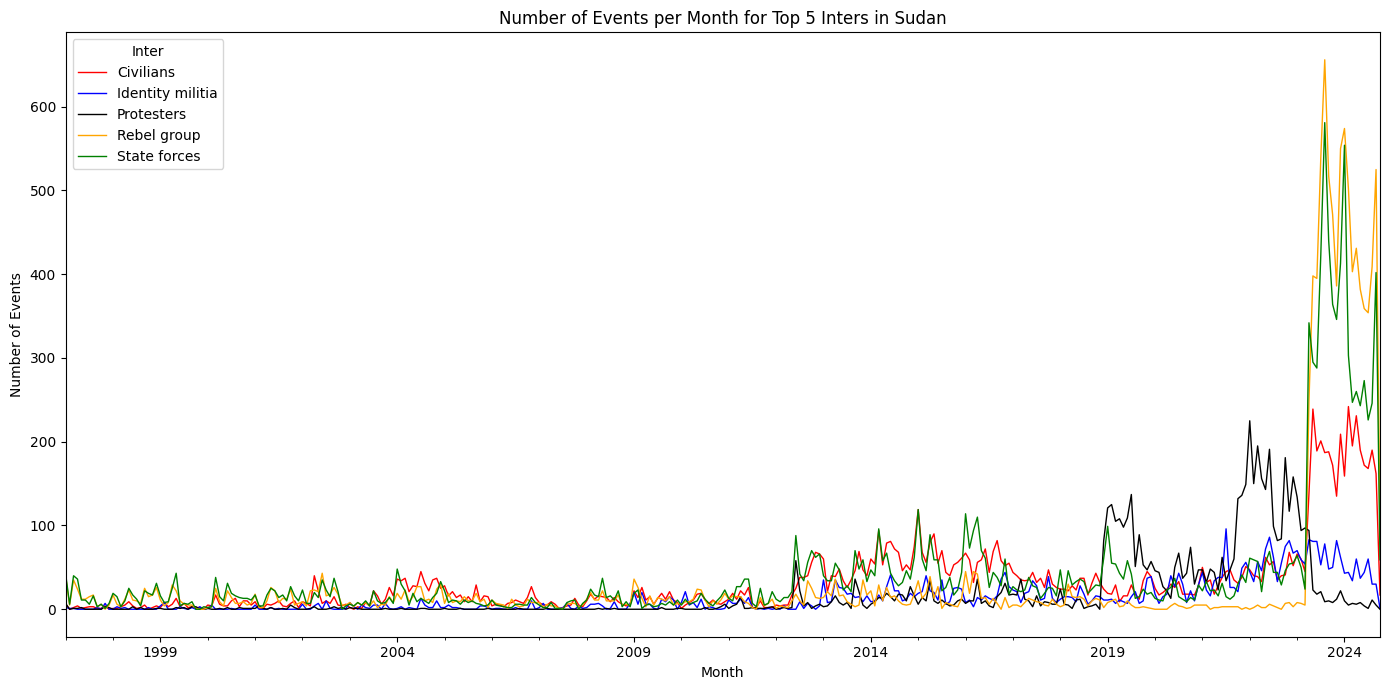

In [9]:
combined_inters = pd.concat([df_sudan['inter1'], df_sudan['inter2']]).value_counts().head(5).index
filtered_data_inters = df_sudan[df_sudan['inter1'].isin(combined_inters) | df_sudan['inter2'].isin(combined_inters)]

filtered_data_inters = pd.melt(filtered_data_inters, id_vars=['month'], value_vars=['inter1', 'inter2'], value_name='inter')
filtered_data_inters = filtered_data_inters[filtered_data_inters['inter'].isin(combined_inters)]
inter_event_trend = filtered_data_inters.groupby(['month', 'inter']).size().unstack().fillna(0)

custom_colors = ['red', 'blue', 'black', 'orange', 'green']
inter_event_trend.plot(kind='line', figsize=(14, 7), linewidth=1, color=custom_colors[:pivot_table.shape[1]])
plt.title('Number of Events per Month for Top 5 Inters in Sudan')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.legend(title='Inter')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Monthly Conflicts by Inters.png')

### Fig 9. (`assoc_actor1`, `assoc_actor2`)

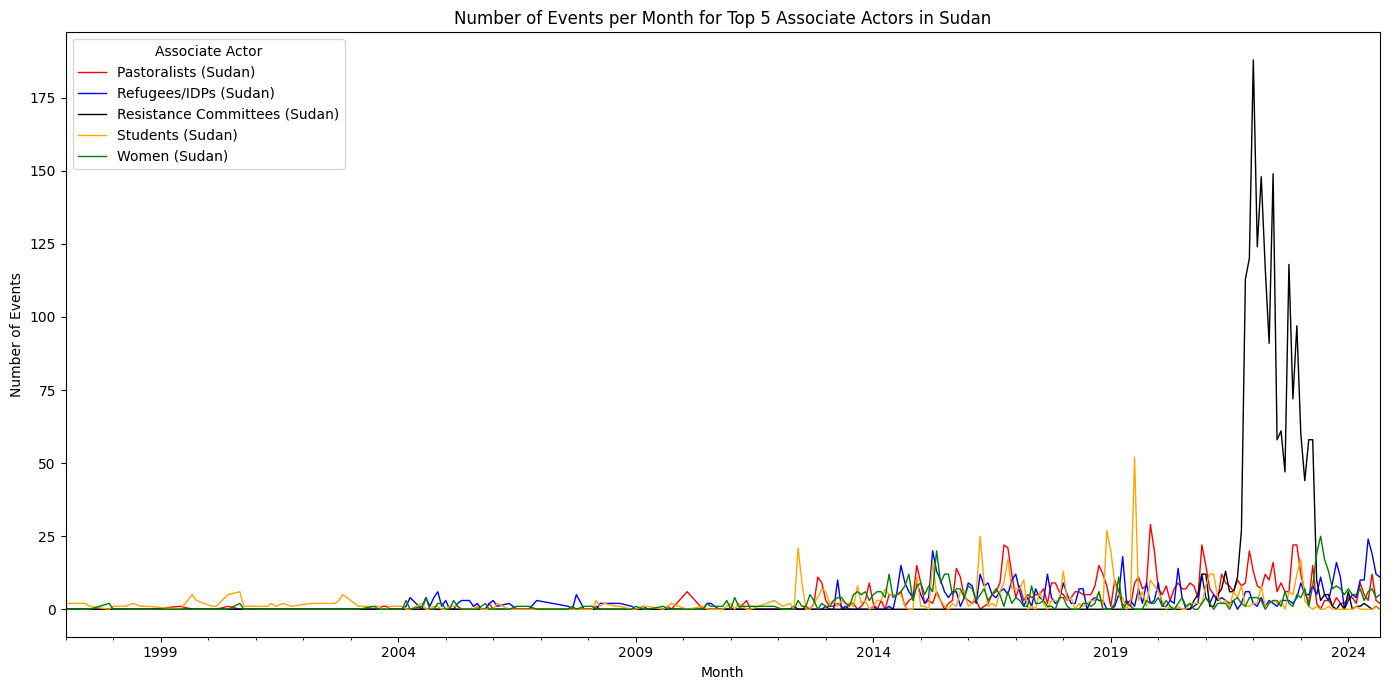

In [10]:
combined_assoc_actors = pd.concat([df_sudan['assoc_actor_1'], df_sudan['assoc_actor_2']]).value_counts().head(5).index
filtered_data_assoc_actors = df_sudan[df_sudan['assoc_actor_1'].isin(combined_assoc_actors) | df_sudan['assoc_actor_2'].isin(combined_assoc_actors)]

filtered_data_assoc_actors = pd.melt(filtered_data_assoc_actors, id_vars=['month'], value_vars=['assoc_actor_1', 'assoc_actor_2'], value_name='assoc_actor')
filtered_data_assoc_actors = filtered_data_assoc_actors[filtered_data_assoc_actors['assoc_actor'].isin(combined_assoc_actors)]
assoc_actor_event_trend = filtered_data_assoc_actors.groupby(['month', 'assoc_actor']).size().unstack().fillna(0)

custom_colors = ['red', 'blue', 'black', 'orange', 'green']
assoc_actor_event_trend.plot(kind='line', figsize=(14, 7), linewidth=1, color=custom_colors[:pivot_table.shape[1]])
plt.title('Number of Events per Month for Top 5 Associate Actors in Sudan')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.legend(title='Associate Actor')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Monthly Conflicts by Associate Actors.png')

### Fig 10. Fig 11. (`admin1`, `admin2`, `admin3`)

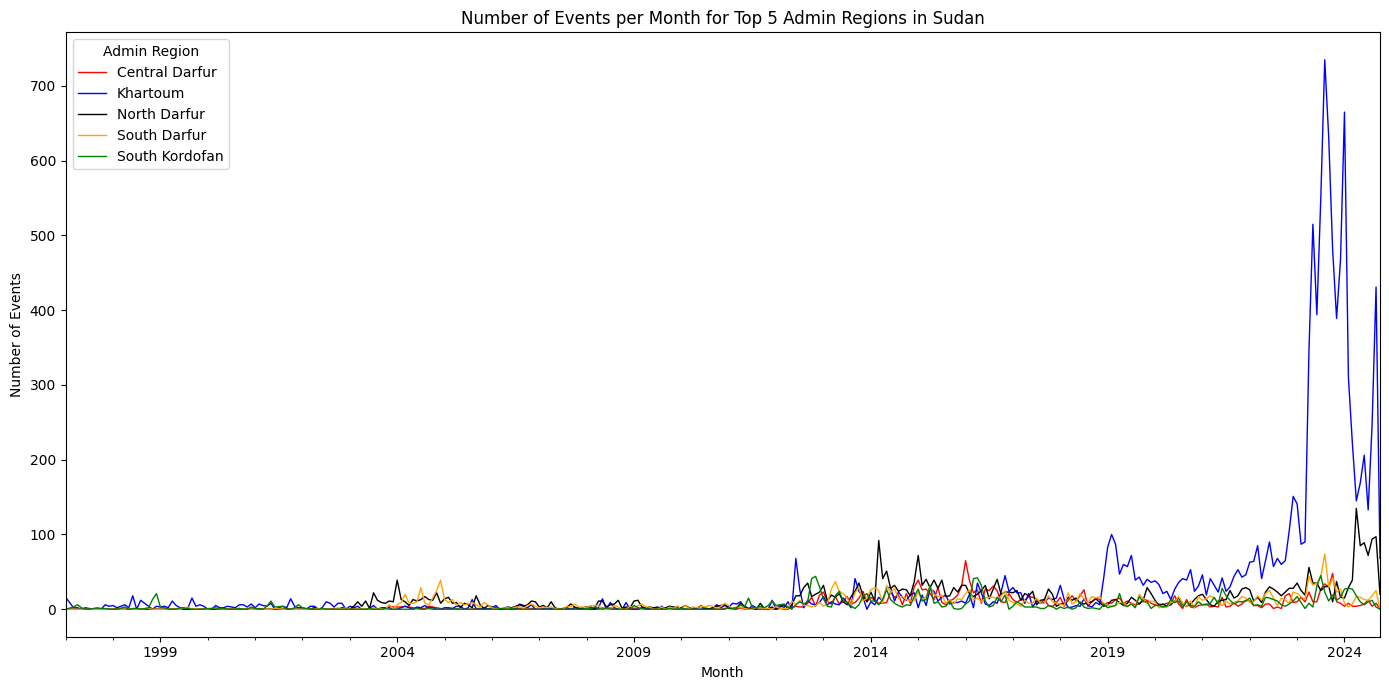

In [11]:
combined_admin = pd.concat([df_sudan['admin1'], df_sudan['admin2'], df_sudan['admin3']]).value_counts().head(5).index
filtered_data_admin = df_sudan[df_sudan['admin1'].isin(combined_admin) | df_sudan['admin2'].isin(combined_admin) | df_sudan['admin3'].isin(combined_admin)]

filtered_data_admin = pd.melt(filtered_data_admin, id_vars=['month'], value_vars=['admin1', 'admin2', 'admin3'], value_name='admin')
filtered_data_admin = filtered_data_admin[filtered_data_admin['admin'].isin(combined_admin)]
admin_event_trend = filtered_data_admin.groupby(['month', 'admin']).size().unstack().fillna(0)

custom_colors = ['red', 'blue', 'black', 'orange', 'green']
admin_event_trend.plot(kind='line', figsize=(14, 7), linewidth=1, color=custom_colors[:pivot_table.shape[1]])
plt.title('Number of Events per Month for Top 5 Admin Regions in Sudan')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.legend(title='Admin Region')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Monthly Conflicts by Admin Regions.png')

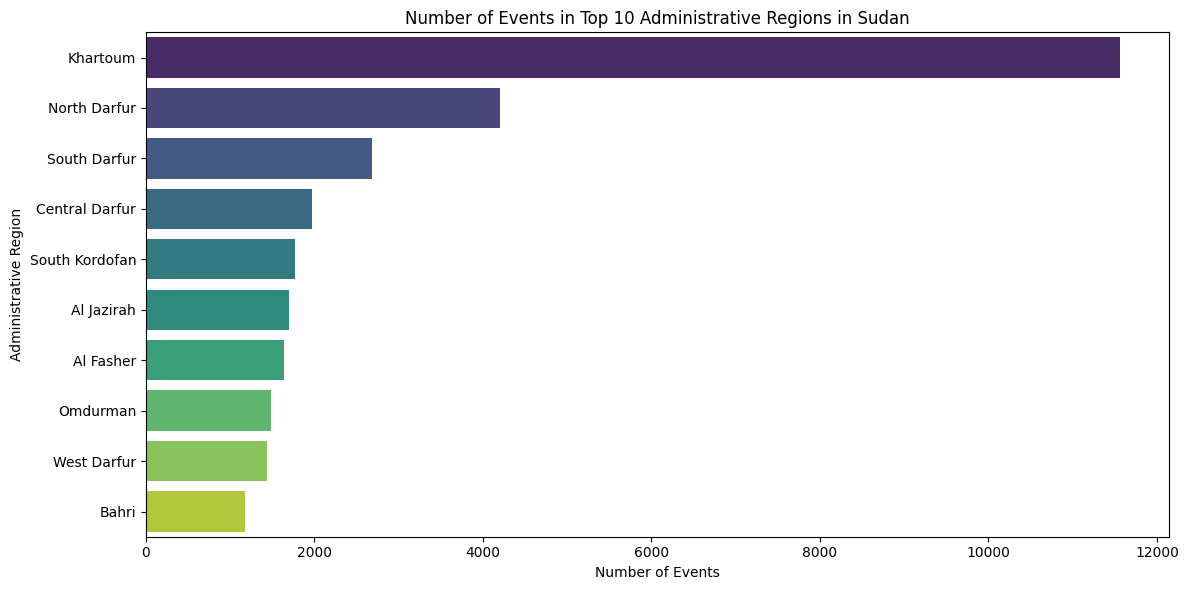

In [12]:
admin_event_counts = pd.concat([df_sudan['admin1'], df_sudan['admin2']]).value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=admin_event_counts.index, x=admin_event_counts.values, palette='viridis', hue=admin_event_counts.index)
plt.title('Number of Events in Top 10 Administrative Regions in Sudan')
plt.xlabel('Number of Events')
plt.ylabel('Administrative Region')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Total Conflicts by Admin Regions.png')

### Fig 12. (`disorder_type`)

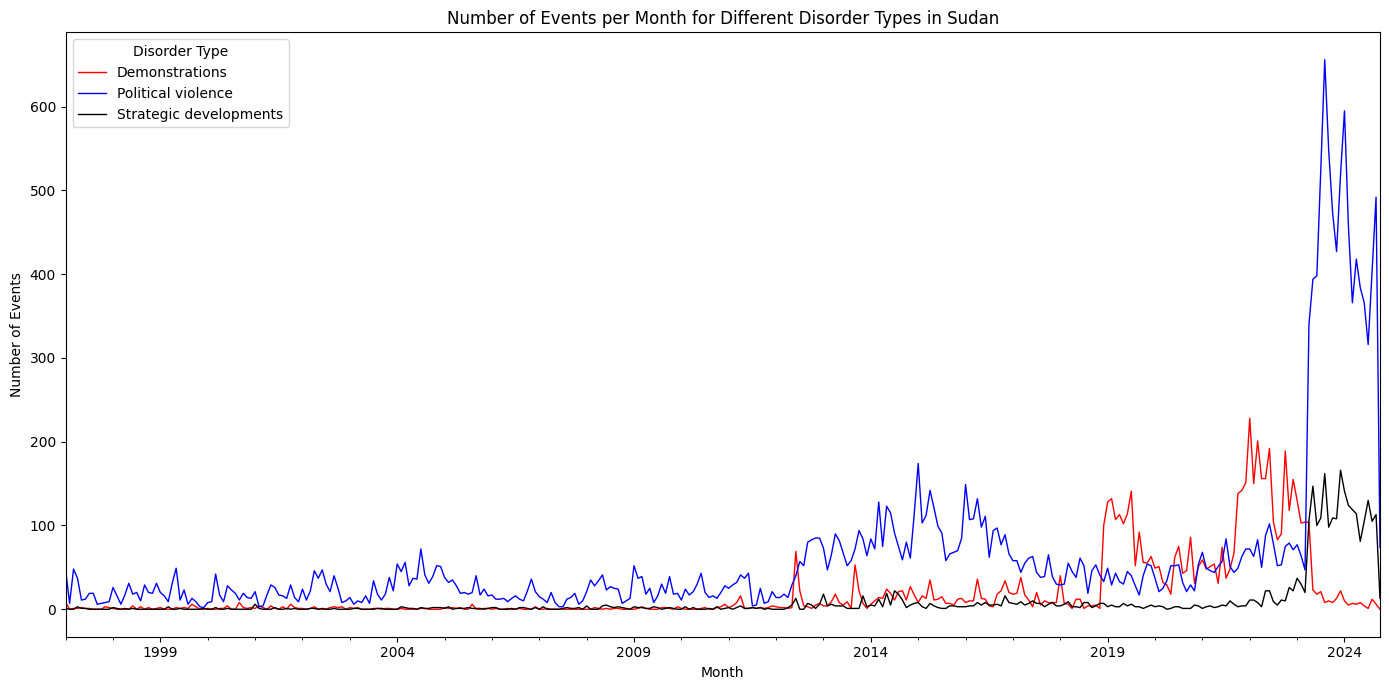

In [13]:
filtered_data_disorder = df_sudan.copy()
filtered_data_disorder = filtered_data_disorder.assign(disorder_type=filtered_data_disorder['disorder_type'].str.split('; ')).explode('disorder_type')
disorder_event_trend = filtered_data_disorder.groupby(['month', 'disorder_type']).size().unstack().fillna(0)

custom_colors = ['red', 'blue', 'black', 'orange', 'green']
disorder_event_trend.plot(kind='line', figsize=(14, 7), linewidth=1, color=custom_colors[:pivot_table.shape[1]])
plt.title('Number of Events per Month for Different Disorder Types in Sudan')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.legend(title='Disorder Type')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Monthly Conflicts by Disorder Types.png')

### Fig 13. Fig 14. (`latitude`, `longitude`)

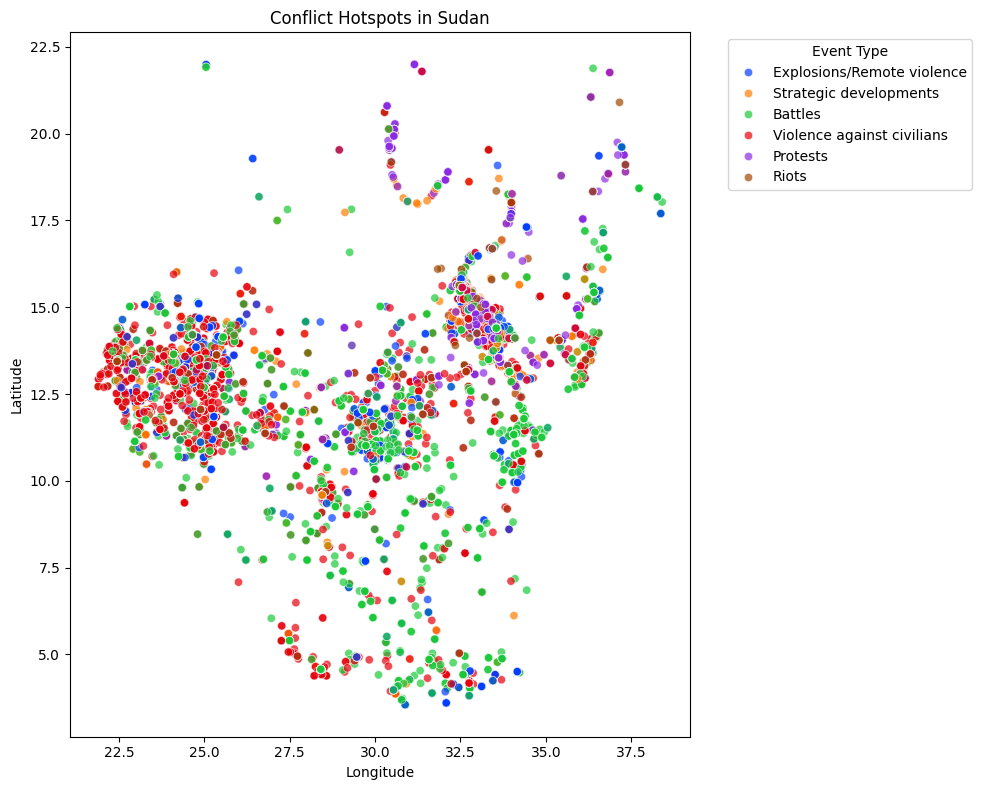

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='event_type', data=df_sudan, palette='bright', alpha=0.7)
plt.title('Conflict Hotspots in Sudan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Geographical Destribution by Event Type.png')

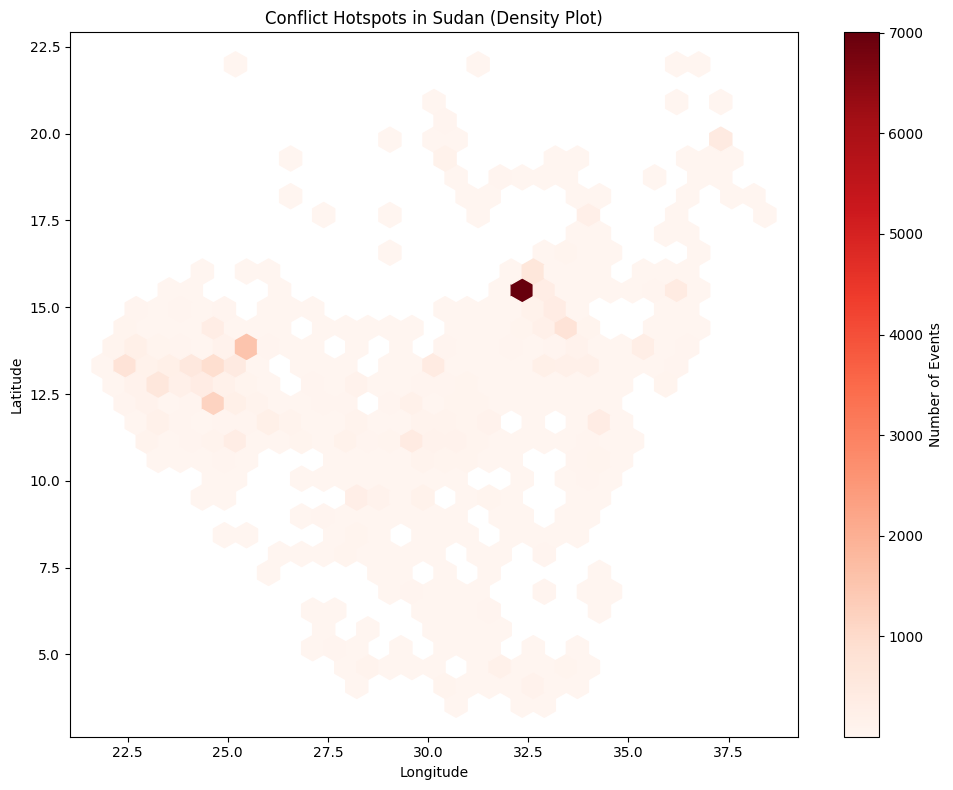

In [15]:
plt.figure(figsize=(10, 8))
plt.hexbin(df_sudan['longitude'], df_sudan['latitude'], gridsize=30, cmap='Reds', mincnt=1)
plt.colorbar(label='Number of Events')
plt.title('Conflict Hotspots in Sudan (Density Plot)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Geographical Density of Conflicts.png')

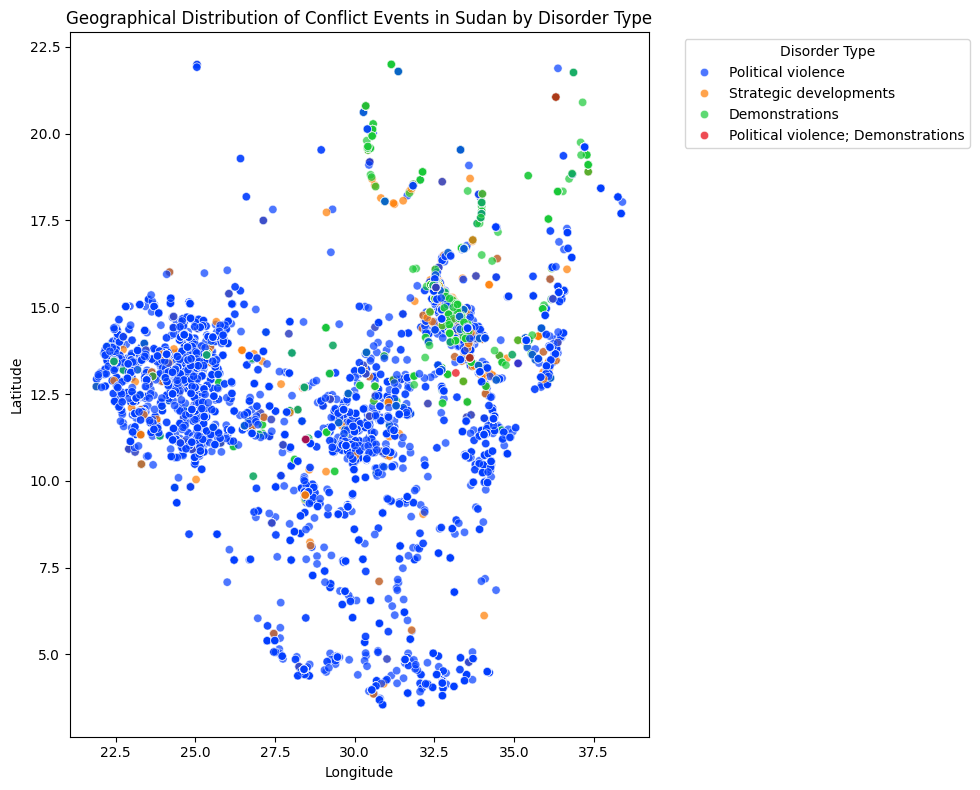

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='disorder_type', data=df_sudan, palette='bright', alpha=0.7)
plt.title('Geographical Distribution of Conflict Events in Sudan by Disorder Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Disorder Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Geographical Distribution by Disorder Type.png')

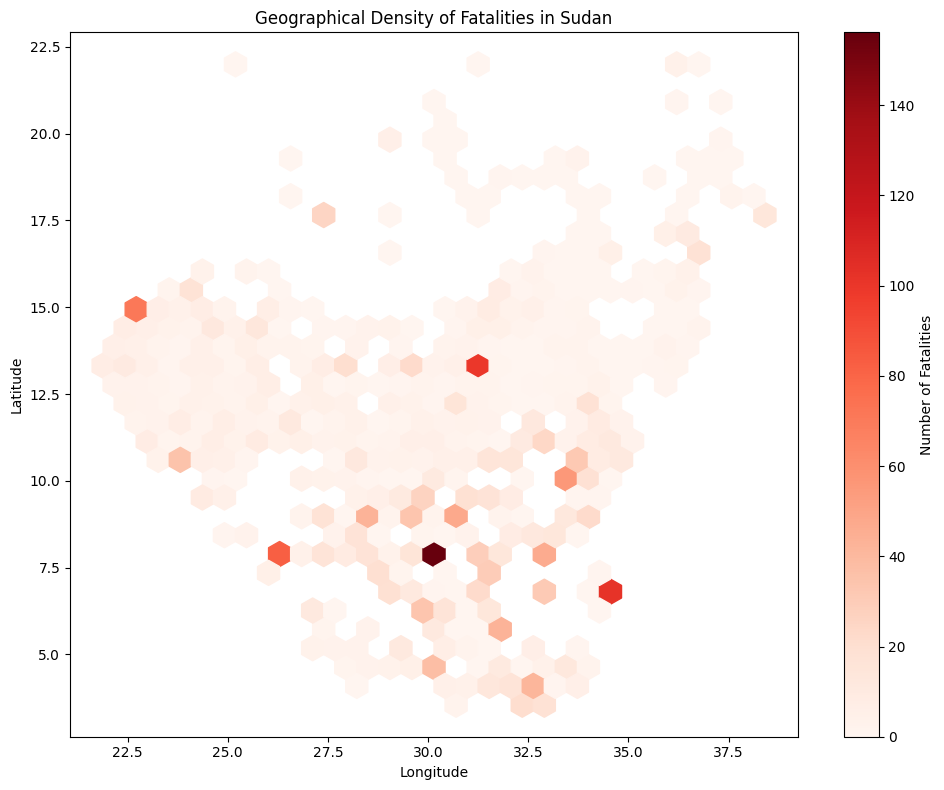

In [17]:
plt.figure(figsize=(10, 8))
plt.hexbin(df_sudan['longitude'], df_sudan['latitude'], C=df_sudan['fatalities'], gridsize=30, cmap='Reds', mincnt=1)
plt.colorbar(label='Number of Fatalities')
plt.title('Geographical Density of Fatalities in Sudan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Geographical Density of Fatalities.png')

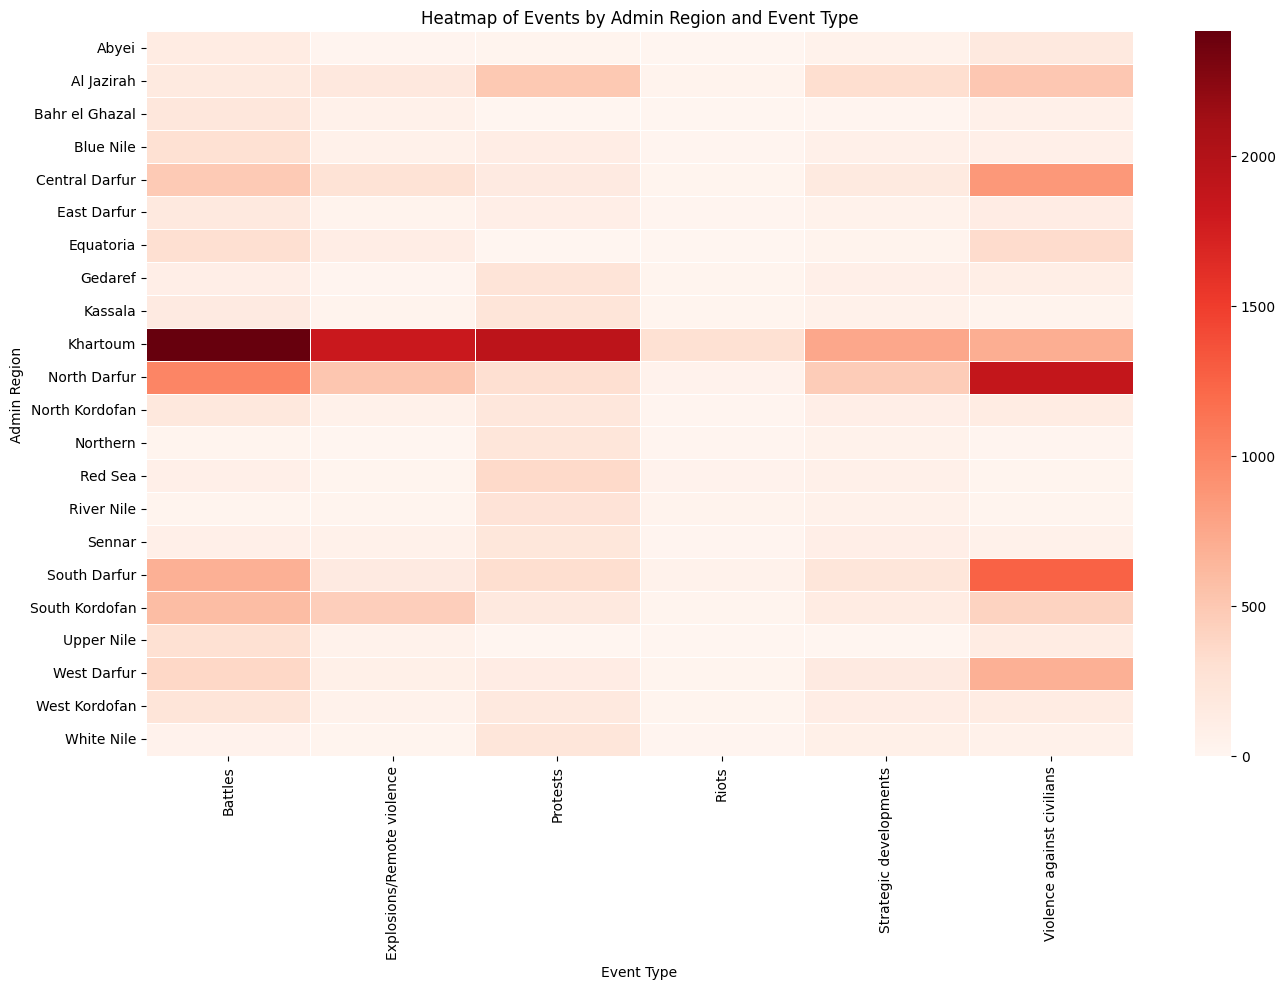

In [18]:
admin_event_pivot = df_sudan.pivot_table(index='admin1', columns='event_type', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(admin_event_pivot, cmap='Reds', linewidths=0.5)
plt.title('Heatmap of Events by Admin Region and Event Type')
plt.xlabel('Event Type')
plt.ylabel('Admin Region')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Heatmap by Admin Region and Event Type.png')

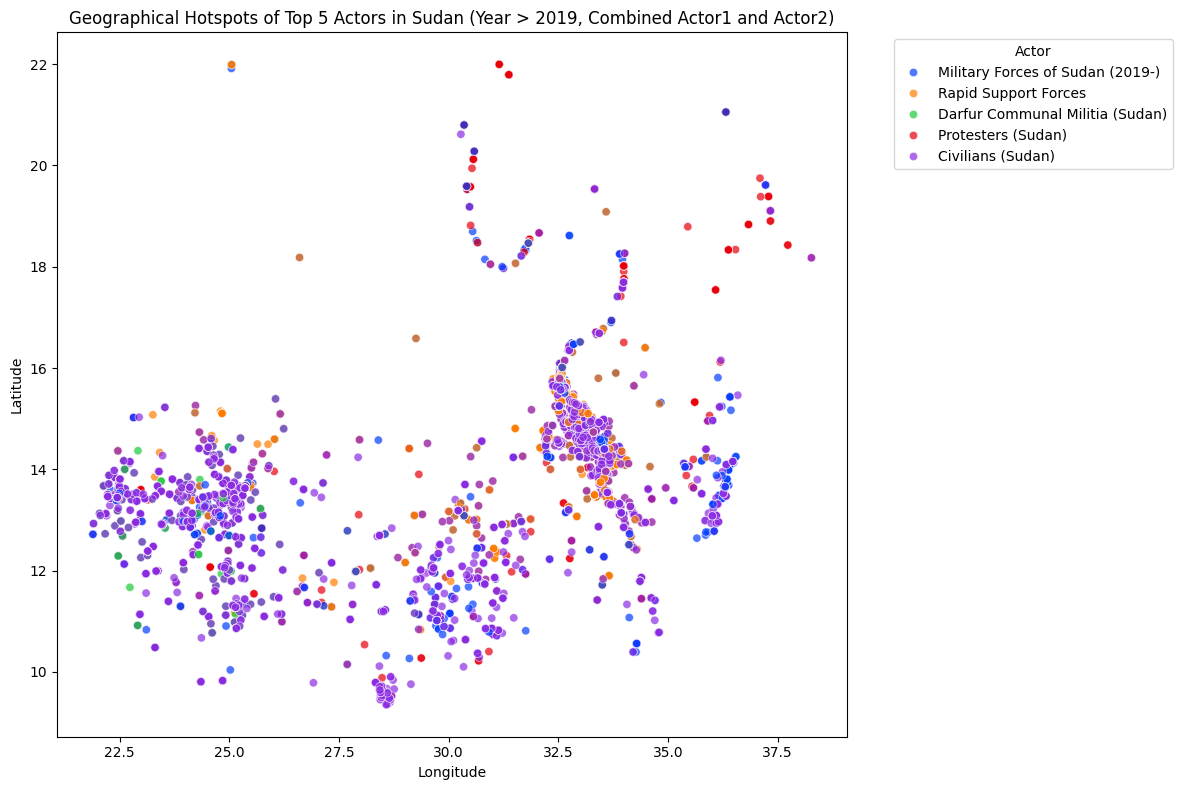

In [19]:
sudan_data_filtered = df_sudan[df_sudan['year'] > 2019]

combined_actor_data_filtered = pd.concat([sudan_data_filtered[['longitude', 'latitude', 'actor1']].rename(columns={'actor1': 'actor'}),
                                          sudan_data_filtered[['longitude', 'latitude', 'actor2']].rename(columns={'actor2': 'actor'})])

combined_actors_filtered = pd.concat([sudan_data_filtered['actor1'], sudan_data_filtered['actor2']]).value_counts().head(5).index
filtered_actor_data = combined_actor_data_filtered[combined_actor_data_filtered['actor'].isin(combined_actors_filtered)]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='actor', data=filtered_actor_data, alpha=0.7, palette='bright')
plt.title('Geographical Hotspots of Top 5 Actors in Sudan (Year > 2019, Combined Actor1 and Actor2)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Actor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Geographical Destribution by Actors after 2019.png')

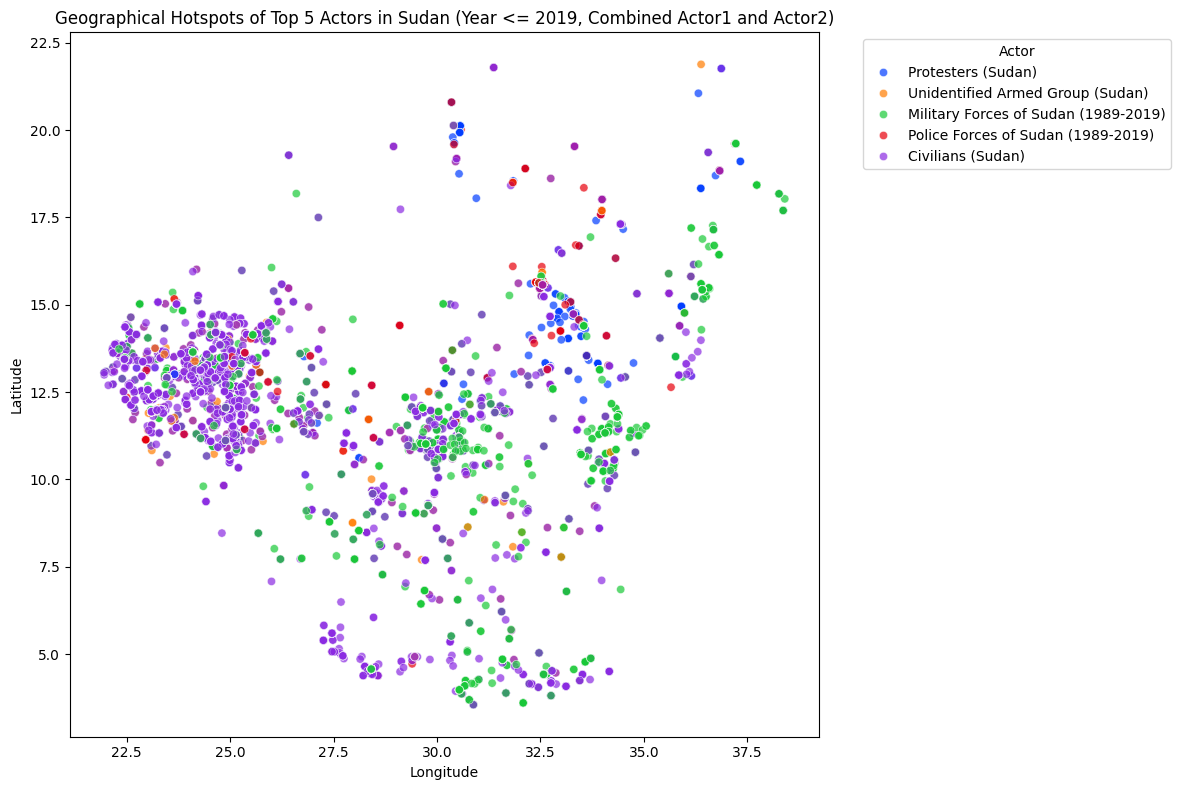

In [20]:
sudan_data_filtered = df_sudan[df_sudan['year'] <= 2019]

combined_actor_data_filtered = pd.concat([sudan_data_filtered[['longitude', 'latitude', 'actor1']].rename(columns={'actor1': 'actor'}),
                                          sudan_data_filtered[['longitude', 'latitude', 'actor2']].rename(columns={'actor2': 'actor'})])

combined_actors_filtered = pd.concat([sudan_data_filtered['actor1'], sudan_data_filtered['actor2']]).value_counts().head(5).index
filtered_actor_data = combined_actor_data_filtered[combined_actor_data_filtered['actor'].isin(combined_actors_filtered)]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='actor', data=filtered_actor_data, alpha=0.7, palette='bright')
plt.title('Geographical Hotspots of Top 5 Actors in Sudan (Year <= 2019, Combined Actor1 and Actor2)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Actor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Geographical Destribution by Actors before 2019.png')

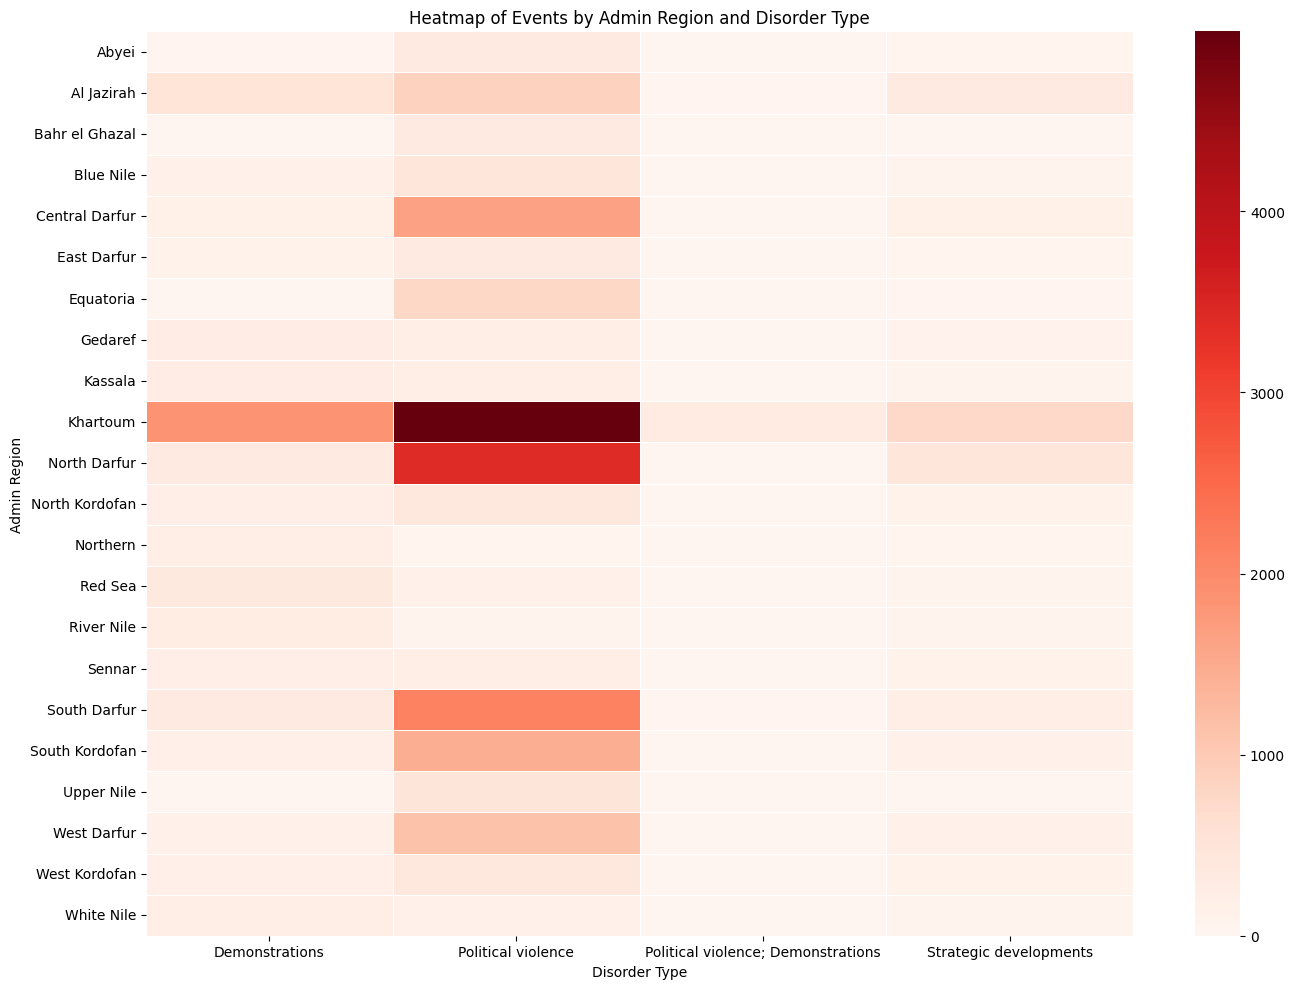

In [21]:
admin_disorder_pivot = df_sudan.pivot_table(index='admin1', columns='disorder_type', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(admin_disorder_pivot, cmap='Reds', linewidths=0.5)
plt.title('Heatmap of Events by Admin Region and Disorder Type')
plt.xlabel('Disorder Type')
plt.ylabel('Admin Region')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Heatmap by Admin Region and Disorder Type.png')

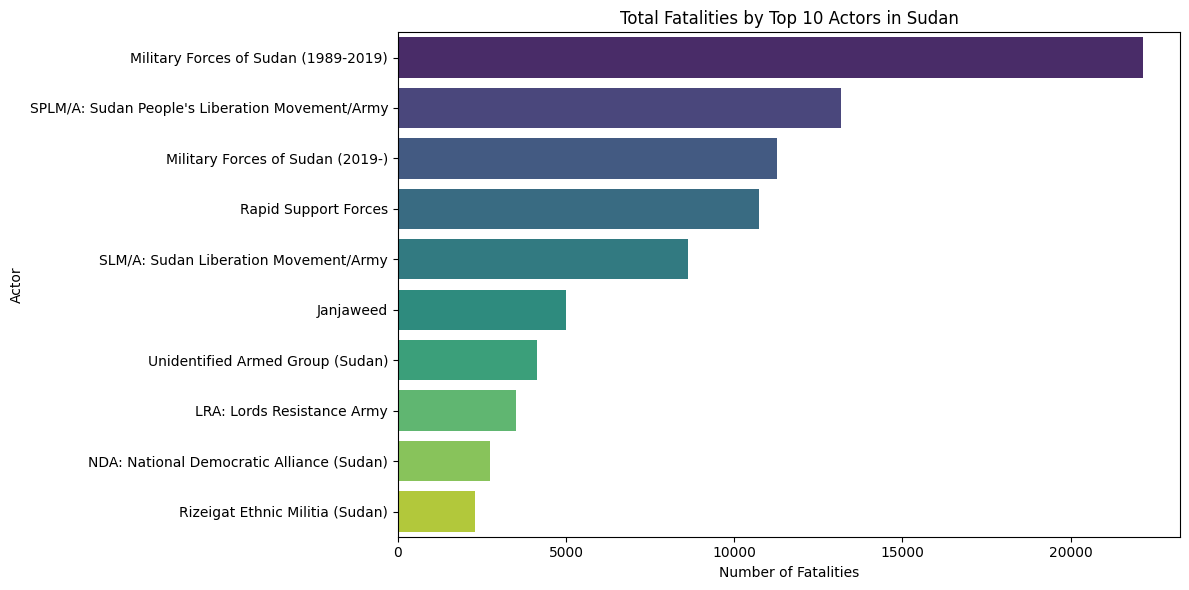

In [22]:
actor_fatalities = df_sudan.groupby('actor1')['fatalities'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=actor_fatalities.index, x=actor_fatalities.values, palette='viridis', hue=actor_fatalities.index)
plt.title('Total Fatalities by Top 10 Actors in Sudan')
plt.xlabel('Number of Fatalities')
plt.ylabel('Actor')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Total Fatalities by Actors.png')

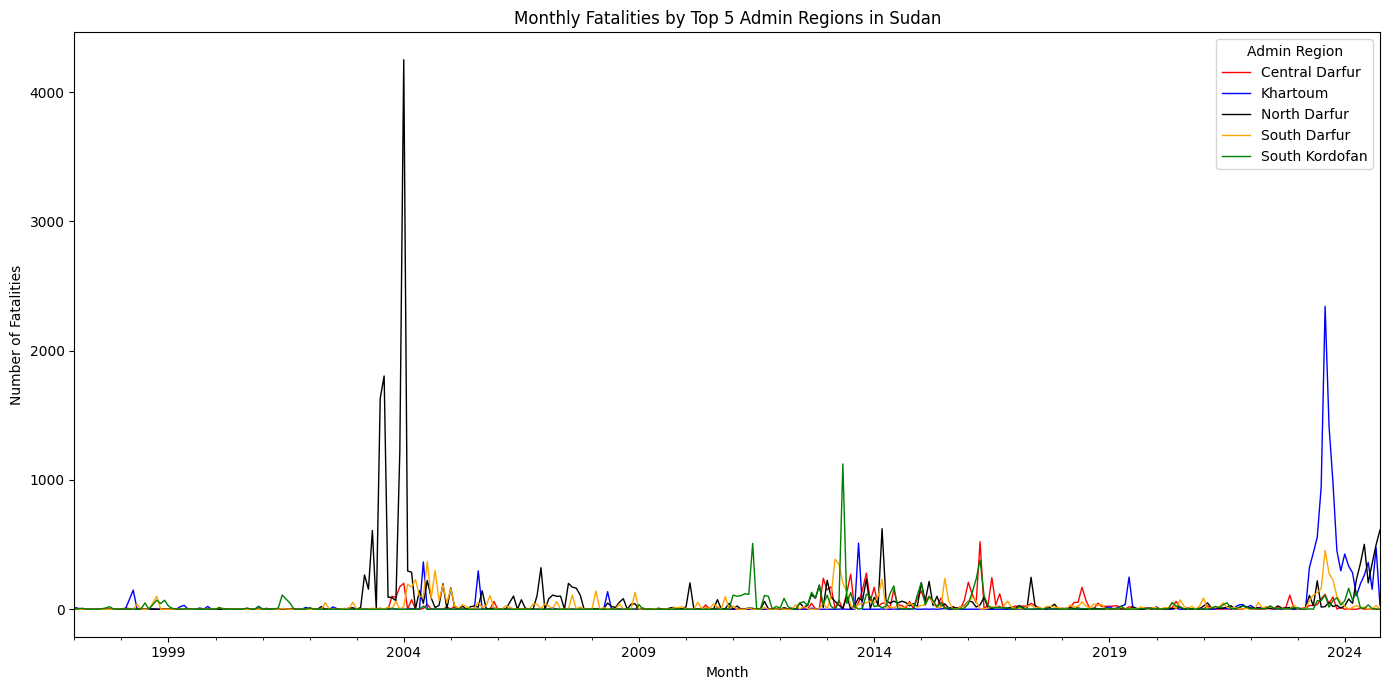

In [23]:
filtered_fatalities_admin = pd.melt(df_sudan.copy(), id_vars=['month', 'fatalities'], value_vars=['admin1', 'admin2', 'admin3'], value_name='admin')
filtered_fatalities_admin = filtered_fatalities_admin.dropna(subset=['admin'])

filtered_fatalities_admin = filtered_fatalities_admin[filtered_fatalities_admin['admin'].isin(combined_admin)]
admin_fatalities_trend = filtered_fatalities_admin.groupby(['month', 'admin'])['fatalities'].sum().unstack().fillna(0)

custom_colors = ['red', 'blue', 'black', 'orange', 'green']
admin_fatalities_trend.plot(kind='line', figsize=(14, 7), linewidth=1, color=custom_colors[:pivot_table.shape[1]])
plt.title('Monthly Fatalities by Top 5 Admin Regions in Sudan')
plt.xlabel('Month')
plt.ylabel('Number of Fatalities')
plt.legend(title='Admin Region')
plt.tight_layout()
# plt.show()
plt.savefig('plots/Monthly Fatalities by Admin Regions.png')

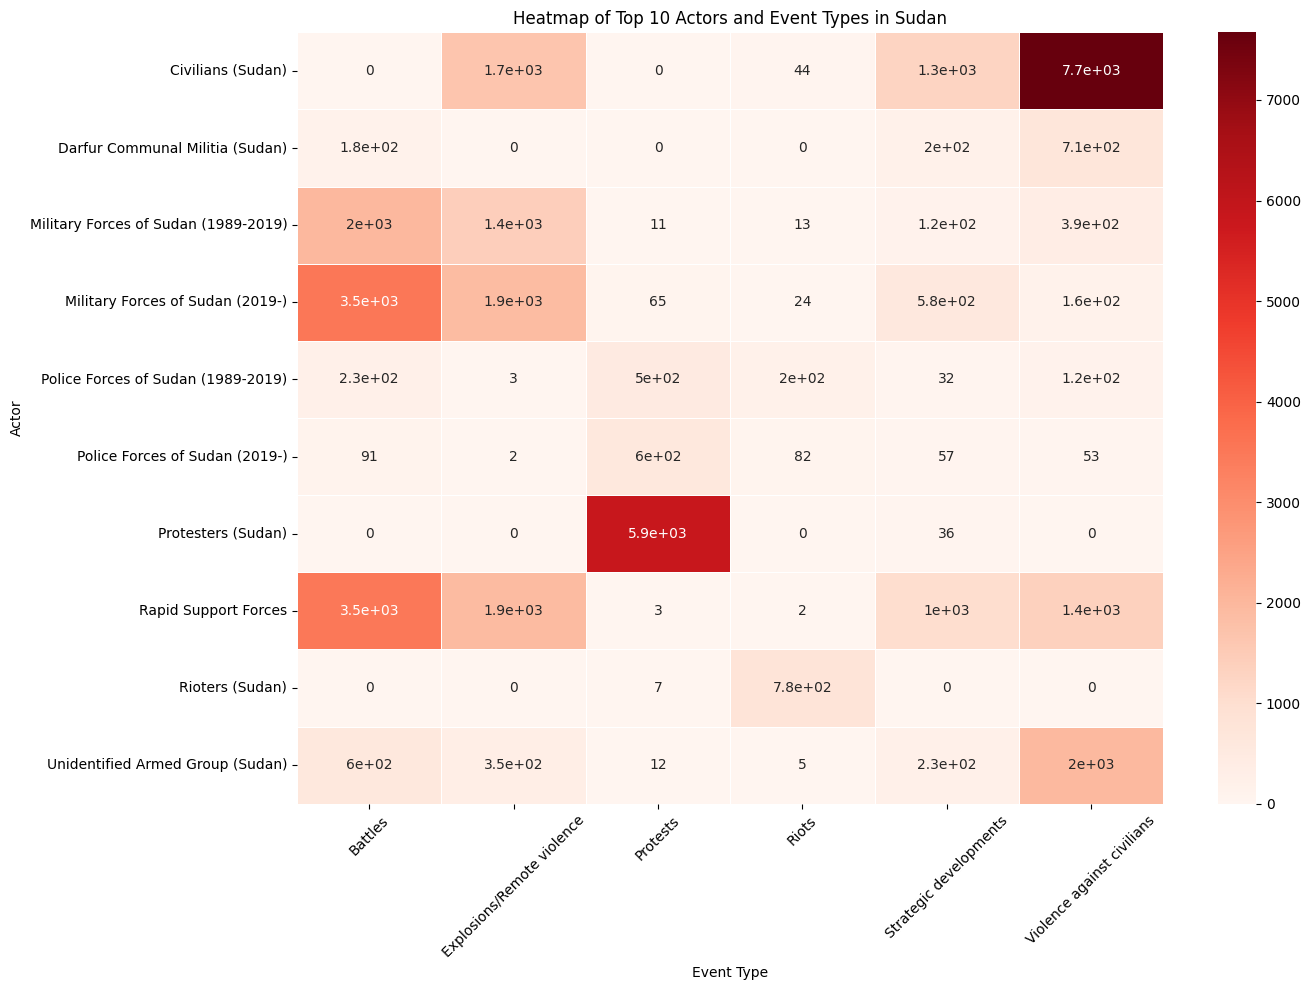

In [24]:
top_10_actors = pd.concat([df_sudan['actor1'], df_sudan['actor2']]).value_counts().head(10).index

filtered_actor_data = df_sudan[df_sudan['actor1'].isin(top_10_actors) | df_sudan['actor2'].isin(top_10_actors)]
expanded_actor_data = pd.concat([filtered_actor_data[['event_type', 'actor1']].rename(columns={'actor1': 'actor'}),
                                 filtered_actor_data[['event_type', 'actor2']].rename(columns={'actor2': 'actor'})])
expanded_actor_data = expanded_actor_data[expanded_actor_data['actor'].isin(top_10_actors)]
actor_event_pivot = expanded_actor_data.pivot_table(index='actor', columns='event_type', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(actor_event_pivot, cmap='Reds', linewidths=0.5, annot=True)
plt.title('Heatmap of Top 10 Actors and Event Types in Sudan')
plt.xlabel('Event Type')
plt.ylabel('Actor')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()
plt.savefig('plots/Heatmap by Actors and Event Types')

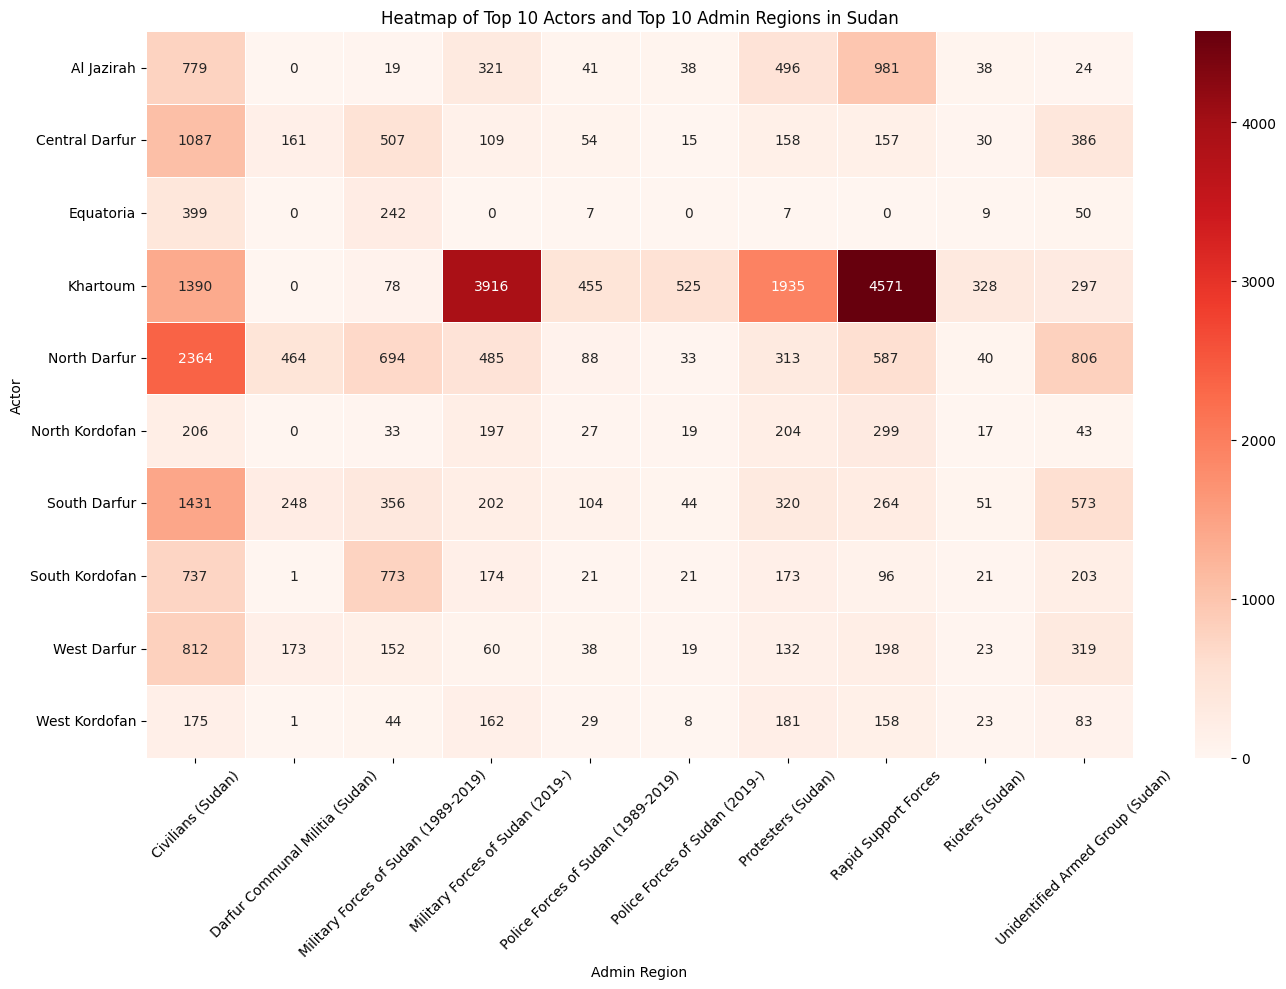

In [25]:
combined_actors_data = pd.concat([df_sudan[['actor1', 'admin1']].rename(columns={'actor1': 'actor', 'admin1': 'admin'}),
                                  df_sudan[['actor2', 'admin1']].rename(columns={'actor2': 'actor', 'admin1': 'admin'})])

top_10_actors = combined_actors_data['actor'].value_counts().head(10).index
top_10_admins = combined_actors_data['admin'].value_counts().head(10).index
filtered_combined_actors_data = combined_actors_data[
    (combined_actors_data['actor'].isin(top_10_actors)) & (combined_actors_data['admin'].isin(top_10_admins))
]
actor_admin_pivot = filtered_combined_actors_data.pivot_table(index='admin', columns='actor', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(actor_admin_pivot, cmap='Reds', linewidths=0.5, annot=True, fmt='d')
plt.title('Heatmap of Top 10 Actors and Top 10 Admin Regions in Sudan')
plt.xlabel('Admin Region')
plt.ylabel('Actor')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()
plt.savefig('plots/Heatmap by Actors and Admin Regions')

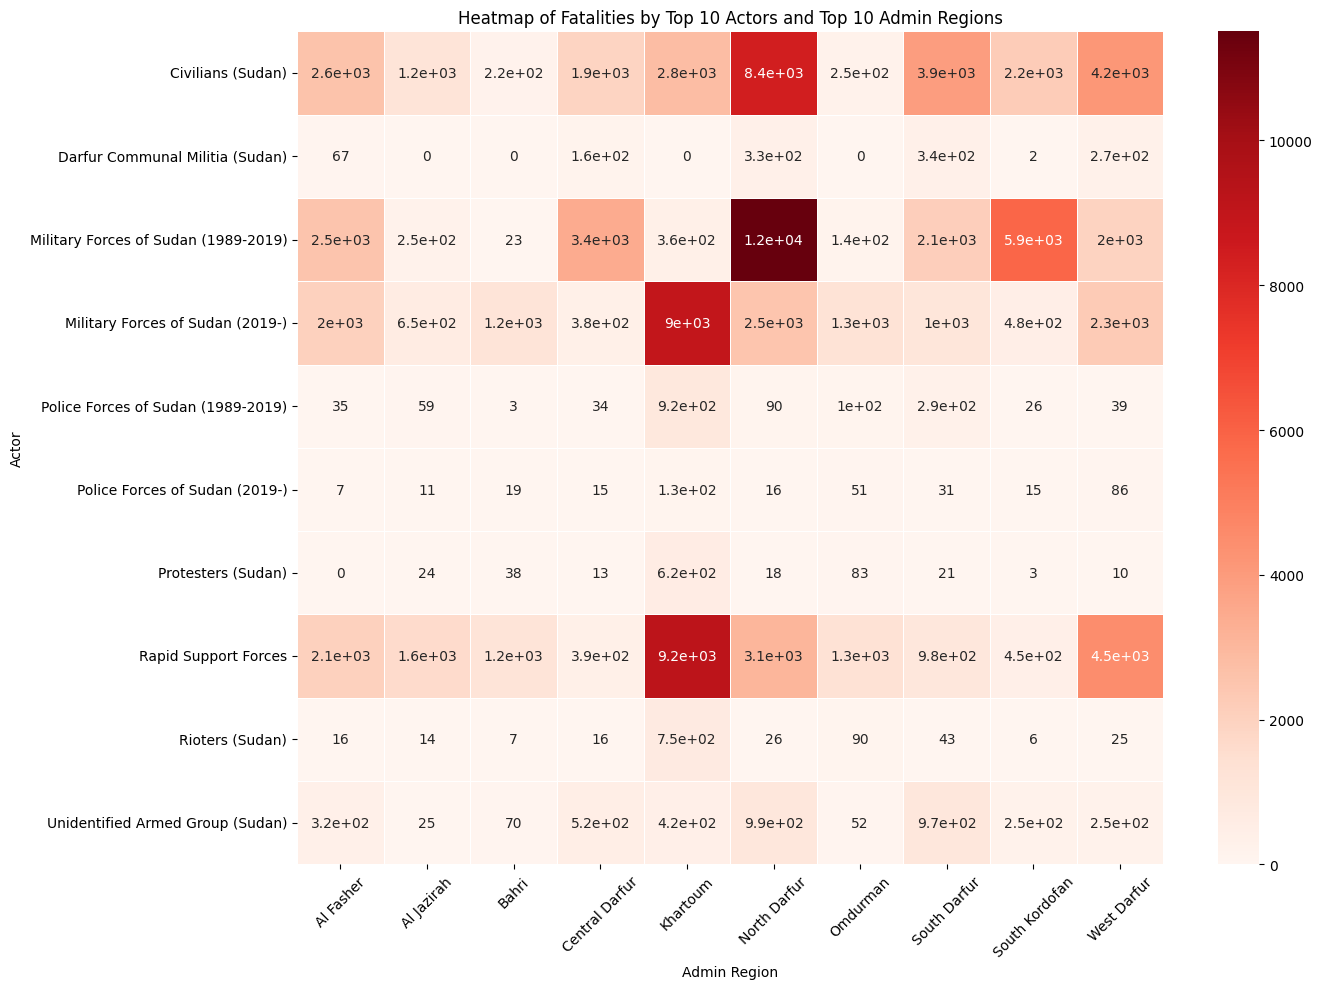

In [26]:
sudan_data_expanded_admin_actor = pd.melt(df_sudan, id_vars=['actor1', 'actor2', 'fatalities'], value_vars=['admin1', 'admin2', 'admin3'], value_name='admin')
sudan_data_expanded_admin_actor = sudan_data_expanded_admin_actor.dropna(subset=['admin'])

combined_actors_admin_data = pd.concat([sudan_data_expanded_admin_actor[['actor1', 'admin', 'fatalities']].rename(columns={'actor1': 'actor'}),
                                        sudan_data_expanded_admin_actor[['actor2', 'admin', 'fatalities']].rename(columns={'actor2': 'actor'})])

top_10_actors = combined_actors_admin_data['actor'].value_counts().index[:10]
top_10_admins = combined_actors_admin_data['admin'].value_counts().index[:10]

filtered_data_top_actors_admins = combined_actors_admin_data[combined_actors_admin_data['actor'].isin(top_10_actors) & combined_actors_admin_data['admin'].isin(top_10_admins)]
actor_admin_fatalities_pivot = filtered_data_top_actors_admins.pivot_table(index='actor', columns='admin', values='fatalities', aggfunc='sum', fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(actor_admin_fatalities_pivot, cmap='Reds', annot=True, linewidths=0.5)
plt.title('Heatmap of Fatalities by Top 10 Actors and Top 10 Admin Regions')
plt.xlabel('Admin Region')
plt.ylabel('Actor')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()
plt.savefig('plots/Heatmap of Fatalities by Actors and Admin Regions')

### Conflict Hotspots:
1. **El Geneina** and **El Fasher** (both in the Darfur region) show significant spikes in the number of events, especially from around 2019 onward, indicating ongoing or escalating conflicts.
2. **Nyala**, another city in the Darfur region, also displays increased conflict activity, especially during the earlier years (2004–2006) and resurges again after 2019.
3. **Juba**, the capital of South Sudan, exhibits frequent spikes, most notably around 2013, correlating with the civil conflict that started in South Sudan.
4. **Khartoum**, the capital of Sudan, while also showing an increase in conflict-related events, has periodic spikes and more consistent conflict activity starting in the 2019–2020 period, aligning with political unrest.

### Trend Evolution:
- **Pre-2004**: Relatively low conflict activity across all locations.
- **2004–2006**: A noticeable surge in conflicts in Darfur, particularly in **El Fasher** and **Nyala**, aligns with the height of the Darfur conflict.
- **Post-2010**: Conflict activity begins to rise again, with sporadic spikes in different cities.
- **2019–2023**: A marked increase in conflict events, especially in **El Geneina**, **Nyala**, and **Khartoum**. This period is notable for political turmoil in Sudan, the fall of the al-Bashir regime, and the ongoing violence in Darfur.

In conclusion, **Darfur cities like El Fasher, El Geneina, and Nyala** remain conflict hotspots over time, while **Juba** and **Khartoum** show more sporadic but significant conflict-related activity, particularly related to political events. The trends indicate sustained or even increasing conflict intensity, especially in the last few years.

Conflict and Violence Analysis
Nature of Violence: The most common types of conflict events are Strategic Developments, Explosions/Remote Violence, and Air/Drone Strikes. This indicates a high degree of military involvement, including airstrikes and movement of forces.
Conflict Hotspots: The scatter plot shows distinct clusters of conflict, primarily located in the central and southern regions of Sudan, indicating hotspots where violence is more concentrated.
Main Actors Involved: The data indicates that the main actors are Military Forces of Sudan and Rapid Support Forces, among others. These groups are involved in various types of events, including strikes and strategic movements.
Trend of Violence Over Time: There is an observable trend showing the number of conflict events across different time periods. The trend analysis shows spikes that could be indicative of heightened phases of conflict.

In-depth Analysis of Conflict and Violence in Sudan
1. Profile and Nature of Violence
The conflict in Sudan comprises various sub-event types, indicating the diverse nature of violence. The most frequent sub-events are:

Strategic Developments: These often involve movements of forces, which highlight the ongoing strategic positioning of armed groups.
Explosions/Remote Violence: This includes air/drone strikes and other remote explosive events, underscoring the prevalence of indiscriminate attacks affecting both combatants and civilians.
Violent Armed Clashes: Although not as frequent as strategic developments, direct confrontations still occur, adding to the overall complexity of violence in the region.
2. Conflict Hotspots
The conflict hotspots are primarily concentrated in the central and southern regions of Sudan, as observed from the density plot. These hotspots align with areas that have seen increased military activity, such as Khartoum and the Darfur region, highlighting regions where violent incidents are frequent.

3. Main Actors Involved
The top actors involved include:

Military Forces of Sudan: These are central players, frequently involved in airstrikes and violent clashes.
Rapid Support Forces (RSF): These forces have been involved in strategic movements and are a significant actor in the conflict, often engaging in organized violent activities.
Other Armed Groups: Various militias and smaller factions also contribute to the violence, which adds to the fragmented nature of the conflict.
4. Evolution of Trends Over Time
The trend of different sub-event types over time shows:

Strategic Developments have seen a steady increase, indicating more frequent repositioning of forces and changes in group activities.
Explosions/Remote Violence show periodic spikes, likely correlating with specific military offensives.
The occurrence of violent clashes tends to fluctuate, possibly corresponding to phases of escalation or temporary ceasefires.
The detailed trends reveal a complex pattern of evolving violence, driven by military strategies, territorial ambitions, and sporadic flare-ups of direct confrontation.

Detailed Analysis of Conflict Trends Over Time (Using Monthly Data)
Profile and Nature of Violence: The detailed trend analysis shows fluctuations in different sub-event types over time, indicating various phases of conflict:

Strategic Developments have remained high consistently, implying that armed groups and military actors are often repositioning or changing their activities.
Explosions/Remote Violence and Violent Clashes show spikes at particular times, indicating phases of intense military operations or escalations.
Conflict Hotspots: From previous analysis, the geographic concentration of violence remains in central and southern regions. The monthly trend adds further context, highlighting how conflicts have periodically intensified in specific locations.

Main Actors Involved: The analysis of actors shows that:

The Military Forces of Sudan and Rapid Support Forces (RSF) have been central players, with varying levels of engagement month to month.
The presence of other armed groups reflects a multi-faceted and decentralized nature of conflict, making it complex to manage.
Trend Evolution: The temporal evolution of different sub-event types over months indicates:

Peaks in remote violence during some months, possibly aligning with specific military campaigns.
The consistent occurrence of strategic developments, which highlights ongoing attempts by both state and non-state actors to maneuver and maintain control.
These monthly trends help decision-makers understand when conflict intensifies and which actors are involved, providing a timeline for planning interventions or humanitarian efforts.

The plot above shows the Total Fatalities per Month in Sudan over time:

There are noticeable peaks in certain months, indicating periods of intense conflict resulting in a higher number of fatalities.
The trend helps in understanding the temporal escalation of violence, highlighting months with critical humanitarian needs.
This visualization can be instrumental in guiding timely interventions and focusing resources on periods when civilian populations are most at risk.

Analysis of Events for Top Actors, Inters, and Associate Actors in Sudan
Top 5 Actors: The first plot shows the number of events involving the top 5 actors each month. The trends reveal variations in actor involvement, reflecting shifting dynamics in the conflict, such as intensification or de-escalation periods for different actors.

Top 5 Inters: The second plot illustrates the monthly activity for the top 5 inter types, indicating how different types of interactions (e.g., state vs. non-state, armed vs. civilian) have evolved over time.

Top 5 Associate Actors: The third plot shows event trends for the top 5 associate actors. These actors could be supporting entities or other involved groups, adding to the complexity of alliances and adversaries in the conflict.

These insights help identify key stakeholders and their influence over time, aiding in targeted interventions or diplomatic actions.

Analysis of Events by Administrative Regions in Sudan
Number of Events per Admin Region (Top 10):

The bar plot shows the top 10 administrative regions with the highest number of conflict events. This highlights which regions are most affected, providing an insight into areas experiencing the most instability.
Number of Events per Month for Top 5 Admin Regions:

The line plot shows the monthly trends for the top 5 administrative regions. The trends illustrate which regions are persistently impacted and which ones see spikes in conflict at specific times, helping to identify temporal escalation patterns in different areas.

['geo_precision', 'notes', 'tags']
legend color change

# Food Insecurity

In [27]:
food_data = pd.read_csv('data/food_data/ipc_sdn_level1_long.csv')
food_data.head()

Date of analysis        Country Total country population         Level 1  \
0   #date+analysis  #country+code              #population     #loc+level1   
1         Apr 2024            SDN                 47208125  South Kordofan   
2         Apr 2024            SDN                 47208125  South Kordofan   
3         Apr 2024            SDN                 47208125  South Kordofan   
4         Apr 2024            SDN                 47208125  South Kordofan   

  Validity period         From          To            Phase         Number  \
0   #period+v_ipc  #date+start   #date+end  #severity+v_ipc  #affected+num   
1         current   2024-04-01  2024-05-31              all        2098395   
2         current   2024-04-01  2024-05-31               3+        1018272   
3         current   2024-04-01  2024-05-31                1         349328   
4         current   2024-04-01  2024-05-31                2         730795   

      Percentage  
0  #affected+pct  
1            1.0  
2           0.48  
3           0.17  
4           0.35

In [28]:
food_data_cleaned = food_data[food_data['Date of analysis'] != '#date+analysis'].copy()
food_data_cleaned.columns = ['date_analysis', 'country', 'total_population', 'region', 'validity_period',
                             'date_from', 'date_to', 'phase', 'affected_number', 'percentage']
food_data_cleaned['affected_number'] = pd.to_numeric(food_data_cleaned['affected_number'], errors='coerce')
food_data_cleaned['percentage'] = pd.to_numeric(food_data_cleaned['percentage'], errors='coerce')
food_data_cleaned['date_analysis'] = pd.to_datetime(food_data_cleaned['date_analysis'], errors='coerce')
food_data_cleaned['date_from'] = pd.to_datetime(food_data_cleaned['date_from'], errors='coerce')
food_data_cleaned['date_to'] = pd.to_datetime(food_data_cleaned['date_to'], errors='coerce')

food_data_cleaned.head()

C:\Users\dlee3\AppData\Local\Temp\ipykernel_48152\2017350300.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  food_data_cleaned['date_analysis'] = pd.to_datetime(food_data_cleaned['date_analysis'], errors='coerce')


date_analysis country total_population          region validity_period  \
1    2024-04-01     SDN         47208125  South Kordofan         current   
2    2024-04-01     SDN         47208125  South Kordofan         current   
3    2024-04-01     SDN         47208125  South Kordofan         current   
4    2024-04-01     SDN         47208125  South Kordofan         current   
5    2024-04-01     SDN         47208125  South Kordofan         current   

   date_from    date_to phase  affected_number  percentage  
1 2024-04-01 2024-05-31   all          2098395        1.00  
2 2024-04-01 2024-05-31    3+          1018272        0.48  
3 2024-04-01 2024-05-31     1           349328        0.17  
4 2024-04-01 2024-05-31     2           730795        0.35  
5 2024-04-01 2024-05-31     3           699840        0.33

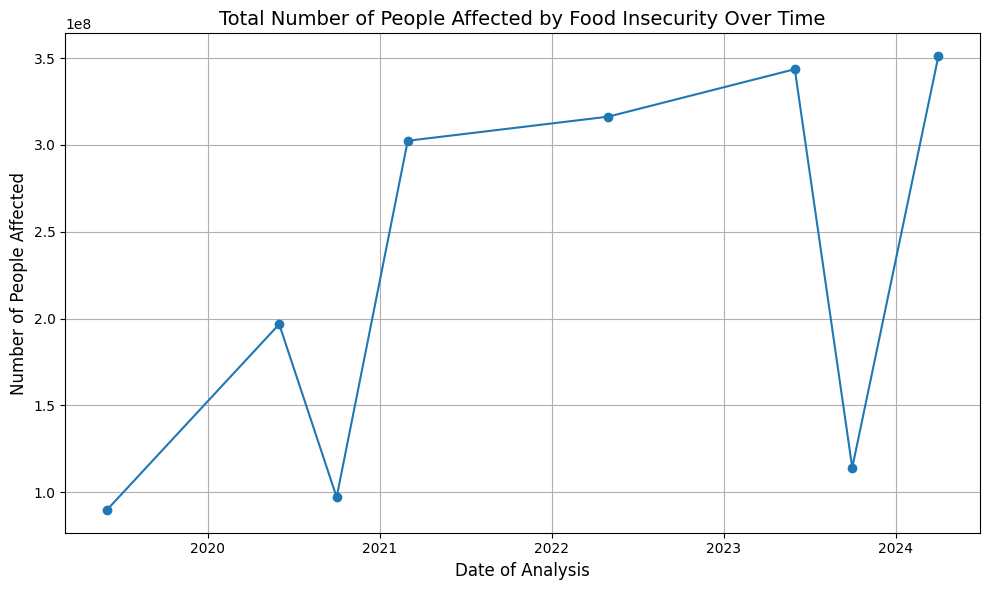

In [29]:
food_insecurity_time = food_data_cleaned.groupby('date_analysis')['affected_number'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(food_insecurity_time['date_analysis'], food_insecurity_time['affected_number'], marker='o')
plt.title('Total Number of People Affected by Food Insecurity Over Time', fontsize=14)
plt.xlabel('Date of Analysis', fontsize=12)
plt.ylabel('Number of People Affected', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


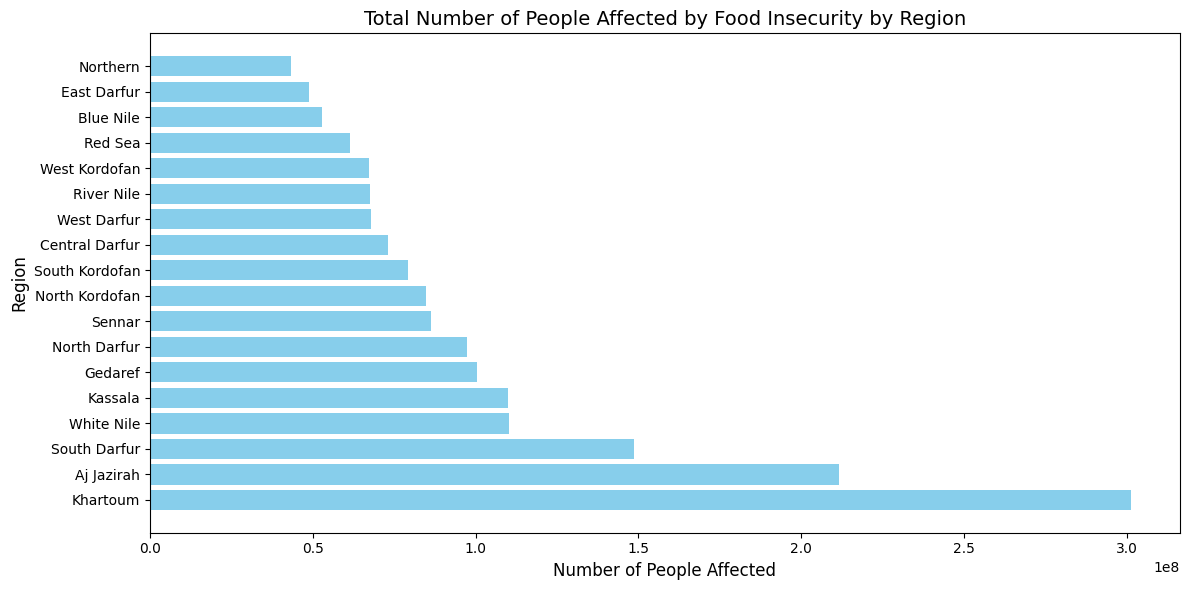

In [30]:
food_insecurity_region = food_data_cleaned.groupby('region')['affected_number'].sum().reset_index()
food_insecurity_region = food_insecurity_region.sort_values(by='affected_number', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(food_insecurity_region['region'], food_insecurity_region['affected_number'], color='skyblue')
plt.title('Total Number of People Affected by Food Insecurity by Region', fontsize=14)
plt.xlabel('Number of People Affected', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape, Polygon
import matplotlib.pyplot as plt
import fiona

shapefile_path = 'data/state_poly_mar20/State_Poly_Mar20.shp' # https://data.humdata.org/dataset/sudan-administrive-boundaries-1
with fiona.open(shapefile_path) as shapefile:
    sudan_shapes = [feature for feature in shapefile]

region_geometries = []
region_names = []
for feature in sudan_shapes:
    region_geometries.append(feature['geometry'])
    region_names.append(feature['properties'].get('State_En', 'Unknown'))

region_data = pd.DataFrame({
    'region': region_names,
    'geometry': region_geometries
})
valid_geometries = []
for geom in region_data['geometry']:
    valid_geometries.append(Polygon(geom['coordinates'][0]))
region_data['geometry'] = valid_geometries
gdf_regions = gpd.GeoDataFrame(region_data, geometry='geometry')

<class 'geopandas.geodataframe.GeoDataFrame'>


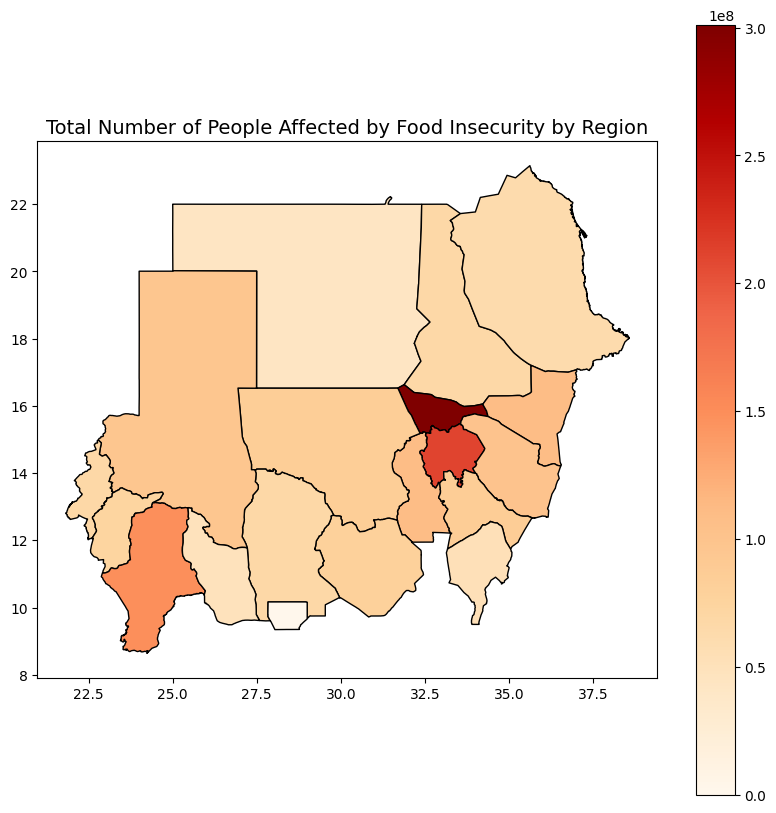

In [33]:
merged_gdf = gdf_regions.merge(food_insecurity_region, on='region', how='left')
merged_gdf['affected_number'] = merged_gdf['affected_number'].fillna(0).astype(int)
fig, ax = plt.subplots(figsize=(10, 10))
print(type(merged_gdf))
merged_gdf.plot(column='affected_number', cmap='OrRd', legend=True, ax=ax, edgecolor='black')
plt.title('Total Number of People Affected by Food Insecurity by Region', fontsize=14)
plt.show()

In [34]:
df_sudan.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp', 'month'],
      dtype='object')

In [35]:
df_sudan = df_sudan.drop(columns=['year','country','iso','region'])

In [36]:
conflicts_data = df_sudan.rename(columns={'admin1':'region'})
conflicts_data = conflicts_data.drop(columns=['event_id_cnty', 'time_precision', 'geo_precision', 'timestamp', 'admin2', 'admin3', 'location'])
conflicts_data.columns

Index(['event_date', 'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'region', 'latitude', 'longitude',
       'source', 'source_scale', 'notes', 'fatalities', 'tags', 'month'],
      dtype='object')

In [37]:
food_data_cleaned['month'] = pd.to_datetime(food_data_cleaned['date_analysis']).dt.to_period('M')

In [38]:
conflicts_data.to_csv('data/cleaned/conflicts.csv')
food_data_cleaned.to_csv('data/cleaned/food.csv')
gdf_regions.to_csv('data/cleaned/region.csv')

# Cooking Food Insecurity and Conflicts Data

In [39]:
conflicts_data = pd.read_csv('data/cleaned/conflicts.csv', index_col=0)
food_insecurity_data = pd.read_csv('data/cleaned/food.csv', index_col=0)

In [40]:
merged_data = pd.merge(conflicts_data, food_insecurity_data, how='inner', left_on=['region', 'month'], right_on=['region', 'month'])
merged_data.columns

Index(['event_date', 'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'region', 'latitude', 'longitude',
       'source', 'source_scale', 'notes', 'fatalities', 'tags', 'month',
       'date_analysis', 'country', 'total_population', 'validity_period',
       'date_from', 'date_to', 'phase', 'affected_number', 'percentage'],
      dtype='object')

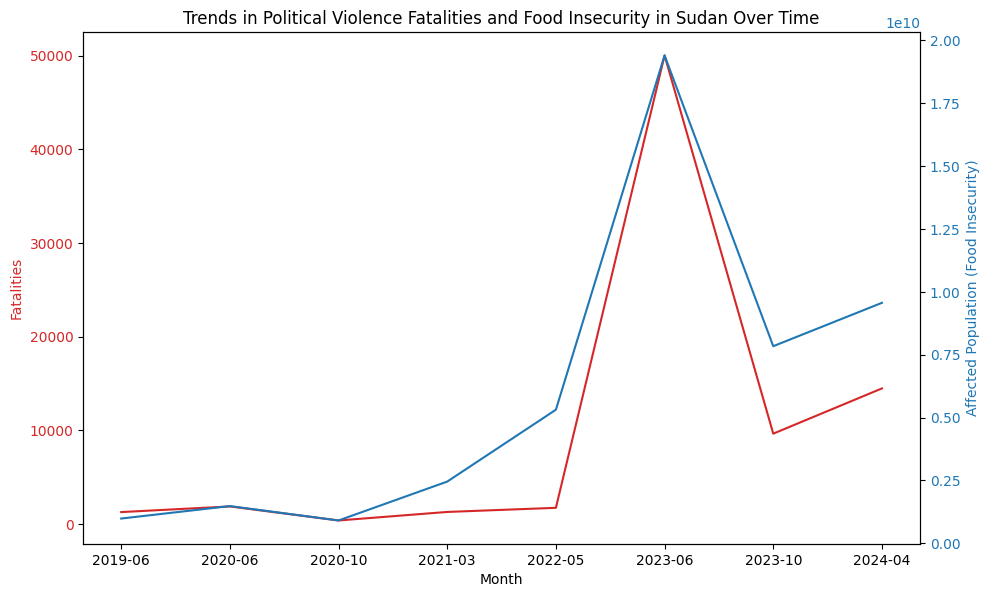

C:\Users\dlee3\AppData\Local\Temp\ipykernel_48152\1657878464.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(region_data['region'], rotation=90)


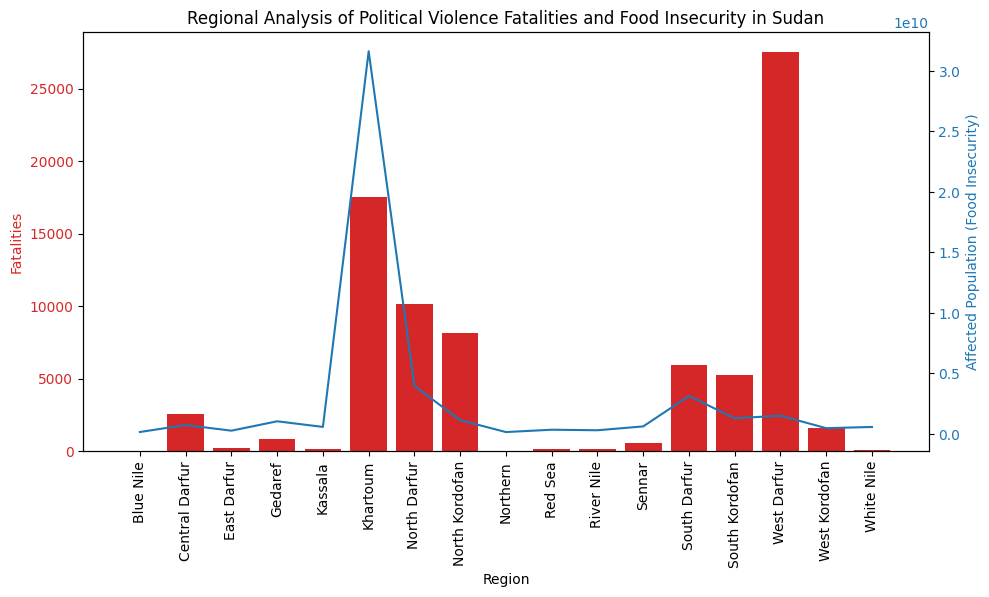

In [42]:
region_data = merged_data.groupby('region').agg({
    'fatalities': 'sum',
    'affected_number': 'sum',
    'percentage': 'mean'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Region')
ax1.set_ylabel('Fatalities', color='tab:red')
ax1.bar(region_data['region'], region_data['fatalities'], color='tab:red', label='Fatalities')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_xticklabels(region_data['region'], rotation=90)

ax2 = ax1.twinx()
ax2.set_ylabel('Affected Population (Food Insecurity)', color='tab:blue')
ax2.plot(region_data['region'], region_data['affected_number'], color='tab:blue', label='Affected Population')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.title('Regional Analysis of Political Violence Fatalities and Food Insecurity in Sudan')
plt.show()

C:\Users\dlee3\AppData\Local\Temp\ipykernel_48152\962196243.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(violence_occurrences['region'], rotation=90)


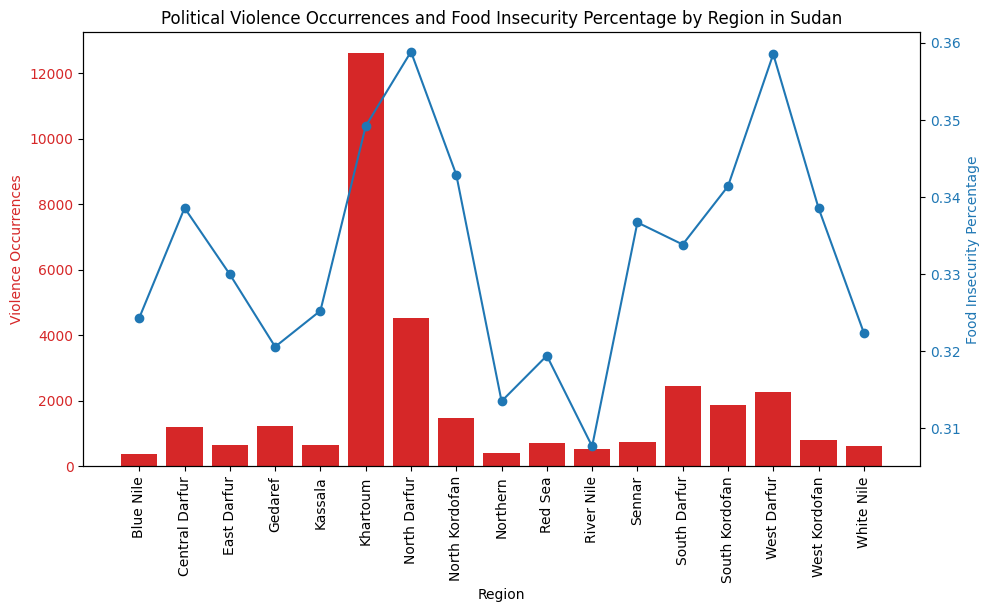

In [43]:
violence_occurrences = merged_data.groupby('region').agg({
    'fatalities': 'count',  # counting the number of events (occurrences)
    'percentage': 'mean'    # average percentage of population affected by food insecurity
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Region')
ax1.set_ylabel('Violence Occurrences', color='tab:red')
ax1.bar(violence_occurrences['region'], violence_occurrences['fatalities'], color='tab:red', label='Violence Occurrences')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_xticklabels(violence_occurrences['region'], rotation=90)

ax2 = ax1.twinx()
ax2.set_ylabel('Food Insecurity Percentage', color='tab:blue')
ax2.plot(violence_occurrences['region'], violence_occurrences['percentage'], color='tab:blue', marker='o', label='Food Insecurity Percentage')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.title('Political Violence Occurrences and Food Insecurity Percentage by Region in Sudan')
plt.show()

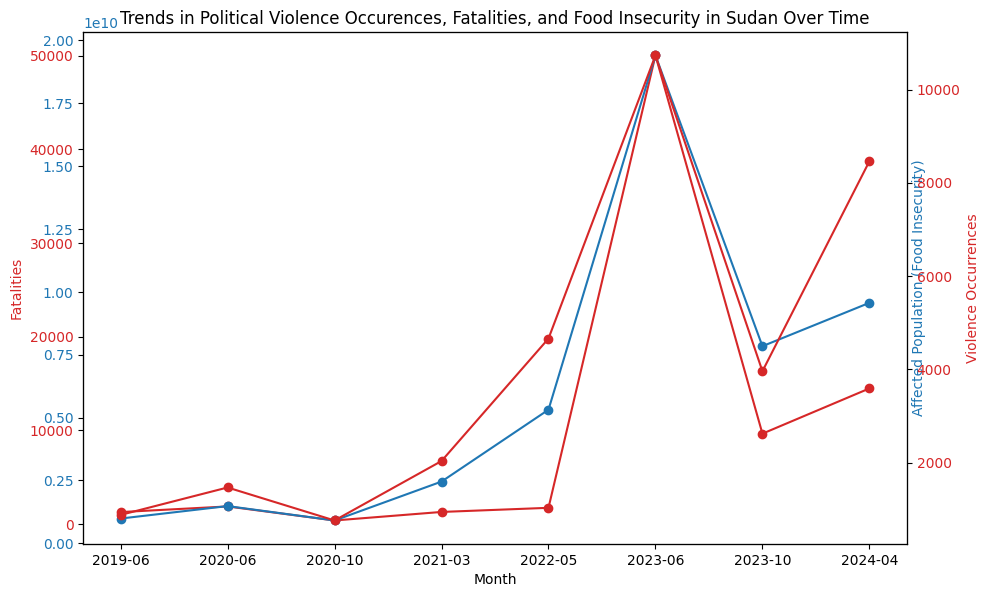

In [743]:
monthly_data = merged_data.groupby('month').agg({
    'fatalities': 'sum',
    'affected_number': 'sum',
    'event_date': 'count'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Month')
ax1.set_ylabel('Fatalities', color='tab:red')
ax1.plot(monthly_data['month'].astype(str), monthly_data['fatalities'], color='tab:red', label='Fatalities', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Affected Population (Food Insecurity)', color='tab:blue')
ax2.plot(monthly_data['month'].astype(str), monthly_data['affected_number'], color='tab:blue', label='Affected Population', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax3 = ax2.twinx()
ax3.set_ylabel('Violence Occurrences', color='tab:red')
ax3.plot(monthly_data['month'].astype(str), monthly_data['event_date'], color='tab:red', marker='o', label='Violence Occurrences')
ax3.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Trends in Political Violence Occurences, Fatalities, and Food Insecurity in Sudan Over Time')
plt.show()

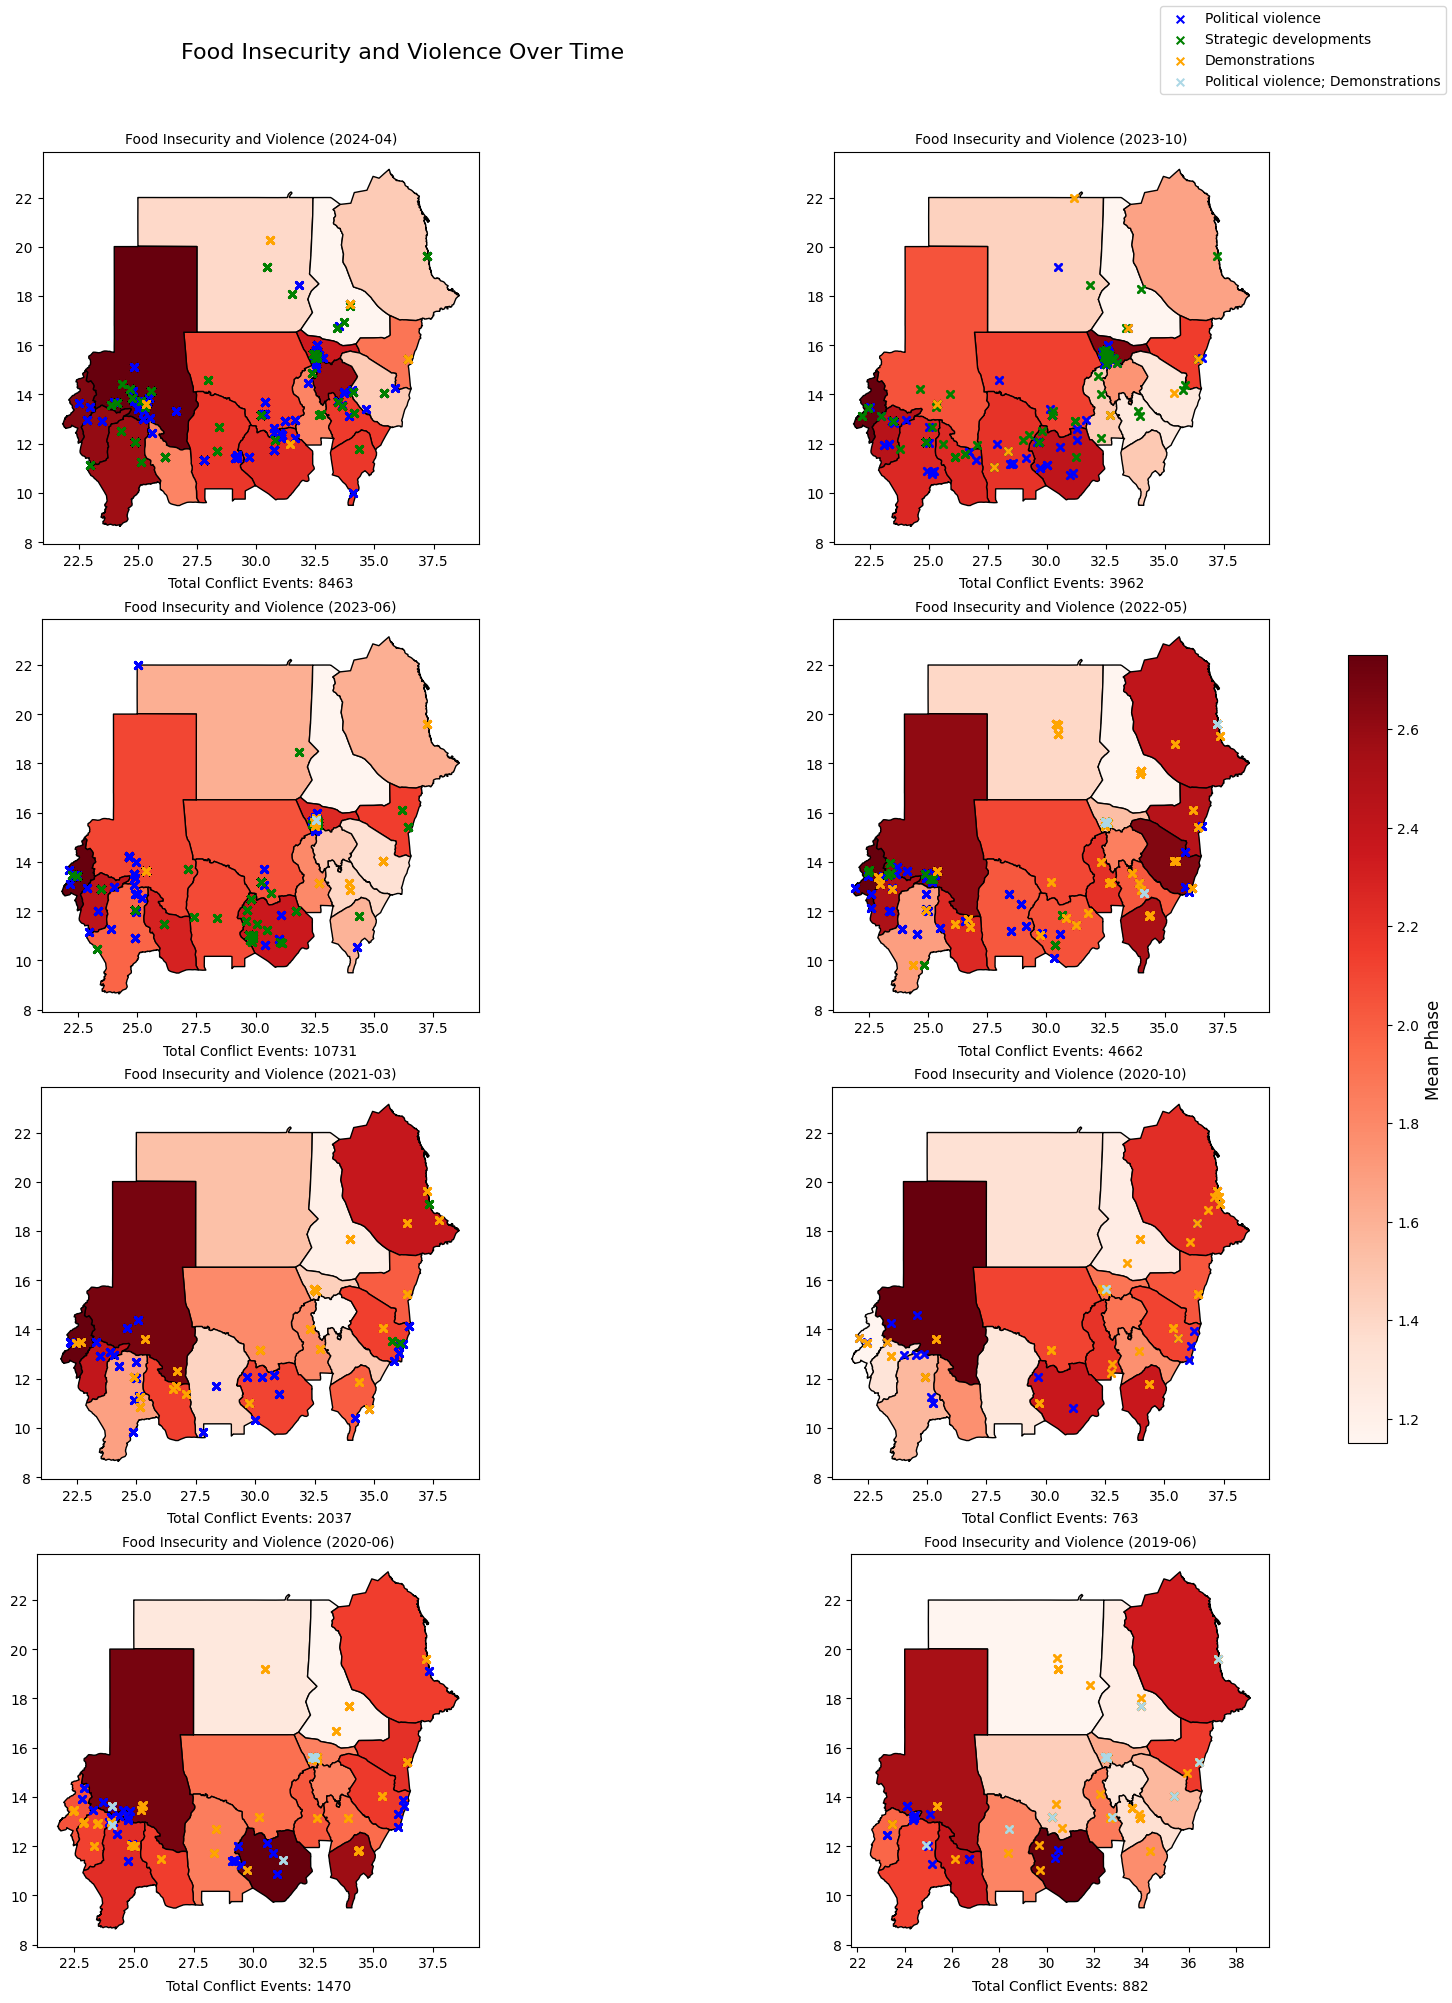

In [60]:
# Create a figure with 4 rows and 2 columns (4x2 grid)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Flatten the axes array to make it easier to index

# Set the main title
fig.suptitle('Food Insecurity and Violence Over Time', fontsize=16)

# Create a list to hold the colorbars for each plot (for normalization purposes)
all_phase_values = []

for idx, month in enumerate(months):
    ax = axes[idx]  # Get the current axis from the grid

    # Filter the food insecurity data for the month
    filtered_data = food_insecurity_data[(food_insecurity_data['month'] == month) & (food_insecurity_data['validity_period'] == 'current')]

    if filtered_data.empty:
        # If there is no data for this month, display a message
        ax.text(0.5, 0.5, f'No data available for {month}', horizontalalignment='center', verticalalignment='center', fontsize=14)
        ax.set_axis_off()  # Hide the axes if no data is available
        continue

    filtered_data = filtered_data[['region', 'phase', 'percentage']]
    filtered_data = filtered_data[(filtered_data['phase'] != '3+') & (filtered_data['phase'] != 'all')]
    filtered_data['phase'] = filtered_data['phase'].astype(int)
    filtered_data['phase_weighted'] = filtered_data['phase'] * filtered_data['percentage']
    filtered_data = filtered_data.drop(columns=['phase', 'percentage'])
    filtered_data = filtered_data.groupby('region')['phase_weighted'].sum().reset_index()

    filtered_conflict_data = merged_data[merged_data['month'] == month]
    filtered_conflict_data.loc[:, 'civilian_targeting'] = filtered_conflict_data[['civilian_targeting']].fillna('non_civilian_targeting')
    conflict_geo_df = gpd.GeoDataFrame(
        filtered_conflict_data, 
        geometry=gpd.points_from_xy(filtered_conflict_data['longitude'], filtered_conflict_data['latitude']),
        crs="EPSG:4326"
    )

    colors = {  # 'disorder_type'
        'Political violence': 'blue',
        'Strategic developments': 'green',
        'Demonstrations': 'orange',
        'Political violence; Demonstrations': 'lightblue'
    }
    
    merged_gdf = gdf_regions.merge(filtered_data, on='region', how='left')
    all_phase_values.extend(merged_gdf['phase_weighted'].tolist())  # Collect all phase values for normalization

    plot = merged_gdf.plot(column='phase_weighted', cmap='Reds', ax=ax, edgecolor='black')

    for dtype, color in colors.items():
        subset = conflict_geo_df[conflict_geo_df['disorder_type'] == dtype]
        if not subset.empty:
            subset.plot(ax=ax, marker='x', color=color, markersize=30, label=dtype)

    ax.set_title(f'Food Insecurity and Violence ({month})', fontsize=10)
    conflict_count = len(conflict_geo_df)
    ax.text(0.5, -0.1, f"Total Conflict Events: {conflict_count}", 
            ha='center', va='center', fontsize=10, color='black', transform=ax.transAxes)

# Adjust layout to make sure plots are well spaced
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for main title

# Create a single colorbar for the entire figure
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=min(all_phase_values), vmax=max(all_phase_values)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Mean Phase', fontsize=12)

# Display the legend (adjusted to fit in the main figure)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=10)

plt.show()


# Refugees Movement

In [ ]:
demographics_residing = pd.read_csv('data/refugees_data/demographics_residing_sdn.csv')
demographics_residing = demographics_residing.iloc[1:, :]
col_list = ['Female 0-4', 'Female 5-11', 'Female 12-17', 'Female 18-59', 'Female 60 or more',
       'Female Unknown', 'Female Total', 'Male 0-4', 'Male 5-11', 'Male 12-17',
       'Male 18-59', 'Male 60 or more', 'Male Unknown', 'Male Total', 'Total']
for col in col_list:
    demographics_residing[col] = pd.to_numeric(demographics_residing[col], errors='coerce')

# Group by Year and sum the totals for Female, Male, and young populations
female_total = demographics_residing.groupby('Year')['Female Total'].sum()
male_total = demographics_residing.groupby('Year')['Male Total'].sum()

# Sum the young female (0-17 years old) and young male (0-17 years old) population by year
young_female_total = demographics_residing.groupby('Year')[['Female 0-4', 'Female 5-11', 'Female 12-17']].sum().sum(axis=1)
young_male_total = demographics_residing.groupby('Year')[['Male 0-4', 'Male 5-11', 'Male 12-17']].sum().sum(axis=1)

C:\Users\dlee3\AppData\Local\Temp\ipykernel_48152\3022640662.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = {country: plt.cm.get_cmap('tab10')(i) for i, country in enumerate(top_5_countries)}


<Figure size 1200x800 with 0 Axes>

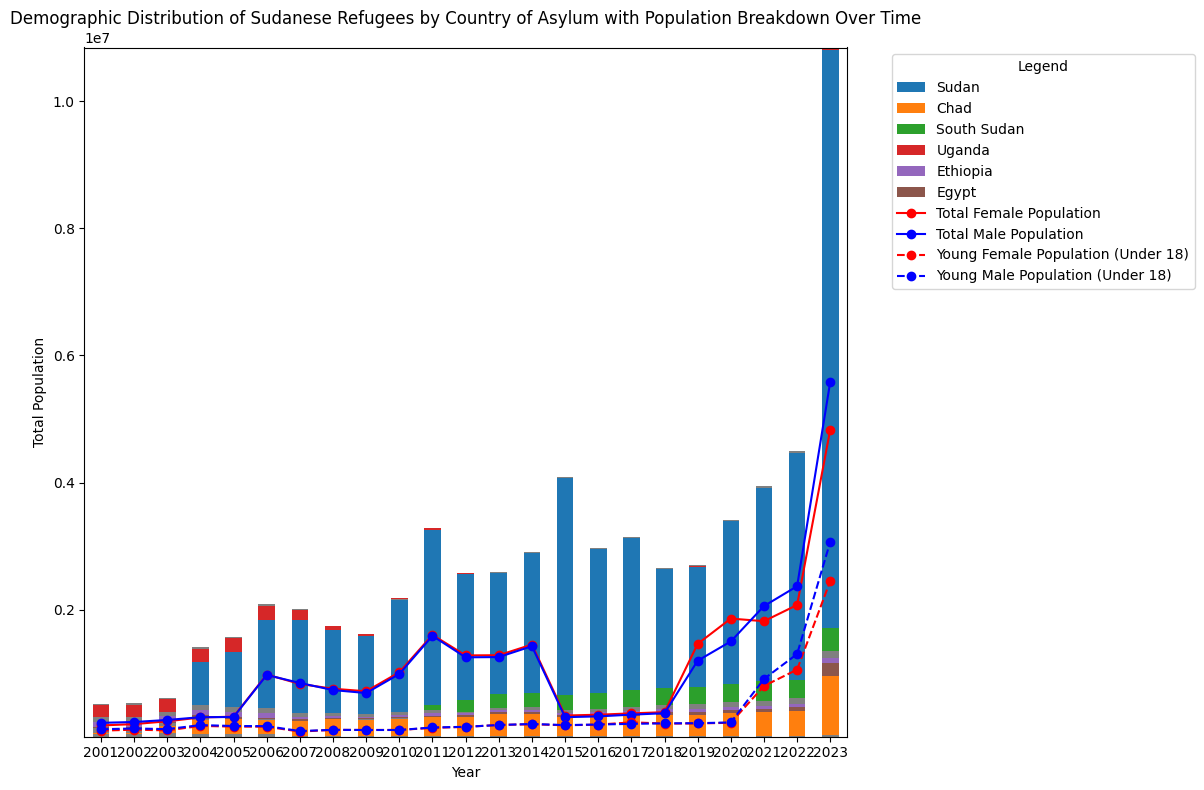

In [ ]:
demographics_grouped = demographics_residing.groupby(['Year', 'Country of Asylum Name'])['Total'].sum().unstack()

top_5_countries = demographics_grouped.sum().nlargest(6).index
color_map = {country: plt.cm.get_cmap('tab10')(i) for i, country in enumerate(top_5_countries)}
color_map.update({country: 'gray' for country in demographics_grouped.columns if country not in top_5_countries})

plt.figure(figsize=(12, 8))
ax = demographics_grouped.plot(kind='bar', stacked=True, figsize=(12, 8), color=[color_map[country] for country in demographics_grouped.columns])

female_total.plot(ax=ax, color='red', marker='o', label='Total Female Population')
male_total.plot(ax=ax, color='blue', marker='o', label='Total Male Population')
young_female_total.plot(ax=ax, color='red', marker='o', linestyle='--', label='Young Female Population (Under 18)')
young_male_total.plot(ax=ax, color='blue', marker='o', linestyle='--', label='Young Male Population (Under 18)')

handles, labels = ax.get_legend_handles_labels()
top_5_handles = [handles[demographics_grouped.columns.get_loc(country)] for country in top_5_countries]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
for handle, color in zip(top_5_handles, colors):  # Assuming the first 6 are bar containers
    for artist in handle.get_children():
        artist.set_facecolor(color)
top_5_handles.extend([ax.lines[0], ax.lines[1], ax.lines[2], ax.lines[3]])  # Add the line plots to the legend

plt.title('Demographic Distribution of Sudanese Refugees by Country of Asylum with Population Breakdown Over Time')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend(top_5_handles, top_5_countries.tolist() + ['Total Female Population', 'Total Male Population', 'Young Female Population (Under 18)', 'Young Male Population (Under 18)'], 
           title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

C:\Users\dlee3\AppData\Local\Temp\ipykernel_48152\2463863885.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = {country: plt.cm.get_cmap('tab10')(i) for i, country in enumerate(top_5_countries)}


<Figure size 1200x800 with 0 Axes>

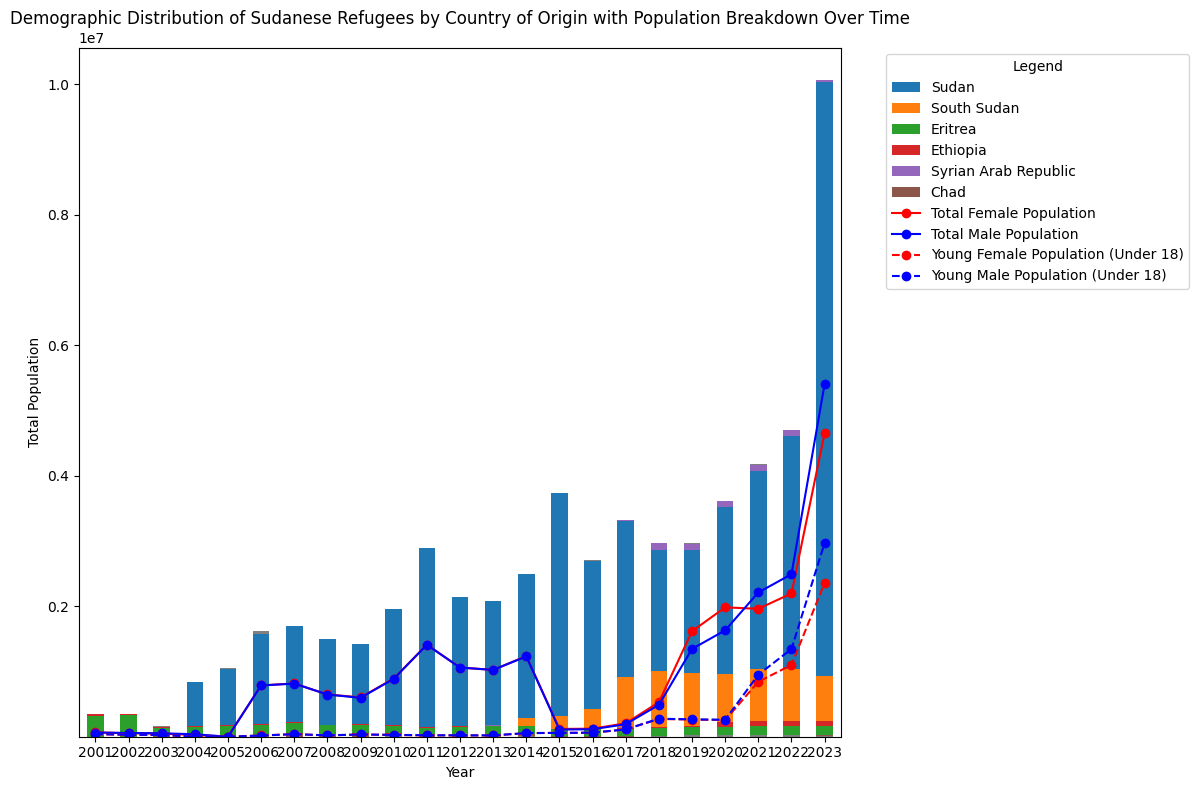

In [132]:
demographics_originating = pd.read_csv('data/refugees_data/demographics_originating_sdn.csv')
demographics_originating = demographics_originating.iloc[1:, :]
col_list = ['Female 0-4', 'Female 5-11', 'Female 12-17', 'Female 18-59', 'Female 60 or more',
       'Female Unknown', 'Female Total', 'Male 0-4', 'Male 5-11', 'Male 12-17',
       'Male 18-59', 'Male 60 or more', 'Male Unknown', 'Male Total', 'Total']
for col in col_list:
    demographics_originating[col] = pd.to_numeric(demographics_originating[col], errors='coerce')

# Group by Year and sum the totals for Female, Male, and young populations
female_total = demographics_originating.groupby('Year')['Female Total'].sum()
male_total = demographics_originating.groupby('Year')['Male Total'].sum()

# Sum the young female (0-17 years old) and young male (0-17 years old) population by year
young_female_total = demographics_originating.groupby('Year')[['Female 0-4', 'Female 5-11', 'Female 12-17']].sum().sum(axis=1)
young_male_total = demographics_originating.groupby('Year')[['Male 0-4', 'Male 5-11', 'Male 12-17']].sum().sum(axis=1)

demographics_grouped = demographics_originating.groupby(['Year', 'Country of Origin Name'])['Total'].sum().unstack()

top_5_countries = demographics_grouped.sum().nlargest(6).index
color_map = {country: plt.cm.get_cmap('tab10')(i) for i, country in enumerate(top_5_countries)}
color_map.update({country: 'gray' for country in demographics_grouped.columns if country not in top_5_countries})

plt.figure(figsize=(12, 8))
ax = demographics_grouped.plot(kind='bar', stacked=True, figsize=(12, 8), color=[color_map[country] for country in demographics_grouped.columns])

female_total.plot(ax=ax, color='red', marker='o', label='Total Female Population')
male_total.plot(ax=ax, color='blue', marker='o', label='Total Male Population')
young_female_total.plot(ax=ax, color='red', marker='o', linestyle='--', label='Young Female Population (Under 18)')
young_male_total.plot(ax=ax, color='blue', marker='o', linestyle='--', label='Young Male Population (Under 18)')

handles, labels = ax.get_legend_handles_labels()
top_5_handles = [handles[demographics_grouped.columns.get_loc(country)] for country in top_5_countries]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
for handle, color in zip(top_5_handles, colors):  # Assuming the first 6 are bar containers
    for artist in handle.get_children():
        artist.set_facecolor(color)
top_5_handles.extend([ax.lines[0], ax.lines[1], ax.lines[2], ax.lines[3]])  # Add the line plots to the legend

plt.title('Demographic Distribution of Sudanese Refugees by Country of Origin with Population Breakdown Over Time')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend(top_5_handles, top_5_countries.tolist() + ['Total Female Population', 'Total Male Population', 'Young Female Population (Under 18)', 'Young Male Population (Under 18)'], 
           title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [139]:
asylum_decisions_originating = pd.read_csv('data/refugees_data/asylum_decisions_originating_sdn.csv')
asylum_decisions_originating = asylum_decisions_originating.iloc[1:, :]
col_list = ['Decisions Average Persons Per Case', 'Recognized',
       'Complementary Protection', 'Otherwise Closed', 'Rejected',
       'Total Decided']
for col in col_list:
    asylum_decisions_originating[col] = pd.to_numeric(asylum_decisions_originating[col], errors='coerce')
asylum_decisions_originating.head()

Year Country of Origin Code Country of Asylum Code Country of Origin Name  \
1  2000                    SDN                    DZA                  Sudan   
2  2000                    SDN                    EGY                  Sudan   
3  2000                    SDN                    AUS                  Sudan   
4  2000                    SDN                    AUS                  Sudan   
5  2000                    SDN                    AUT                  Sudan   

  Country of Asylum Name Procedure Type Procedure Name Decision Type Code  \
1                Algeria              U          UNHCR                 FI   
2                  Egypt              U          UNHCR                 FI   
3              Australia              G     Government                 AR   
4              Australia              G     Government                 FI   
5                Austria              G     Government                 FA   

  Decision Data Type Decision Data  Decisions Average Persons Per Case  \
1                  C         Cases                                   0   
2                  P       Persons                                   0   
3                  C         Cases                                   0   
4                  C         Cases                                   0   
5                  P       Persons                                   0   

   Recognized  Complementary Protection  Otherwise Closed  Rejected  \
1           0                         0                 0         5   
2        2742                        14                 0      4395   
3           5                         0                 0         5   
4           0                         0                 0        10   
5           5                         0                29        54   

   Total Decided  
1              5  
2           7151  
3             10  
4             10  
5             88

In [163]:
asylum_applications_originating = pd.read_csv('data/refugees_data/asylum_applications_originating_sdn.csv')
asylum_applications_originating = asylum_applications_originating.iloc[1:, :]
col_list = ['Application Average Persons Per Case', 'Number of Applications']
for col in col_list:
    asylum_applications_originating[col] = pd.to_numeric(asylum_applications_originating[col], errors='coerce')
asylum_applications_originating.head()

Year Country of Origin Code Country of Asylum Code Country of Origin Name  \
1  2000                    SDN                    EGY                  Sudan   
2  2000                    SDN                    AUS                  Sudan   
3  2000                    SDN                    AUS                  Sudan   
4  2000                    SDN                    AUT                  Sudan   
5  2000                    SDN                    BEL                  Sudan   

  Country of Asylum Name Procedure Type Procedure Name Application Type Code  \
1                  Egypt              U          UNHCR                     V   
2              Australia              G     Government                     V   
3              Australia              G     Government                     V   
4                Austria              G     Government                     V   
5                Belgium              G     Government                     V   

  Application Type Application Data Type Application Data  \
1              NaN                     P          Persons   
2              NaN                     C            Cases   
3              NaN                     C            Cases   
4              NaN                     P          Persons   
5              NaN                     P          Persons   

   Application Average Persons Per Case  Number of Applications  
1                                     0                   12206  
2                                     0                       5  
3                                     0                      15  
4                                     0                      40  
5                                     0                     185

C:\Users\dlee3\AppData\Local\Temp\ipykernel_48152\4154871140.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_top_5 = plt.cm.get_cmap('Set3', 5).colors


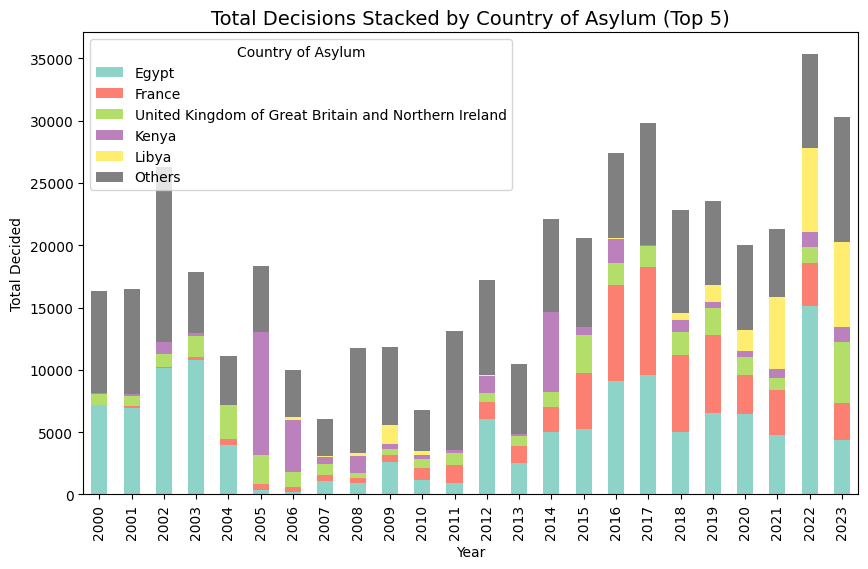

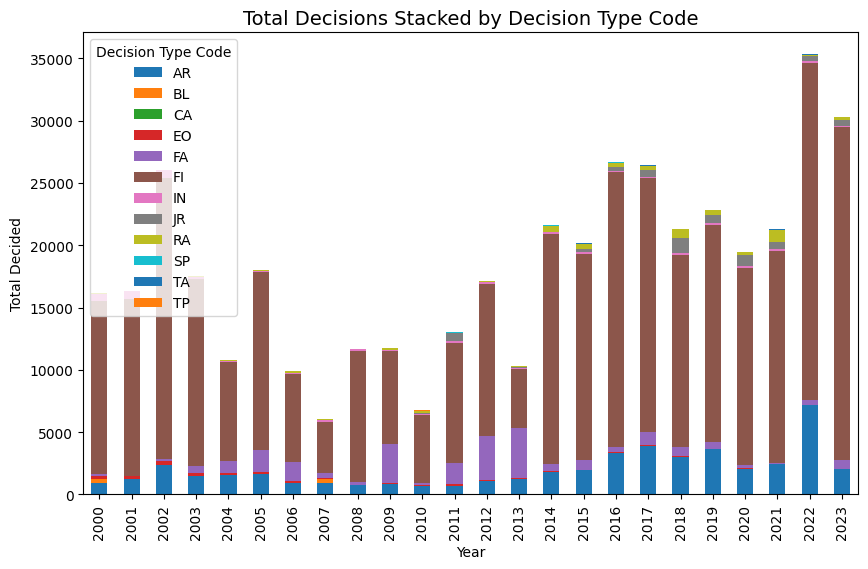

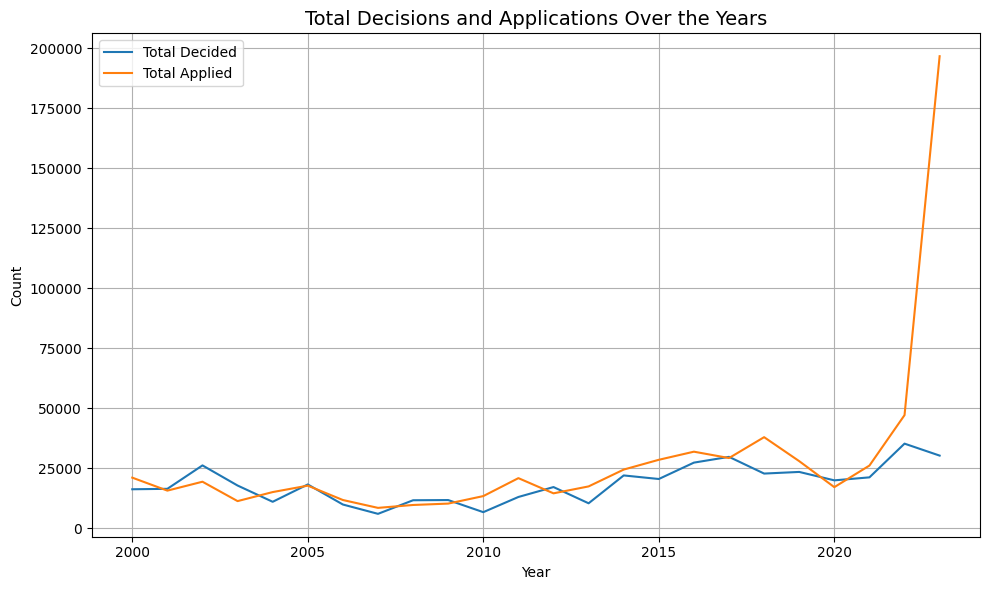

In [168]:
data_grouped_by_country = asylum_decisions_originating.groupby(['Year', 'Country of Asylum Name'])['Total Decided'].sum().unstack().fillna(0)

# Identify the top 5 countries with the highest total counts
top_5_countries = data_grouped_by_country.sum().nlargest(5).index

# Sum up the other countries into one category
data_grouped_by_country['Others'] = data_grouped_by_country.drop(columns=top_5_countries).sum(axis=1)
data_grouped_by_country = data_grouped_by_country[top_5_countries.tolist() + ['Others']]

# Prepare colors for the first stacked bar chart
colors_top_5 = plt.cm.get_cmap('Set3', 5).colors
colors = {country: colors_top_5[i] for i, country in enumerate(top_5_countries)}
colors['Others'] = 'gray'

# Create the first stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
data_grouped_by_country.plot(kind='bar', stacked=True, color=[colors[country] for country in data_grouped_by_country.columns], ax=ax)
ax.set_title('Total Decisions Stacked by Country of Asylum (Top 5)', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Total Decided')
ax.legend(title='Country of Asylum', labels=list(top_5_countries) + ['Others'])




# Now, create the second stacked bar chart by 'Decision Type Code'
data_grouped_by_decision = asylum_decisions_originating.groupby(['Year', 'Decision Type Code'])['Total Decided'].sum().unstack().fillna(0)

# Create the second stacked bar chart
fig2, ax2 = plt.subplots(figsize=(10, 6))
data_grouped_by_decision.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Total Decisions Stacked by Decision Type Code', fontsize=14)
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Decided')
ax2.legend(title='Decision Type Code')




# Create the line plot for Total Decided over the years
total_decided_per_year = asylum_decisions_originating.groupby('Year')['Total Decided'].sum()
total_applied_per_year = asylum_applications_originating.groupby('Year')['Number of Applications'].sum()

fig3, ax3 = plt.subplots(figsize=(10, 6))

total_decided_per_year.plot(kind='line', ax=ax3, label='Total Decided')
total_applied_per_year.plot(kind='line', ax=ax3, label='Total Applied')
ax3.set_title('Total Decisions and Applications Over the Years', fontsize=14)
ax3.set_xlabel('Year')
ax3.set_ylabel('Count')
ax3.grid(True)
ax3.legend()

# Display the plots
plt.tight_layout()
plt.show()

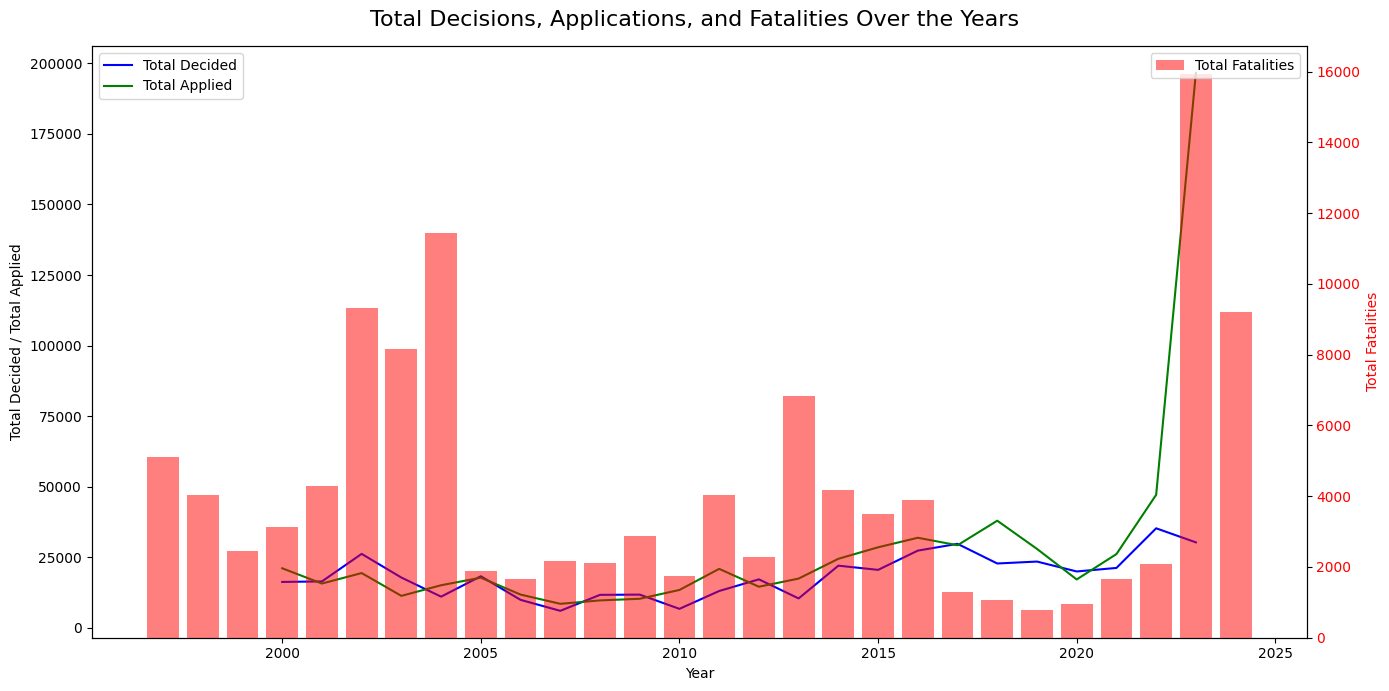

In [186]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the line graph for Total Decided and Total Applied on the primary y-axis
ax1.plot(total_decided_per_year.index.astype(int), total_decided_per_year.astype(int), label='Total Decided', color='blue')
ax1.plot(total_applied_per_year.index.astype(int), total_applied_per_year.astype(int), label='Total Applied', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Decided / Total Applied', color='black')
ax1.tick_params(axis='y')

# Create a secondary y-axis for the bar chart of Total Fatalities
ax2 = ax1.twinx()
ax2.bar(fatalities_trend_month.index.astype(int), fatalities_trend_month.astype(int), color='red', alpha=0.5, label='Total Fatalities')
ax2.set_ylabel('Total Fatalities', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and legends
fig.suptitle('Total Decisions, Applications, and Fatalities Over the Years', fontsize=16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

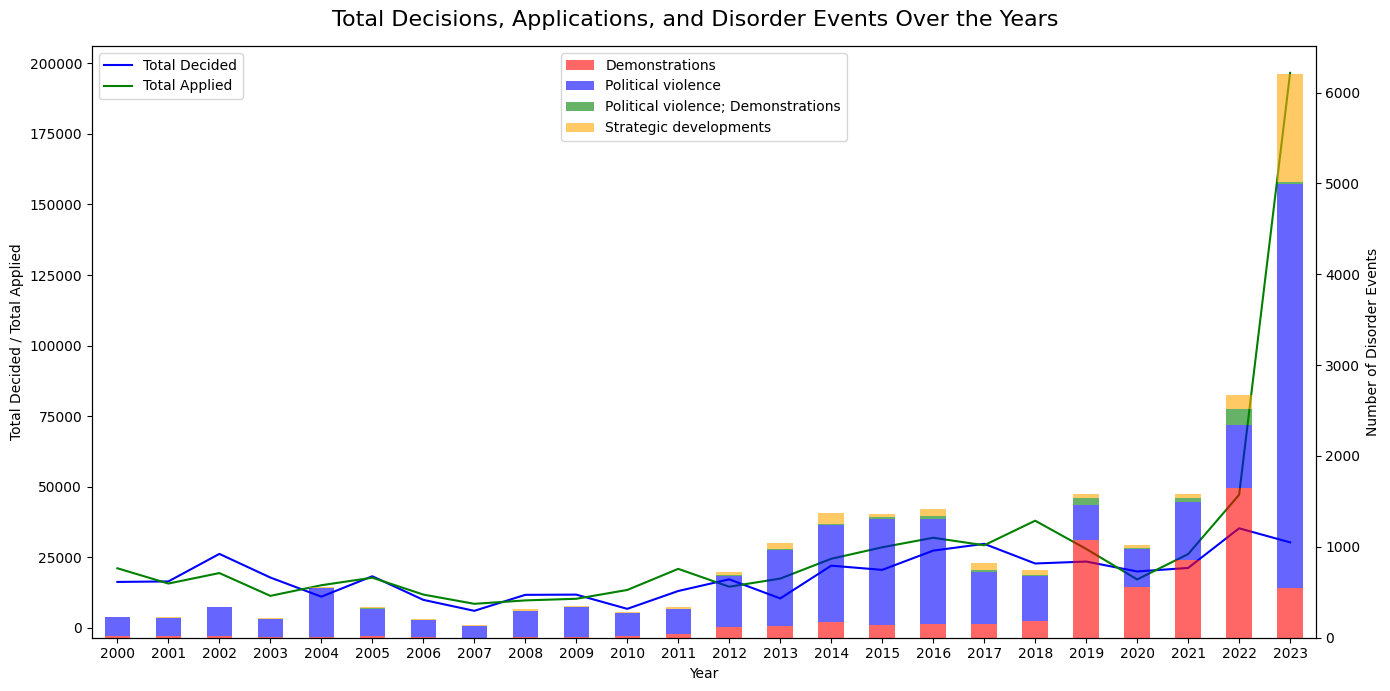

In [264]:
fig, ax1 = plt.subplots(figsize=(14, 7))
total_decided_per_year.index = total_decided_per_year.index.astype(str)
total_applied_per_year.index = total_applied_per_year.index.astype(str)
disorder_event_trend.index = disorder_event_trend.index.astype(str)
shared_years = total_decided_per_year.index.intersection(disorder_event_trend.index)

ax1.plot(total_decided_per_year.loc[shared_years], label='Total Decided', color='blue')
ax1.plot(total_applied_per_year.loc[shared_years], label='Total Applied', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Decided / Total Applied', color='black')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
custom_colors = ['red', 'blue', 'green', 'orange']
disorder_event_trend = df_sudan.groupby(['year', 'disorder_type']).size().unstack().fillna(0)
disorder_event_trend.loc[shared_years].plot(kind='bar', stacked=True, ax=ax2, color=custom_colors[:disorder_event_trend.shape[1]], alpha=0.6)
ax2.set_ylabel('Number of Disorder Events', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper center')

fig.suptitle('Total Decisions, Applications, and Disorder Events Over the Years', fontsize=16)
plt.tight_layout()
plt.show()

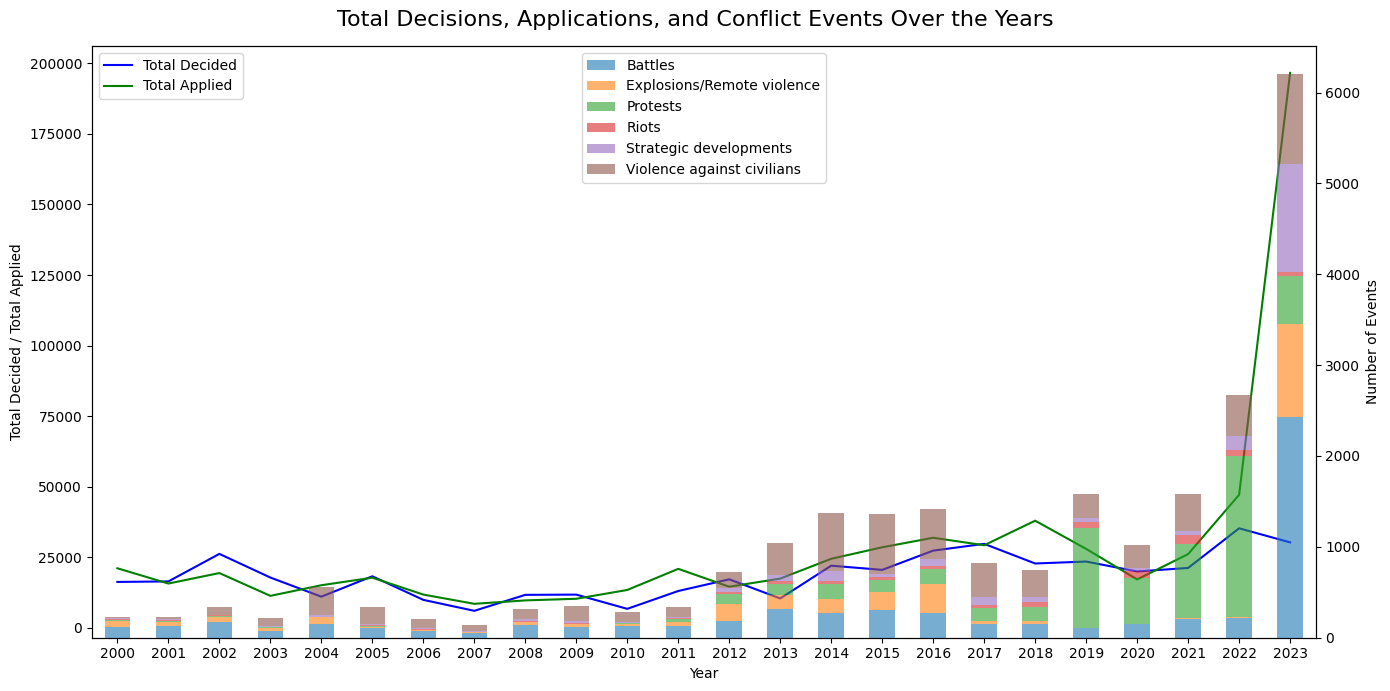

In [263]:
fig, ax1 = plt.subplots(figsize=(14, 7))
total_decided_per_year.index = total_decided_per_year.index.astype(str)
total_applied_per_year.index = total_applied_per_year.index.astype(str)
disorder_event_trend.index = disorder_event_trend.index.astype(str)
shared_years = total_decided_per_year.index.intersection(disorder_event_trend.index)

ax1.plot(total_decided_per_year.loc[shared_years], label='Total Decided', color='blue')
ax1.plot(total_applied_per_year.loc[shared_years], label='Total Applied', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Decided / Total Applied', color='black')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
disorder_event_trend = df_sudan.groupby(['year', 'event_type']).size().unstack().fillna(0)
disorder_event_trend.loc[shared_years].plot(kind='bar', stacked=True, ax=ax2, alpha=0.6)
ax2.set_ylabel('Number of Events', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper center')

fig.suptitle('Total Decisions, Applications, and Conflict Events Over the Years', fontsize=16)
plt.tight_layout()
plt.show()

In [266]:
asylum_decisions_residing = pd.read_csv('data/refugees_data/asylum_decisions_residing_sdn.csv')
asylum_decisions_residing = asylum_decisions_residing.iloc[1:, :]
col_list = ['Decisions Average Persons Per Case', 'Recognized',
       'Complementary Protection', 'Otherwise Closed', 'Rejected',
       'Total Decided']
for col in col_list:
    asylum_decisions_residing[col] = pd.to_numeric(asylum_decisions_residing[col], errors='coerce')
asylum_decisions_residing.head()

asylum_applications_residing = pd.read_csv('data/refugees_data/asylum_applications_residing_sdn.csv')
asylum_applications_residing = asylum_applications_residing.iloc[1:, :]
col_list = ['Application Average Persons Per Case', 'Number of Applications']
for col in col_list:
    asylum_applications_residing[col] = pd.to_numeric(asylum_applications_residing[col], errors='coerce')
asylum_applications_residing.head()

Year Country of Origin Code Country of Asylum Code Country of Origin Name  \
1  2000                    ERI                    SDN                Eritrea   
2  2000                    ETH                    SDN               Ethiopia   
3  2001                    JOR                    SDN                 Jordan   
4  2001                    TUN                    SDN                Tunisia   
5  2002                    ERI                    SDN                Eritrea   

  Country of Asylum Name Procedure Type Procedure Name Application Type Code  \
1                  Sudan              U          UNHCR                     V   
2                  Sudan              U          UNHCR                     V   
3                  Sudan              U          UNHCR                     V   
4                  Sudan              U          UNHCR                     V   
5                  Sudan              U          UNHCR                     V   

  Application Type Application Data Type Application Data  \
1              NaN                     C            Cases   
2              NaN                     C            Cases   
3              NaN                     C            Cases   
4              NaN                     C            Cases   
5              NaN                     C            Cases   

   Application Average Persons Per Case  Number of Applications  
1                                     0                     121  
2                                     0                    3203  
3                                     0                       5  
4                                     0                       6  
5                                     0                   26851

C:\Users\dlee3\AppData\Local\Temp\ipykernel_48152\794704730.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_top_5 = plt.cm.get_cmap('Set3', 5).colors


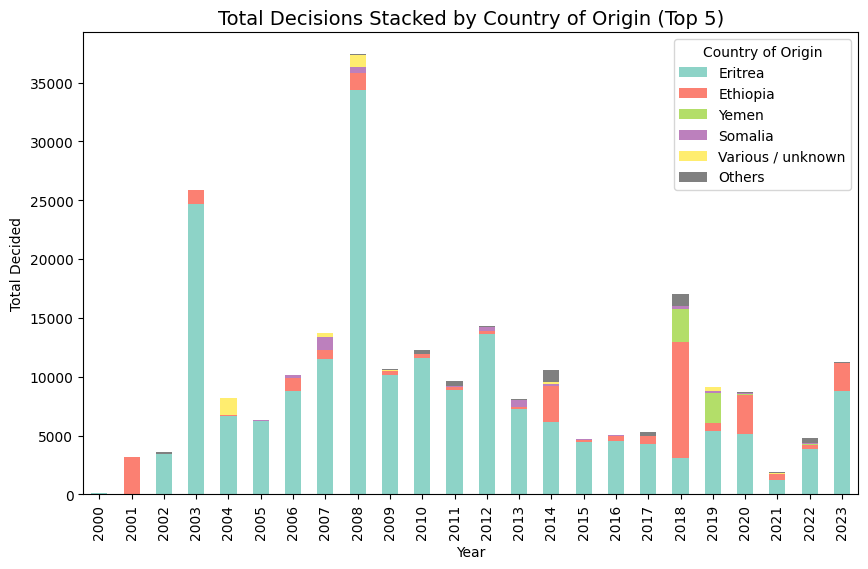

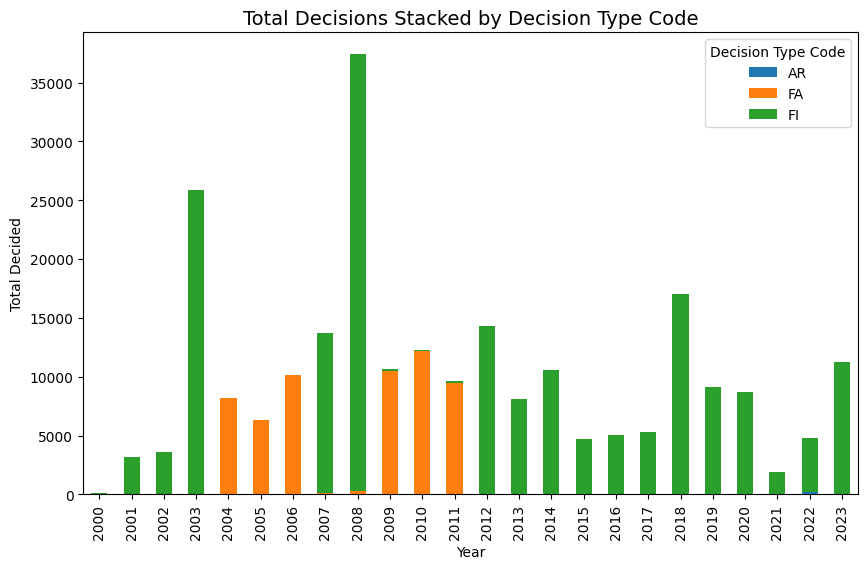

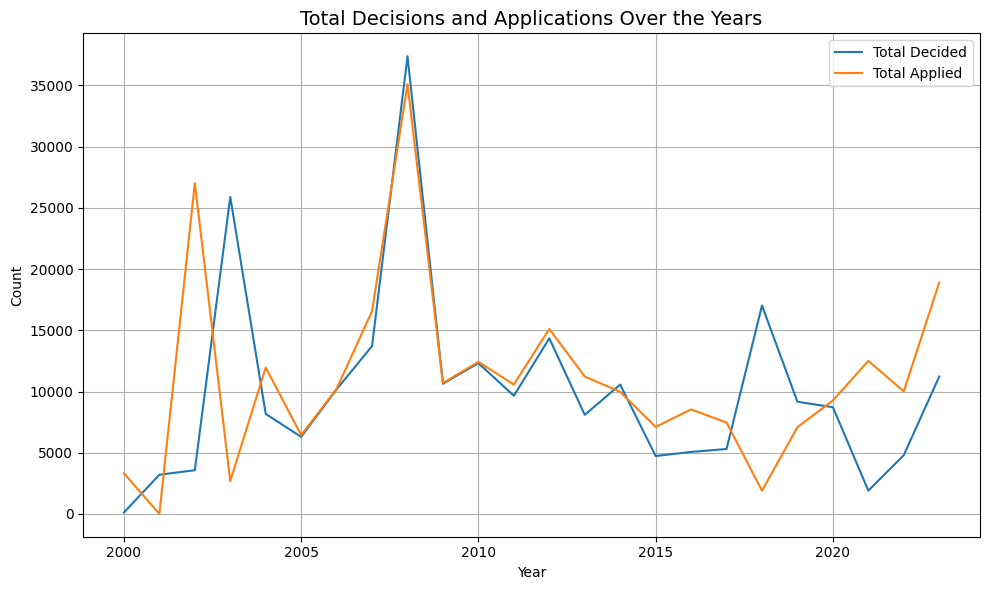

In [270]:
data_grouped_by_country = asylum_decisions_residing.groupby(['Year', 'Country of Origin Name'])['Total Decided'].sum().unstack().fillna(0)

# Identify the top 5 countries with the highest total counts
top_5_countries = data_grouped_by_country.sum().nlargest(5).index

# Sum up the other countries into one category
data_grouped_by_country['Others'] = data_grouped_by_country.drop(columns=top_5_countries).sum(axis=1)
data_grouped_by_country = data_grouped_by_country[top_5_countries.tolist() + ['Others']]

# Prepare colors for the first stacked bar chart
colors_top_5 = plt.cm.get_cmap('Set3', 5).colors
colors = {country: colors_top_5[i] for i, country in enumerate(top_5_countries)}
colors['Others'] = 'gray'

# Create the first stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
data_grouped_by_country.plot(kind='bar', stacked=True, color=[colors[country] for country in data_grouped_by_country.columns], ax=ax)
ax.set_title('Total Decisions Stacked by Country of Origin (Top 5)', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Total Decided')
ax.legend(title='Country of Origin', labels=list(top_5_countries) + ['Others'])




# Now, create the second stacked bar chart by 'Decision Type Code'
data_grouped_by_decision = asylum_decisions_residing.groupby(['Year', 'Decision Type Code'])['Total Decided'].sum().unstack().fillna(0)

# Create the second stacked bar chart
fig2, ax2 = plt.subplots(figsize=(10, 6))
data_grouped_by_decision.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Total Decisions Stacked by Decision Type Code', fontsize=14)
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Decided')
ax2.legend(title='Decision Type Code')




# Create the line plot for Total Decided over the years
total_decided_per_year = asylum_decisions_residing.groupby('Year')['Total Decided'].sum()
total_applied_per_year = asylum_applications_residing.groupby('Year')['Number of Applications'].sum()

fig3, ax3 = plt.subplots(figsize=(10, 6))

total_decided_per_year.plot(kind='line', ax=ax3, label='Total Decided')
total_applied_per_year.plot(kind='line', ax=ax3, label='Total Applied')
ax3.set_title('Total Decisions and Applications Over the Years', fontsize=14)
ax3.set_xlabel('Year')
ax3.set_ylabel('Count')
ax3.grid(True)
ax3.legend()

# Display the plots
plt.tight_layout()
plt.show()

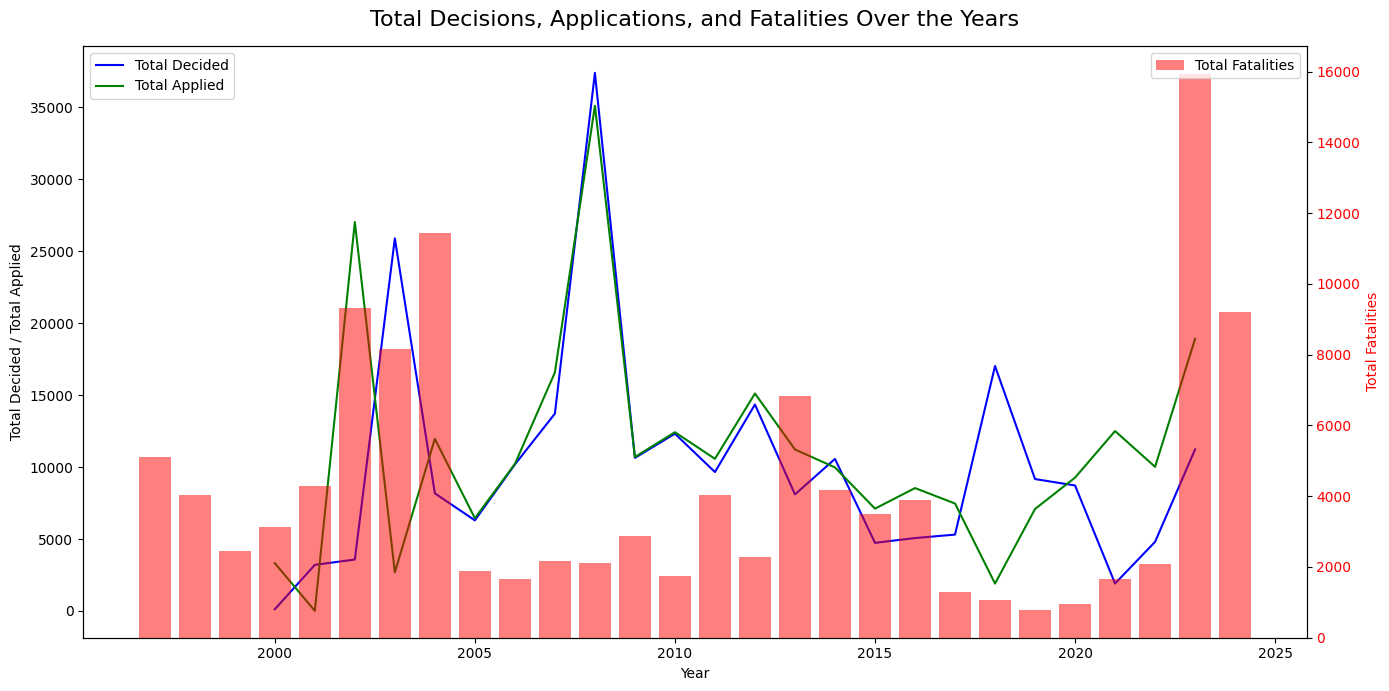

In [271]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the line graph for Total Decided and Total Applied on the primary y-axis
ax1.plot(total_decided_per_year.index.astype(int), total_decided_per_year.astype(int), label='Total Decided', color='blue')
ax1.plot(total_applied_per_year.index.astype(int), total_applied_per_year.astype(int), label='Total Applied', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Decided / Total Applied', color='black')
ax1.tick_params(axis='y')

# Create a secondary y-axis for the bar chart of Total Fatalities
ax2 = ax1.twinx()
ax2.bar(fatalities_trend_month.index.astype(int), fatalities_trend_month.astype(int), color='red', alpha=0.5, label='Total Fatalities')
ax2.set_ylabel('Total Fatalities', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and legends
fig.suptitle('Total Decisions, Applications, and Fatalities Over the Years', fontsize=16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

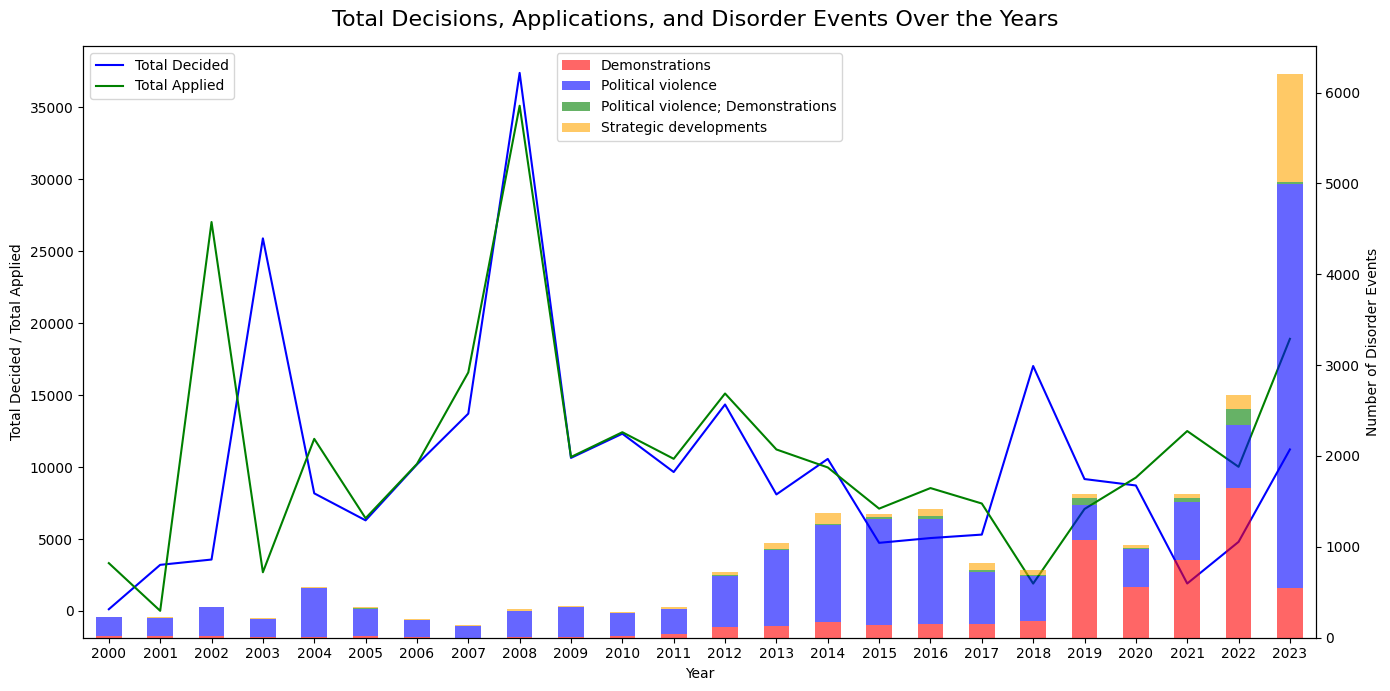

In [272]:
fig, ax1 = plt.subplots(figsize=(14, 7))
total_decided_per_year.index = total_decided_per_year.index.astype(str)
total_applied_per_year.index = total_applied_per_year.index.astype(str)
disorder_event_trend.index = disorder_event_trend.index.astype(str)
shared_years = total_decided_per_year.index.intersection(disorder_event_trend.index)

ax1.plot(total_decided_per_year.loc[shared_years], label='Total Decided', color='blue')
ax1.plot(total_applied_per_year.loc[shared_years], label='Total Applied', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Decided / Total Applied', color='black')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
custom_colors = ['red', 'blue', 'green', 'orange']
disorder_event_trend = df_sudan.groupby(['year', 'disorder_type']).size().unstack().fillna(0)
disorder_event_trend.loc[shared_years].plot(kind='bar', stacked=True, ax=ax2, color=custom_colors[:disorder_event_trend.shape[1]], alpha=0.6)
ax2.set_ylabel('Number of Disorder Events', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper center')

fig.suptitle('Total Decisions, Applications, and Disorder Events Over the Years', fontsize=16)
plt.tight_layout()
plt.show()

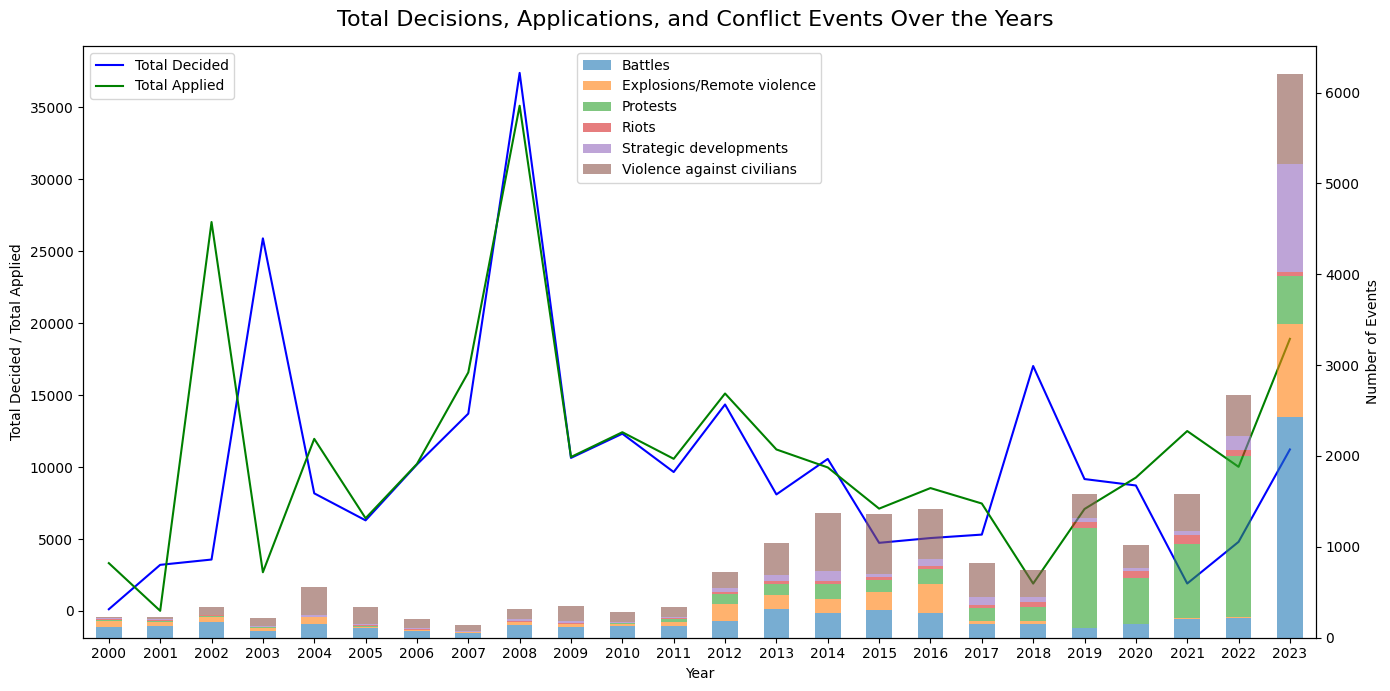

In [273]:
fig, ax1 = plt.subplots(figsize=(14, 7))
total_decided_per_year.index = total_decided_per_year.index.astype(str)
total_applied_per_year.index = total_applied_per_year.index.astype(str)
disorder_event_trend.index = disorder_event_trend.index.astype(str)
shared_years = total_decided_per_year.index.intersection(disorder_event_trend.index)

ax1.plot(total_decided_per_year.loc[shared_years], label='Total Decided', color='blue')
ax1.plot(total_applied_per_year.loc[shared_years], label='Total Applied', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Decided / Total Applied', color='black')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
disorder_event_trend = df_sudan.groupby(['year', 'event_type']).size().unstack().fillna(0)
disorder_event_trend.loc[shared_years].plot(kind='bar', stacked=True, ax=ax2, alpha=0.6)
ax2.set_ylabel('Number of Events', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper center')

fig.suptitle('Total Decisions, Applications, and Conflict Events Over the Years', fontsize=16)
plt.tight_layout()
plt.show()

In [348]:
import os

In [379]:
path = "C:/Users/dlee3/OneDrive - Olin College of Engineering/UNDP/data/refugees_data/IDP/"
dir_list = os.listdir(path)

for dtm_path in dir_list:
    dtm = pd.read_csv(f'data/cleaned/IDP/{dtm_path}')
    # columns = dtm.iloc[1, :].values.tolist()
    # dtm = dtm.iloc[3:, :]
    # dtm.columns = columns
    # dtm.reset_index(drop=True, inplace=True)
    dtm.replace({',': ''}, regex=True, inplace=True)
    dtm.replace({' -   ': np.nan}, regex=True, inplace=True)
    cols = ['IDPs', 'HHs', 'Aj Jazirah',
        'Blue Nile', 'Central Darfur', 'East Darfur', 'Gedaref', 'Kassala',
        'Khartoum', 'North Darfur', 'North Kordofan', 'Red Sea', 'River Nile',
        'Sennar', 'South Darfur', 'South Kordofan', 'West Darfur',
        'West Kordofan', 'White Nile', '  SUDANESE  ', ' NON SUDANESE']
    for col in cols:
        if col in dtm.columns.to_list():
            dtm[col] = dtm[col].astype(float)
    if 'HHs' in dtm.columns.to_list():
        dtm = dtm.drop(columns=['HHs'])
    if 'STATE CODE' in dtm.columns.to_list():
        dtm = dtm.drop(columns=['STATE CODE'])
    for col in dtm.columns.to_list():
        if 'SUDANESE' in col:
            dtm = dtm.drop(columns=[col])
    dtm.to_csv(f'data/cleaned/IDP/{dtm_path}', index=False)
    # display(dtm.head(2))

In [ ]:
for dtm_path in dir_list[1:]:
    csv = pd.read_csv(f'data/cleaned/IDP/{dtm_path}')
    csv_melted = csv.melt(
        id_vars=['STATE OF DISPLACEMET', 'IDPs'], 
        var_name='States of Origin', 
        value_name='Displaced Count'
    )
    
    # Filter out rows where Displaced Count is 0 or NaN
    csv_filtered = csv_melted[csv_melted['Displaced Count'].notna() & (csv_melted['Displaced Count'] != 0)]
    csv_filtered = csv_filtered.drop(columns=['IDPs'])

    # Rename columns to match 05-05.csv
    csv_filtered = csv_filtered.rename(columns={
        'STATE OF DISPLACEMET': 'States of Displacement',
        'Displaced Count': 'IDPs'
    })
    csv_filtered.to_csv(f'data/cleaned/IDP/{dtm_path}', index=False)

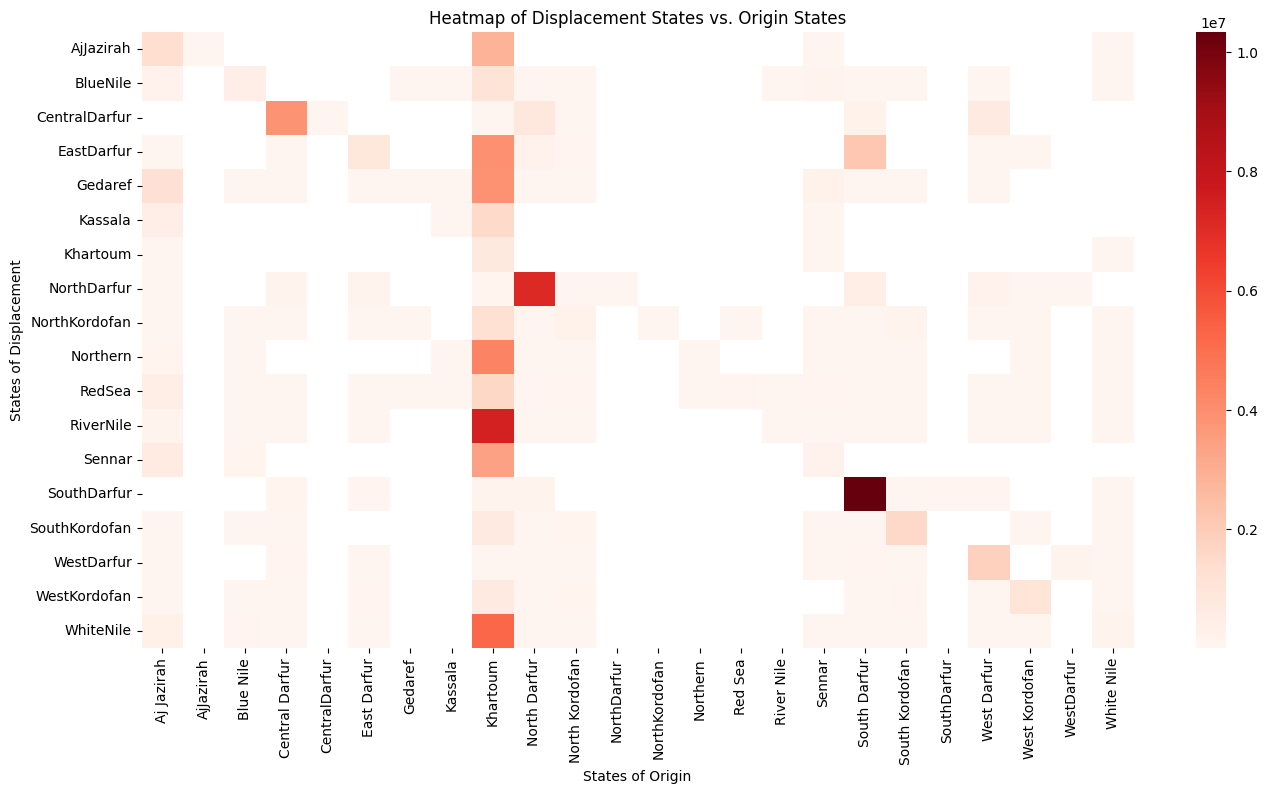

In [486]:
idp_data = pd.read_csv('data/cleaned/idp.csv')
heatmap_data = idp_data.pivot_table(index='States of Displacement', columns='States of Origin', values='IDPs', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='Reds', annot=False, fmt='.0f')
plt.title('Heatmap of Displacement States vs. Origin States')
plt.xlabel('States of Origin')
plt.ylabel('States of Displacement')
plt.show()

In [736]:
idp_monthly = idp_data.groupby(['States of Origin', 'month'])['IDPs'].sum().reset_index()
total_idps_by_state = idp_monthly.groupby('States of Origin')['IDPs'].sum().reset_index()
top_states = total_idps_by_state.nlargest(4, 'IDPs')['States of Origin'].tolist()
top_states_monthly = idp_monthly[idp_monthly['States of Origin'].isin(top_states)]
# top_states_monthly['month'] = top_states_monthly['month'].astype(str)
combined_admin = pd.concat([df_sudan['admin1'], df_sudan['admin2'], df_sudan['admin3']]).value_counts().head(4).index
filtered_data_admin = df_sudan[df_sudan['admin1'].isin(combined_admin) | df_sudan['admin2'].isin(combined_admin) | df_sudan['admin3'].isin(combined_admin)]
# filtered_data_admin['month'] = filtered_data_admin['month'].astype(str)
filtered_data_admin = pd.melt(filtered_data_admin, id_vars=['month'], value_vars=['admin1', 'admin2', 'admin3'], value_name='admin')
filtered_data_admin = filtered_data_admin[filtered_data_admin['admin'].isin(combined_admin)]
filtered_data_admin_2023 = filtered_data_admin[filtered_data_admin['month'] >= '2023-01-01']
filtered_data_admin_2023['month'] = pd.to_datetime(filtered_data_admin_2023['month'].astype(str))

top_states_monthly['month'] = pd.to_datetime(top_states_monthly['month'])

filtered_data_admin_2023['month'] = filtered_data_admin_2023['month'].astype(str)
admin_event_trend_2023 = filtered_data_admin_2023.groupby(['month', 'admin']).size().unstack().fillna(0)


C:\Users\dlee3\AppData\Local\Temp\ipykernel_48152\1000143924.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_admin_2023['month'] = pd.to_datetime(filtered_data_admin_2023['month'].astype(str))
C:\Users\dlee3\AppData\Local\Temp\ipykernel_48152\1000143924.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_states_monthly['month'] = pd.to_datetime(top_states_monthly['month'])
C:\Users\dlee3\AppData\Local\Temp\ipykernel_48152\1000143924.py:16: SettingWithCopyWarning: 
A value is trying t

C:\Users\dlee3\AppData\Local\Temp\ipykernel_48152\3569355343.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month'] = state_data['month'].astype(str)
C:\Users\dlee3\AppData\Local\Temp\ipykernel_48152\3569355343.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['month'] = state_data['month'].astype(str)
C:\Users\dlee3\AppData\Local\Temp\ipykernel_48152\3569355343.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

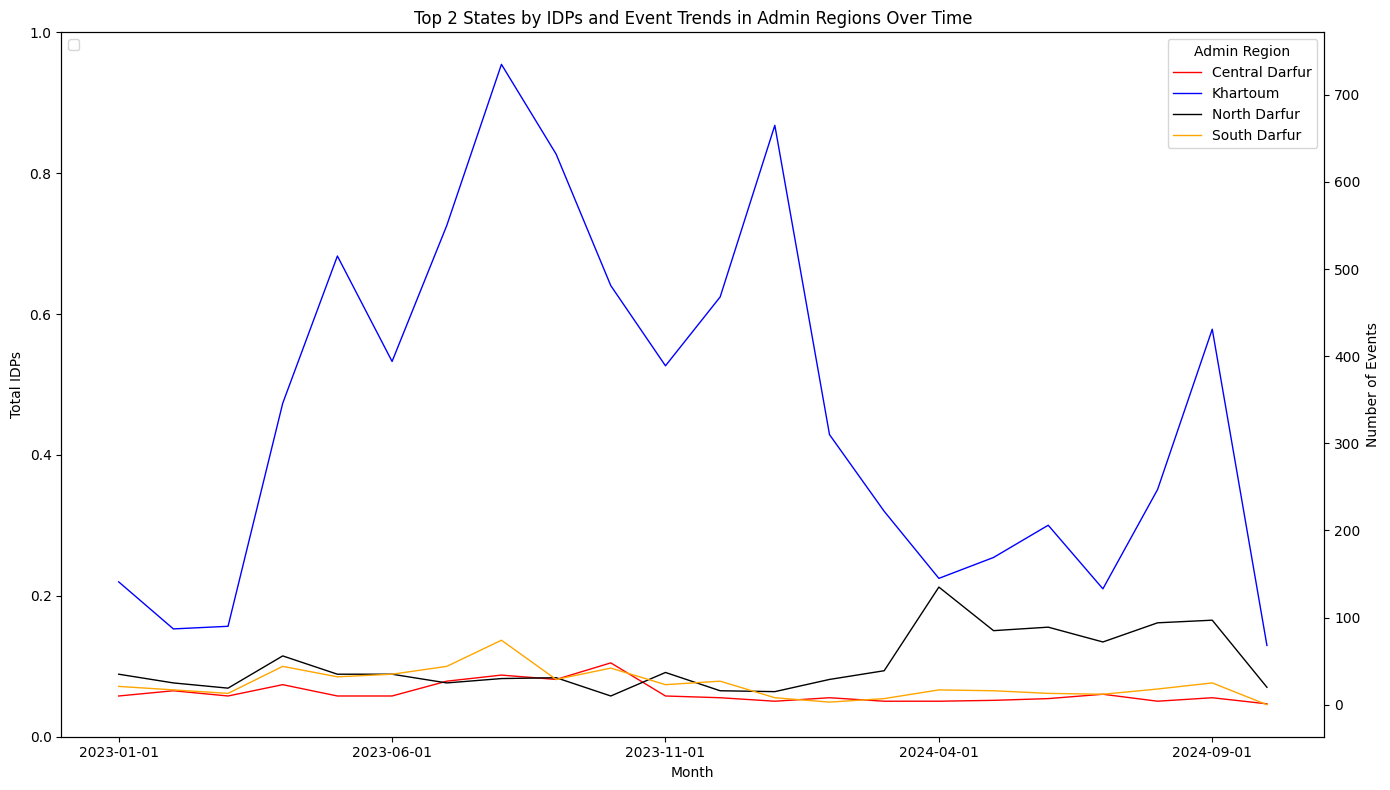

In [740]:

custom_colors = ['red', 'blue', 'black', 'orange', 'green']

# full_date_range = pd.date_range(start='2023-05-01', end='2024-09-01', freq='MS')
# states = top_states_monthly['States of Origin'].unique()
# new_index = pd.MultiIndex.from_product([states, full_date_range], names=['States of Origin', 'month'])
# top_states_monthly = top_states_monthly.set_index(['States of Origin', 'month']).reindex(new_index).reset_index()
# top_states_monthly = top_states_monthly.set_index('month').groupby('States of Origin')['IDPs'].apply(lambda x: x.reindex(common_x_axis)).reset_index()
# admin_event_trend_2023 = admin_event_trend_2023.reindex(common_x_axis)

fig, ax1 = plt.subplots(figsize=(14, 8))

# First Plot: Top 2 States of Origin by Total IDPs Over Time
ax1.set_xlabel('Month')
ax1.set_ylabel('Total IDPs')
for state in top_states:
    state_data = top_states_monthly[top_states_monthly['States of Origin'] == state]
    state_data['month'] = state_data['month'].astype(str)
    # ax1.plot(state_data['month'], state_data['IDPs'], label=f'IDPs - {state}', linestyle='-', marker='o')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Second Plot: Number of Events per Month for Top Admin Regions (on the same x-axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Number of Events')  # we already handled the x-label with ax1
admin_event_trend_2023.plot(kind='line', linewidth=1, color=custom_colors[:admin_event_trend_2023.shape[1]], ax=ax2)
ax2.tick_params(axis='y')
ax2.legend(title='Admin Region', loc='upper right')

plt.title('Top 2 States by IDPs and Event Trends in Admin Regions Over Time')
plt.tight_layout()
plt.show()


In [451]:
dfs = []
path = "C:/Users/dlee3/OneDrive - Olin College of Engineering/UNDP/data/cleaned/IDP/"
dir_list = os.listdir(path)
# Iterate over the list of files
for file_path in dir_list:
    # Extract month from file name assuming format 'YYYY-MM.csv'
    month_str = os.path.basename(file_path).split('.')[0]  # Extract 'YYYY-MM'
    
    # Load the file
    df = pd.read_csv(f'data/cleaned/IDP/{file_path}')
    
    # Add 'month' column as period[M]
    df['month'] = pd.Period(month_str, freq='M')
    
    # Append to list of dataframes
    dfs.append(df)

# Concatenate all dataframes into one
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.to_csv('data/cleaned/idp.csv', index=False)
idp_df = combined_df

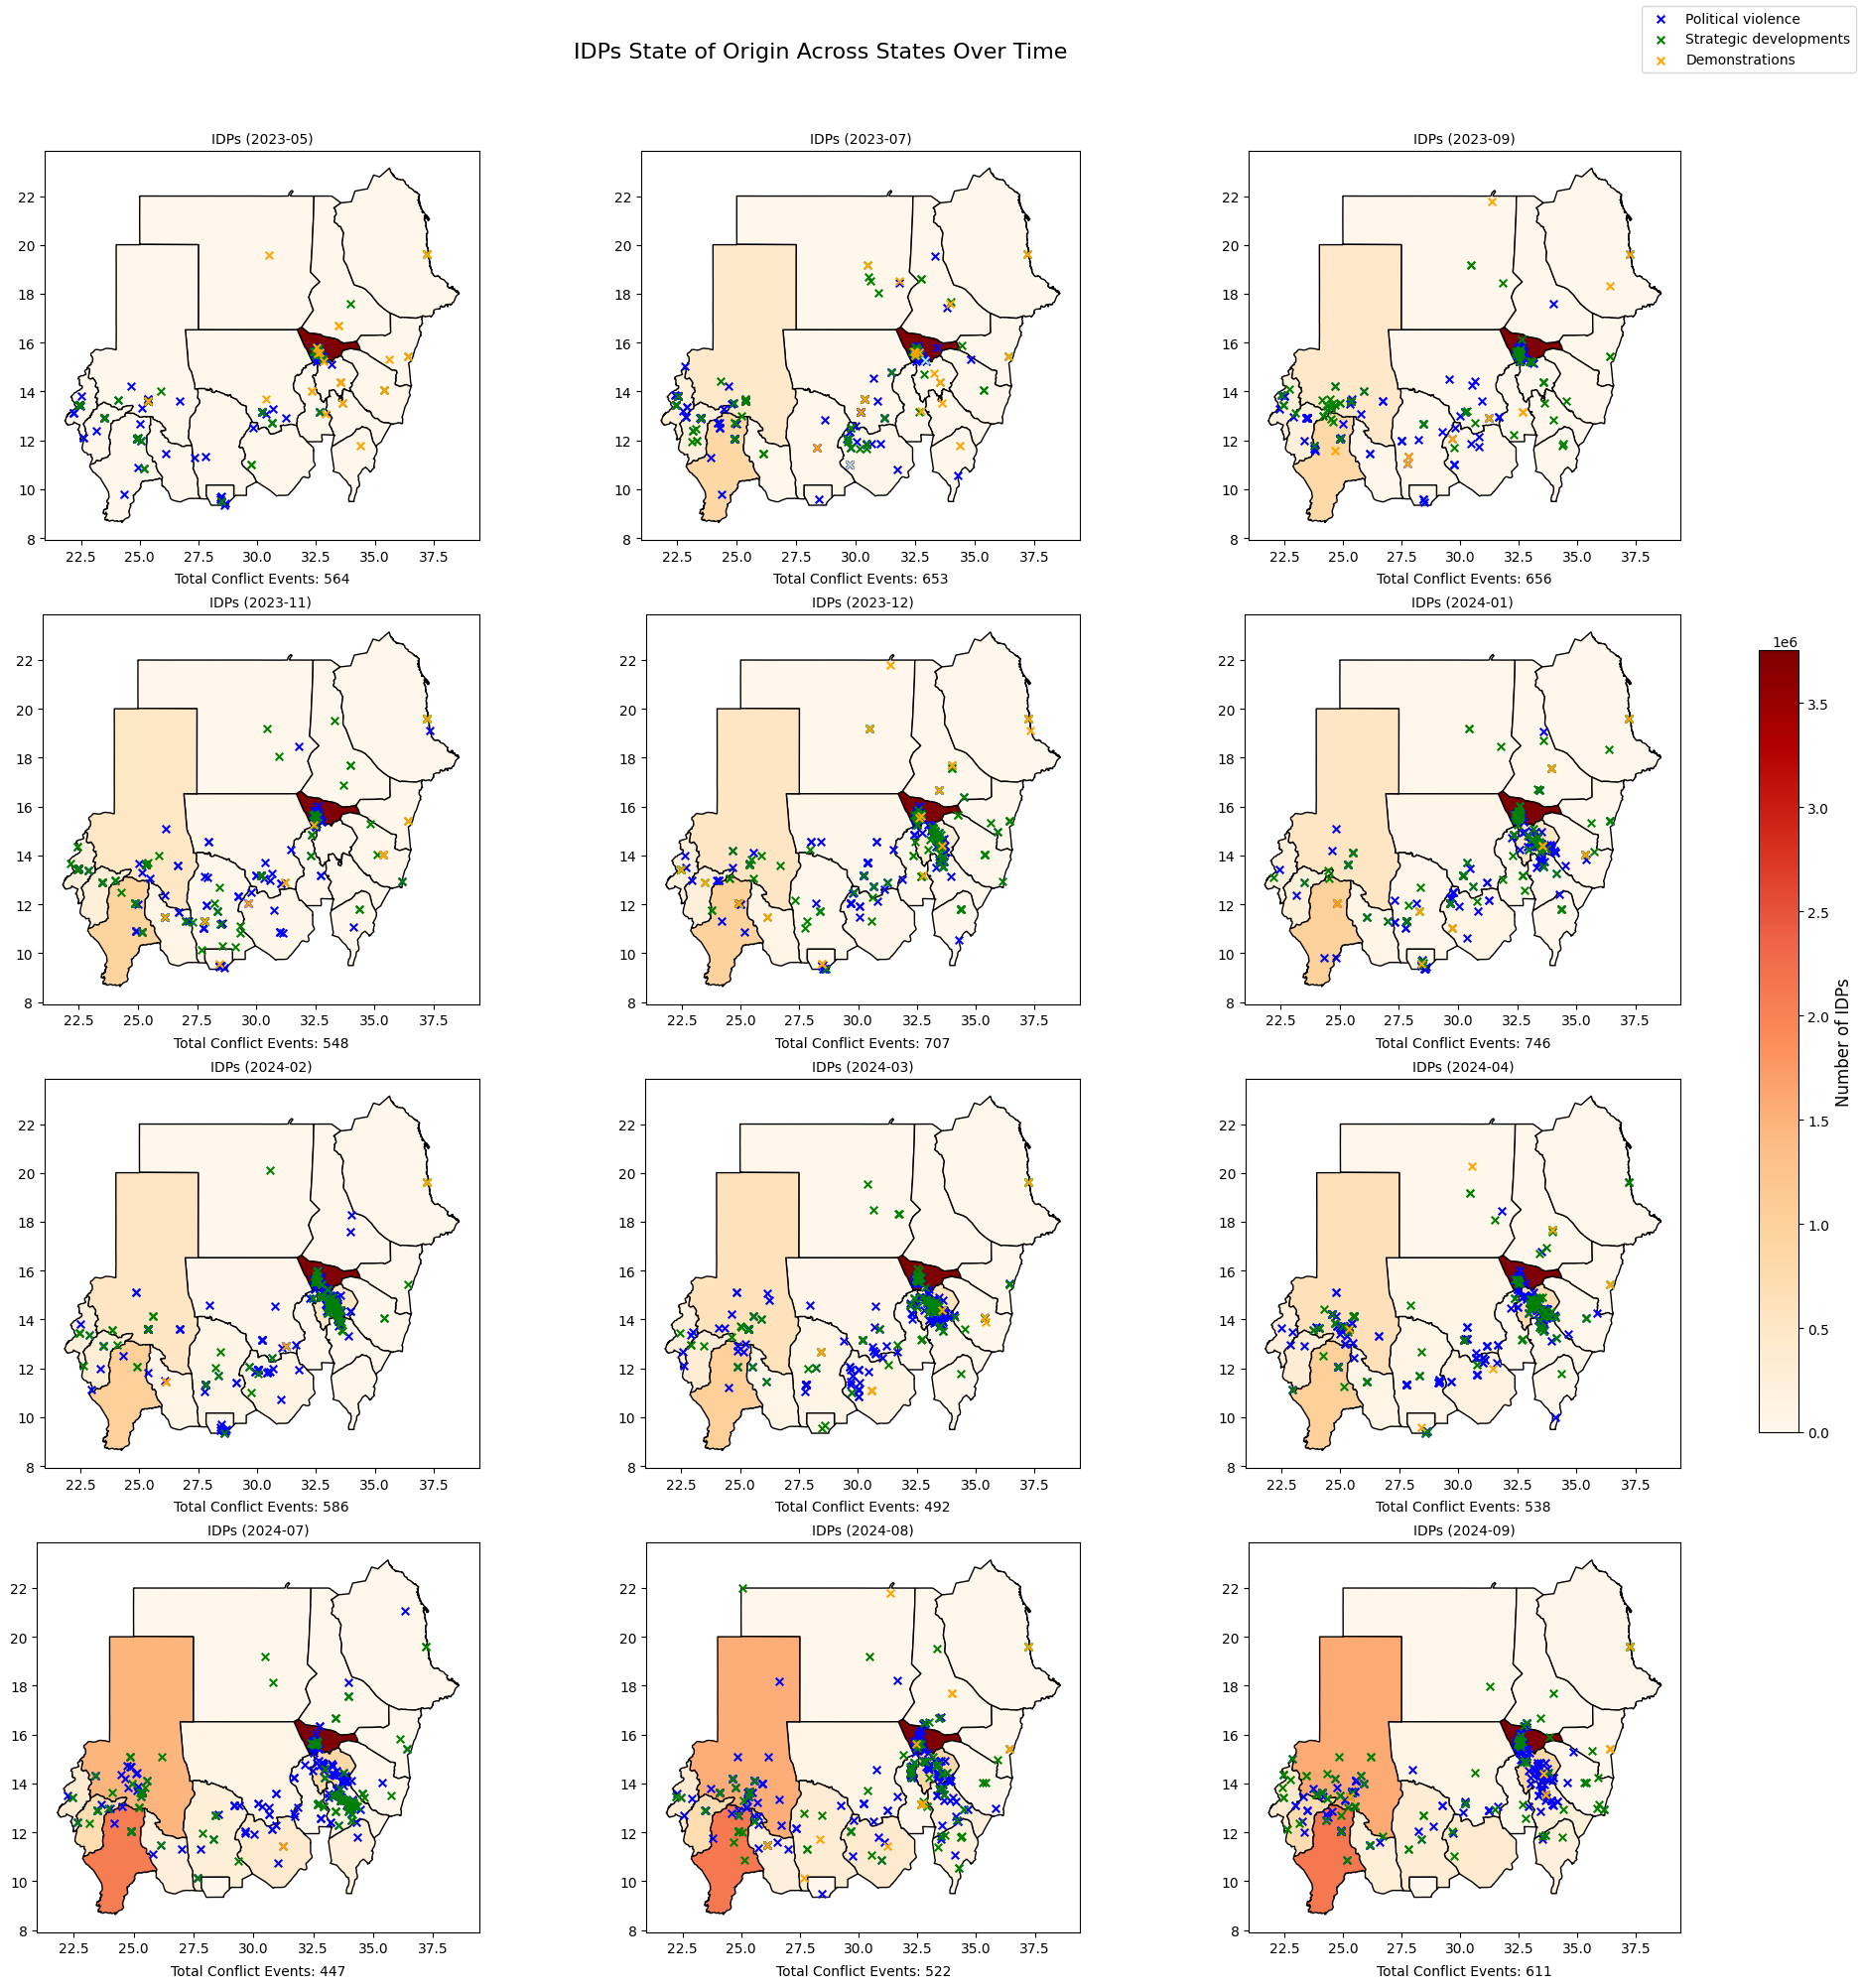

In [479]:
gdf_regions = gpd.GeoDataFrame(gdf_regions, geometry='geometry')

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()  # Flatten the axes array to make it easier to index
fig.suptitle('IDPs State of Origin Across States Over Time', fontsize=16)
all_idp_values = []

months = idp_df['month'].unique()
for idx, month in enumerate(months):
    ax = axes[idx]  # Get the current axis from the grid
    
    filtered_data = idp_df[idp_df['month'] == month]
    filtered_data = filtered_data.groupby('States of Origin')['IDPs'].sum().reset_index()

    filtered_conflict_data = df_sudan[df_sudan['month'] == month]
    conflict_geo_df = gpd.GeoDataFrame(
        filtered_conflict_data, 
        geometry=gpd.points_from_xy(filtered_conflict_data['longitude'], filtered_conflict_data['latitude']),
        crs="EPSG:4326"
    )

    colors = {  # 'disorder_type'
        'Political violence': 'blue',
        'Strategic developments': 'green',
        'Demonstrations': 'orange',
        'Political violence; Demonstrations': 'lightblue'
    }

    merged_gdf = gdf_regions.merge(filtered_data, left_on='region', right_on='States of Origin', how='left')
    merged_gdf['IDPs'] = merged_gdf['IDPs'].fillna(0)
    all_idp_values.extend(merged_gdf['IDPs'].tolist())  # Collect all IDP values for normalization
    plot = merged_gdf.plot(column='IDPs', cmap='OrRd', ax=ax, edgecolor='black', legend=False)
    
    for dtype, color in colors.items():
        subset = conflict_geo_df[conflict_geo_df['disorder_type'] == dtype]
        if not subset.empty:
            subset.plot(ax=ax, marker='x', color=color, markersize=30, label=dtype)

    ax.set_title(f'IDPs ({month})', fontsize=10)
    conflict_count = len(conflict_geo_df)
    ax.text(0.5, -0.1, f"Total Conflict Events: {conflict_count}", 
            ha='center', va='center', fontsize=10, color='black', transform=ax.transAxes)
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=min(all_idp_values), vmax=max(all_idp_values)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Number of IDPs', fontsize=12)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=10)

plt.show()


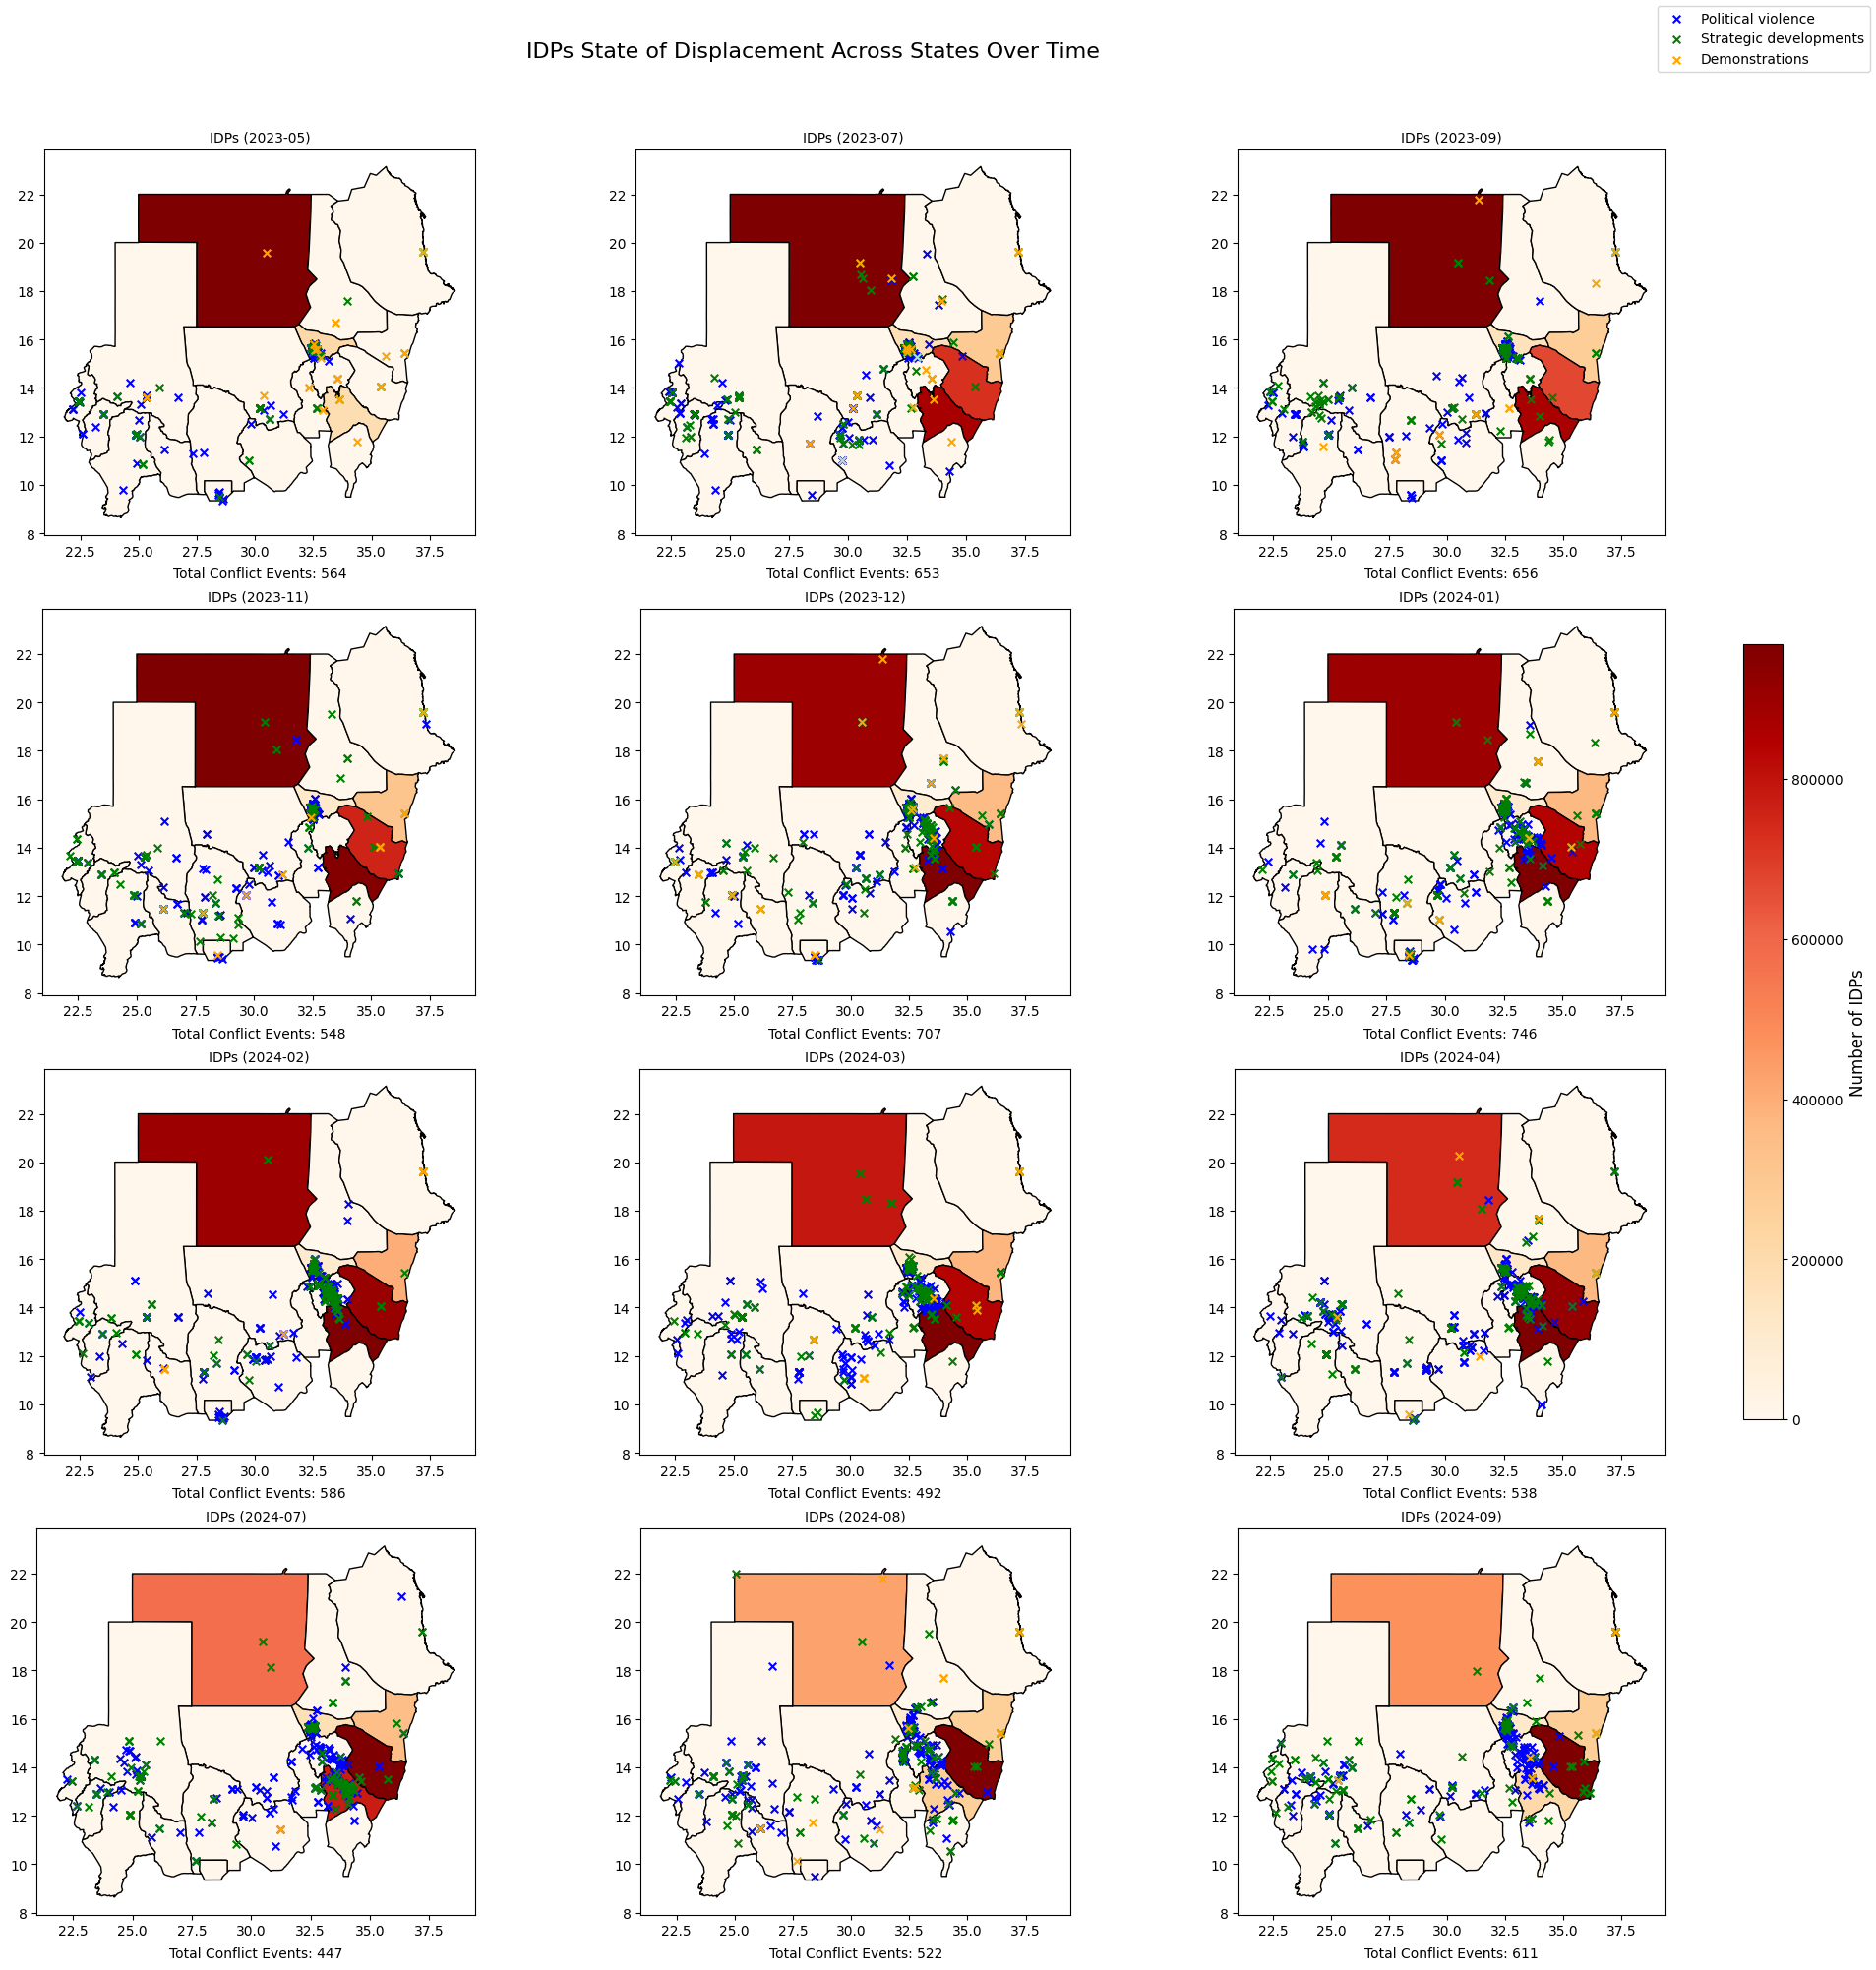

In [481]:
gdf_regions = gpd.GeoDataFrame(gdf_regions, geometry='geometry')

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()  # Flatten the axes array to make it easier to index
fig.suptitle('IDPs State of Displacement Across States Over Time', fontsize=16)
all_idp_values = []

months = idp_df['month'].unique()
for idx, month in enumerate(months):
    ax = axes[idx]  # Get the current axis from the grid
    
    filtered_data = idp_df[idp_df['month'] == month]
    filtered_data = filtered_data.groupby('States of Displacement')['IDPs'].sum().reset_index()

    filtered_conflict_data = df_sudan[df_sudan['month'] == month]
    conflict_geo_df = gpd.GeoDataFrame(
        filtered_conflict_data, 
        geometry=gpd.points_from_xy(filtered_conflict_data['longitude'], filtered_conflict_data['latitude']),
        crs="EPSG:4326"
    )

    colors = {  # 'disorder_type'
        'Political violence': 'blue',
        'Strategic developments': 'green',
        'Demonstrations': 'orange',
        'Political violence; Demonstrations': 'lightblue'
    }

    merged_gdf = gdf_regions.merge(filtered_data, left_on='region', right_on='States of Displacement', how='left')
    merged_gdf['IDPs'] = merged_gdf['IDPs'].fillna(0)
    all_idp_values.extend(merged_gdf['IDPs'].tolist())  # Collect all IDP values for normalization
    plot = merged_gdf.plot(column='IDPs', cmap='OrRd', ax=ax, edgecolor='black', legend=False)
    
    for dtype, color in colors.items():
        subset = conflict_geo_df[conflict_geo_df['disorder_type'] == dtype]
        if not subset.empty:
            subset.plot(ax=ax, marker='x', color=color, markersize=30, label=dtype)

    ax.set_title(f'IDPs ({month})', fontsize=10)
    conflict_count = len(conflict_geo_df)
    ax.text(0.5, -0.1, f"Total Conflict Events: {conflict_count}", 
            ha='center', va='center', fontsize=10, color='black', transform=ax.transAxes)
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=min(all_idp_values), vmax=max(all_idp_values)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Number of IDPs', fontsize=12)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=10)

plt.show()


prediction?